<a href="https://colab.research.google.com/github/TheHouseOfVermeulens/wernervermeulen.github.io/blob/master/GWP_Submission3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0.Building Trading Strategies During COVID.
0.1. Select a gold Exchange Traded Fund.
0.2. Select an equity ETF from outside the US.
 
0.3. Select bitcoin.

### Install dependencies

In [ ]:
# INSTALL DEPENDENCIES
# YFinance
!pip install yfinance
# ARCH
!pip install arch
# Auto ARIMA
!pip install pmdarima
# M-GARCH
!pip install mgarch
# BACKTESTER
#!pip install backtest-pkg
# NUMPY
!pip install numpy

     |████████████████████████████████| 5.5MB 7.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=b955ae218aa6650e8bb614e6c515cb0bf55c02e8b5477bb6dcc4bc6d61579f96
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 808kB 4.7MB/s 
     |████████████████████████████████| 1.5MB 5.2MB/s 
     |████████████████████████████████| 9.5MB 15.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Created wheel for mgarch: filename=mgarch-0.2.0-cp37-none-any.whl size=3377 sha256=f33fb4944cc9ede4493e7212946e9fd39e24ef8eecd9aba318a92529ac62430d
  Stored in directory: /root/.cache/pip/wheels/ea/5c/ad/67b6a0947e023ce0a14027da23aeb

In [ ]:
 # IMPORT DEPENDENCIES
import os
import sys
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sb
from scipy import stats
from functools import reduce
import datetime
from datetime import datetime
 
# StatsModels
#import statsmodels.api as sm
# Import the Time Series library
import statsmodels.tsa.stattools as ts
#import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
 
# ARCH_Model
from arch import arch_model
 
# MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
 
# BACKTESTER
#import backtest-pkg
#from backtest import Strategy, Portfolio

##1. Data Importing
1. Import closing prices for the entire year of 2020 for  your GOLD ETF, your equity ETF, and bitcoin.

In [ ]:
# IMPORT CLOSING PRICES FOR 2020
# Create tickers
ticker_g = "GOLD.AX" #Gold ETF
ticker_e = "VWO"     #Equity ETF
ticker_b = "BTC-USD" # Bitcoin
#Import data for 2020
g20 = yf.download(ticker_g, start='2020-01-01',
                     end='2020-12-31',
                     progress=False)
e20 = yf.download(ticker_e, start='2020-01-01',
                     end='2020-12-31',
                     progress=False)
b20 = yf.download(ticker_b, start='2020-01-01',
                     end='2020-12-31',
                     progress=False)

In [ ]:
 print("gold", g20.shape, "equity",e20.shape, " bitcoin",b20.shape)

gold (255, 6) equity (252, 6)  bitcoin (362, 6)


In [ ]:
print("gold:")
print(g20.head())
print("")
print("equity:")
print(e20.head())
print("")
print("bitcoin:")
print(b20.head())

gold:
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2020-01-02  204.100006  204.529999  203.520004  204.210007  204.210007    6794
2020-01-03  205.389999  207.899994  205.389999  207.720001  207.720001   14124
2020-01-06  208.589996  214.050003  208.589996  213.410004  213.410004   30393
2020-01-07  212.059998  212.259995  210.869995  211.360001  211.360001   18911
2020-01-08  215.600006  220.800003  215.580002  217.860001  217.860001   60476

equity:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  45.070000  45.529999  45.020000  45.529999  44.487183  13427400
2020-01-03  44.830002  45.029999  44.720001  44.720001  43.695736  12501600
2020-01-06  44.400002  44.650002  44.389999  44.639999  43.617565  10315100
2020-01-07  44.540001  44.680000  44.450001  44.6199

In [ ]:
print("gold:")
print(g20.info())
print("")
 
print("equity:")
print(e20.info())
print("")
 
print("bitcoin:")
print(b20.info())
print("")

gold:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2020-01-02 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       255 non-null    float64
 1   High       255 non-null    float64
 2   Low        255 non-null    float64
 3   Close      255 non-null    float64
 4   Adj Close  255 non-null    float64
 5   Volume     255 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.9 KB
None

equity:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 

In [ ]:
print("gold:")
print(g20.describe())
print("")
 
print("equity:")
print(e20.describe())
print("")
 
print("bitcoin:")
print(b20.describe())
print("")

gold:
             Open        High  ...   Adj Close         Volume
count  255.000000  255.000000  ...  255.000000     255.000000
mean   240.796431  241.949725  ...  240.660118   44792.286275
std     12.931012   13.058345  ...   12.818555   38267.164256
min    204.100006  204.529999  ...  204.210007    1592.000000
25%    232.010002  232.959999  ...  232.510002   22892.000000
50%    243.500000  244.759995  ...  243.050003   33790.000000
75%    250.120003  251.019997  ...  250.009995   49979.000000
max    267.940002  271.000000  ...  268.149994  352181.000000

[8 rows x 6 columns]

equity:
             Open        High         Low       Close   Adj Close        Volume
count  252.000000  252.000000  252.000000  252.000000  252.000000  2.520000e+02
mean    42.063929   42.311310   41.774762   42.059444   41.390152  1.544727e+07
std      4.605650    4.536247    4.682350    4.625129    4.733972  9.578873e+06
min     30.680000   30.969999   29.959999   30.459999   29.817919  4.810600e+06
25%  

In [ ]:
 
import plotly.graph_objects as go
 
# Define the candlestick
candlestick = go.Candlestick(
x = b20.index,
open = b20['Open'],
high = b20['High'],
low = b20['Low'],
close = b20['Close'])
# Create a plot
fig = go.Figure(data=[candlestick])
# Show the plot
fig.show()

1.1 Import your gold ETF prices for the months of April 2020 through Dec 2020.  (Therefore, you do not need the first few months of data you imported)

1.2 Import your equity ETF prices for the months of April 2020 through Dec 2020.  (Therefore, you do not need the first few months of data you imported)

1.3 Import your bitcoin prices for the months of April 2020 through Dec 2020.  (Therefore, you do not need the first few months of data you imported)1

In [ ]:
 # IMPORT PRICES FROM APRIL TILL DECEMBER 2020
gdf = g20.loc['2020-04-01':]
edf = e20.loc['2020-04-01':]
bdf = b20.loc['2020-04-01':]

In [ ]:
print("gold:")
print(gdf.describe())
print("")
print("equity:")
print(edf.describe())
print("")
print("bitcoin:")
print(bdf.describe())

gold:
             Open        High  ...   Adj Close         Volume
count  192.000000  192.000000  ...  192.000000     192.000000
mean   245.452864  246.296197  ...  245.314219   39140.354167
std      8.614189    8.670217  ...    8.671190   25806.901647
min    226.169998  226.539993  ...  224.080002    1592.000000
25%    240.504993  240.930000  ...  239.922497   23197.750000
50%    247.980003  248.504997  ...  247.334999   32948.500000
75%    250.869999  251.519997  ...  250.899998   44812.000000
max    267.940002  268.910004  ...  268.149994  195250.000000

[8 rows x 6 columns]

equity:
             Open        High         Low       Close   Adj Close        Volume
count  190.000000  190.000000  190.000000  190.000000  190.000000  1.900000e+02
mean    42.488579   42.709211   42.223105   42.481421   41.896195  1.267171e+07
std      4.469998    4.454393    4.499368    4.501111    4.654430  4.967862e+06
min     32.700001   32.950001   32.259998   32.360001   31.677870  4.810600e+06
25%  

## 2. Data Processing.
2.1.Compute the daily returns of your Gold ETF, your Equity ETF, and bitcoin of April 2020 through Dec 2020

In [ ]:
 # COMPUTE DAILY RETURNS
 
#GOLD
adj_gdf = gdf[['Adj Close']]
adj_gdf['daily_ret'] = np.log(adj_gdf['Adj Close']).diff()
 
#EQUITY
adj_edf = edf[['Adj Close']]
adj_edf['daily_ret'] = np.log(adj_edf['Adj Close']).diff()
 
#BITCOIN
adj_bdf = bdf[['Adj Close']]
adj_bdf['daily_ret'] = np.log(adj_bdf['Adj Close']).diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
 print("gold:")
print(adj_gdf.tail())
print("")
 
print("equity:")
print(adj_edf.tail())
print("")
 
print("bitcoin:")
print(adj_bdf.tail())

gold:
             Adj Close  daily_ret
Date                             
2020-12-23  231.149994  -0.006898
2020-12-24  231.350006   0.000865
2020-12-29  231.360001   0.000043
2020-12-30  230.309998  -0.004549
2020-12-31  230.000000  -0.001347

equity:
            Adj Close  daily_ret
Date                            
2020-12-23  49.136650   0.010215
2020-12-24  48.857006  -0.005707
2020-12-28  48.956879   0.002042
2020-12-29  49.486198   0.010754
2020-12-30  50.175312   0.013829

bitcoin:
               Adj Close  daily_ret
Date                               
2020-12-27  26272.294922  -0.006251
2020-12-28  27084.808594   0.030458
2020-12-29  27362.437500   0.010198
2020-12-30  28840.953125   0.052625
2020-12-31  29001.720703   0.005559


In [ ]:
 print("gold:")
print(adj_gdf.describe())
print("")
print("equity:")
print(adj_edf.describe())
print("")
print("bitcoin:")
print(adj_bdf.describe())

gold:
        Adj Close   daily_ret
count  192.000000  191.000000
mean   245.314219   -0.000284
std      8.671190    0.011210
min    224.080002   -0.055695
25%    239.922497   -0.005425
50%    247.334999   -0.000039
75%    250.899998    0.006392
max    268.149994    0.038880

equity:
        Adj Close   daily_ret
count  190.000000  189.000000
mean    41.896195    0.002433
std      4.654430    0.013529
min     31.677870   -0.052371
25%     38.633004   -0.005036
50%     42.726337    0.002526
75%     44.525245    0.010445
max     50.175312    0.048105

bitcoin:
          Adj Close   daily_ret
count    271.000000  270.000000
mean   12085.532661    0.005479
std     4540.606897    0.029199
min     6606.776367   -0.108025
25%     9277.233887   -0.007785
50%    10680.837891    0.003966
75%    13053.210938    0.017178
max    29001.720703    0.119841


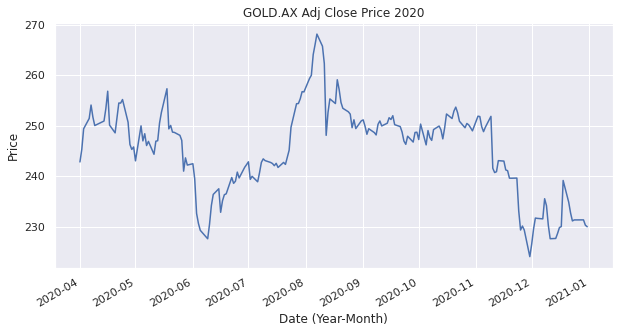

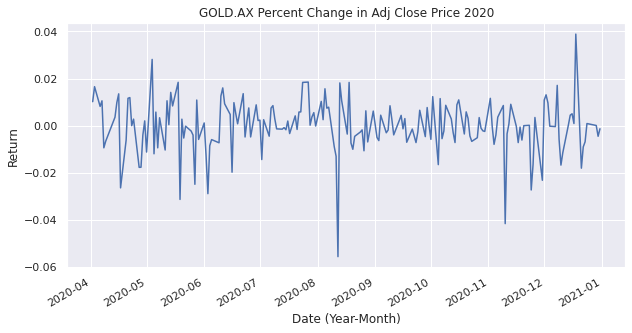

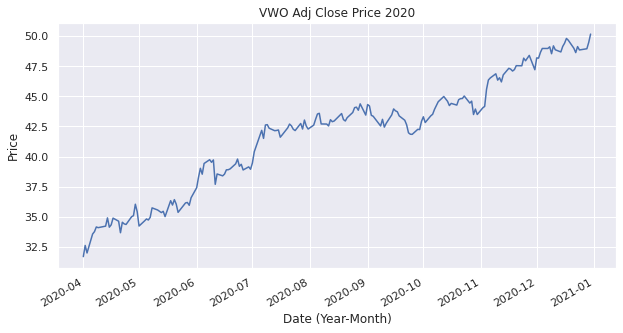

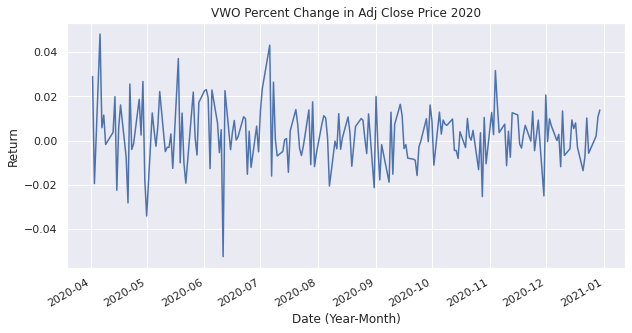

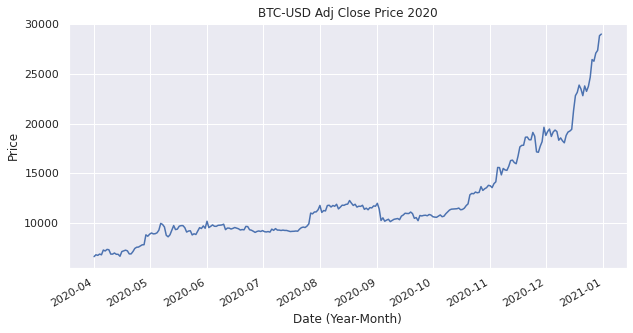

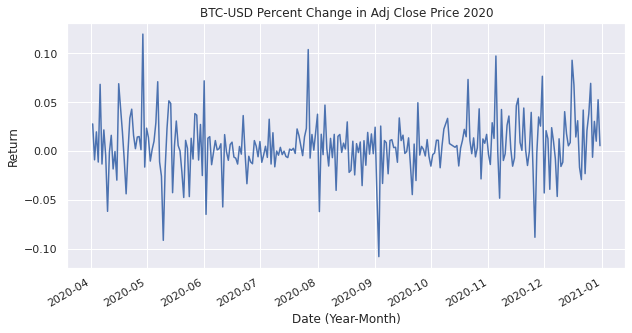

In [ ]:
 # VISUALIZE DAILY RETURNS
# GOLD
ticker = "GOLD.AX"
 
adj_gdf['Adj Close'].plot(figsize=(10, 5), title=f'{ticker} Adj Close Price 2020')
plt.xlabel("Date (Year-Month)")
plt.ylabel("Price")
plt.show()
adj_gdf['daily_ret'].plot(figsize=(10, 5), title=f'{ticker} Percent Change in Adj Close Price 2020')
plt.xlabel("Date (Year-Month)")
plt.ylabel("Return")
plt.show()
 
#EQUITY
ticker = "VWO"
 
adj_edf['Adj Close'].plot(figsize=(10, 5), title=f'{ticker} Adj Close Price 2020')
plt.xlabel("Date (Year-Month)")
plt.ylabel("Price")
plt.show()
adj_edf['daily_ret'].plot(figsize=(10, 5), title=f'{ticker} Percent Change in Adj Close Price 2020')
plt.xlabel("Date (Year-Month)")
plt.ylabel("Return")
plt.show()
 
# BITCOIN
ticker = "BTC-USD"
 
adj_bdf['Adj Close'].plot(figsize=(10, 5), title=f'{ticker} Adj Close Price 2020')
plt.xlabel("Date (Year-Month)")
plt.ylabel("Price")
plt.show()
adj_bdf['daily_ret'].plot(figsize=(10, 5), title=f'{ticker} Percent Change in Adj Close Price 2020')
plt.xlabel("Date (Year-Month)")
plt.ylabel("Return")
plt.show()

##3. Data Summaries.  
### Extreme Values


###3.1 Compute the returns for each series.

gold:


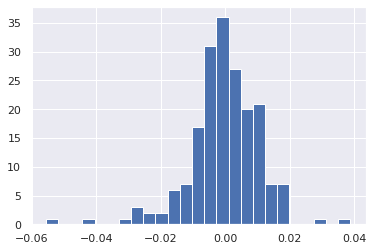

equity:


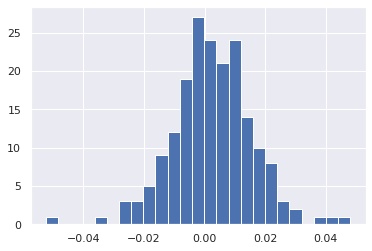

bitcoin:


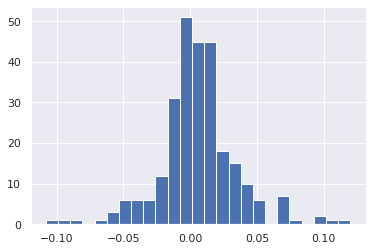

In [ ]:
# RETURNS FOR EACH SERIES
 
# HISTOGRAM TO VISUALIZE RETURN DISTRIBUTION
import matplotlib.pyplot as plt
plt.hist(adj_gdf["daily_ret"].dropna(), bins=25, density=False)
print("gold:")
plt.show()
print("equity:")
plt.hist(adj_edf["daily_ret"].dropna(), bins=25, density=False)
plt.show()
print("bitcoin:")
plt.hist(adj_bdf["daily_ret"].dropna(), bins=25, density=False)
plt.show()

In [ ]:
gold_returns = adj_gdf["daily_ret"].dropna()
equity_returns = adj_edf["daily_ret"].dropna()
bitcoin_returns = adj_bdf["daily_ret"].dropna()

In [ ]:
# COMPUTE MEAN DAILY RETURNS
daily_mean_g = np.mean(gold_returns)
print("gold:")
print(daily_mean_g)
print("")
daily_mean_e = np.mean(equity_returns)
print("equity:")
print(daily_mean_e)
print("")
daily_mean_b = np.mean(bitcoin_returns)
print("bitcoin:")
print(daily_mean_b)

gold:
-0.00028420056887044844

equity:
0.002433358678940208

bitcoin:
0.005478738215563301


In [ ]:
# Calculate average annualized return assuming 252 trading days in a year
annual_mean = (1+daily_mean_g**252)-1
print("gold:")
print(annual_mean)
print("")

annual_mean = (1+daily_mean_e**252)-1
print("equity:")
print(annual_mean)
print("")

annual_mean = (1+daily_mean_b**252)-1
print("bitcoin:")
print(annual_mean)
print("")

gold:
0.0

equity:
0.0

bitcoin:
0.0



In [ ]:
 # Calculate the annualized volatility of returns:
annual_vol_g = np.std(gold_returns) * np.sqrt(252)
print("gold:")
print(annual_vol_g)
print("")
 
annual_vol_e = np.std(equity_returns) * np.sqrt(252)
print("equity:")
print(annual_vol_e)
print("")
 
annual_vol_b = np.std(bitcoin_returns) * np.sqrt(252)
print("bitcoin:")
print(annual_vol_b)
print("")

gold:
0.17749196553210272

gold:
0.2142022138348175

gold:
0.46265942672271565



In [ ]:
 # Calculate the skewness of returns:
from scipy.stats import skew
print("gold:")
print(skew(gold_returns))
print("")
 
print("equity:")
print(skew(equity_returns))
print("")
 
print("bitcoin:")
print(skew(bitcoin_returns))

gold:
-0.895615779543488

equity:
-0.08353947344044765

bitcoin:
0.16122123806311456


Note that the skewness in Gold and Bitcoin suggests non-normality.

###3.2 Similarly, compute the kurtosis for each series.

In [ ]:
# KURTOSIS FOR EACH SERIES
from scipy.stats import kurtosis
#KURTOSIS FOR GOLD
print("gold:")
print(kurtosis(adj_gdf['daily_ret'].dropna()))
print("")

#KURTOSIS FOR EQUITY
print("equity:")
print(kurtosis(adj_edf['daily_ret'].dropna()))
print("")

#KURTOSIS FOR BITCOIN
print("bitcoin:")
print(kurtosis(adj_bdf['daily_ret'].dropna()))

gold:
4.0177974841210276

equity:
1.5987339948771435

bitcoin:
2.670648279474369


Note the excess kurtosis greater than 0 in Gold, Equity, and Bitcoin suggests non-normality.

In [ ]:
 
# TEST FOR NORMALITY
# The null hypothesis of the Shapiro-Wilk test is that the data are normally distributed.
# Run the Shapiro-Wilk normality test in Python from scipy import stats
p_value = stats.shapiro(gold_returns)[1]
if p_value <= 0.05:
    print("Null hypothesis of normality is rejected.")
 
else:
    print("Null hypothesis of normality is accepted.")

Null hypothesis of normality is rejected.


###3.3 Use a common metric (BUT NOT 2 SIGMA), or derive your own, to identify an extreme value. Explain your reasoning.

In [ ]:
 
# Generalized Extreme Value Distribution
# Example: Block maxima for April'20 - December'20
# Resample returns with desired period (weekly)
gold_returns = adj_gdf["daily_ret"]
maxima = gold_returns.resample("W").max()
 
# Generalized Extreme Value Distribution (GEV)
# Distribution of maxima of data
# Example: parametric estimation using scipy.stats.genextreme
from scipy.stats import genextreme
params = genextreme.fit(maxima)

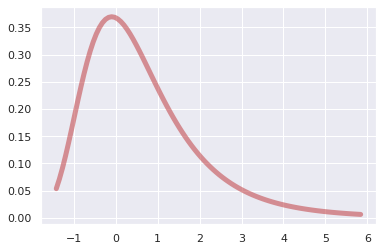

In [ ]:
c = -0.1
mean, var, skew, kurt = genextreme.stats(c, moments='mvsk')
# Display the probability density function (pdf):
x = np.linspace(genextreme.ppf(0.01, c),
                genextreme.ppf(0.99, c), 100)
plt.plot(x, genextreme.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='genextreme pdf')

In [ ]:
print(maxima)

Date
2020-04-05    0.016535
2020-04-12    0.010524
2020-04-19    0.013484
2020-04-26    0.011898
2020-05-03    0.001996
2020-05-10    0.028114
2020-05-17    0.014109
2020-05-24    0.018394
2020-05-31    0.010853
2020-06-07    0.001114
2020-06-14    0.016010
2020-06-21    0.009744
2020-06-28    0.013564
2020-07-05    0.008807
2020-07-12    0.008481
2020-07-19    0.001940
2020-07-26    0.018349
2020-08-02    0.018490
2020-08-09    0.015646
2020-08-16    0.018134
2020-08-23    0.018345
2020-08-30    0.006270
2020-09-06    0.006155
2020-09-13    0.008426
2020-09-20    0.004342
2020-09-27    0.006515
2020-10-04    0.012299
2020-10-11    0.011469
2020-10-18    0.010918
2020-10-25    0.005830
2020-11-01    0.003400
2020-11-08    0.011580
2020-11-15    0.009050
2020-11-22   -0.000042
2020-11-29    0.003439
2020-12-06    0.013070
2020-12-13    0.017084
2020-12-20    0.038880
2020-12-27    0.000865
2021-01-03    0.000043
Freq: W-SUN, Name: daily_ret, dtype: float64


In [ ]:
print(params)

(-0.7443423384664197, 0.006312469963263982, 0.007052022338150077)


In [ ]:
type(params)

tuple

No handles with labels found to put in legend.


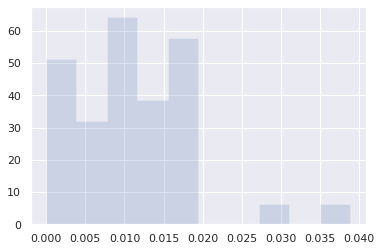

In [ ]:
fig, ax = plt.subplots(1, 1)
 
ax.hist(maxima, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

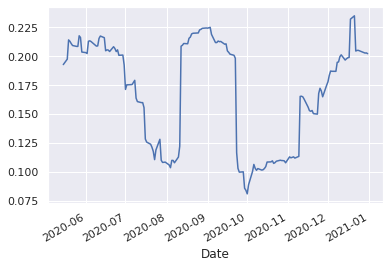

In [ ]:
 
# Observe volatility trend and possible extreme events
windowed = gold_returns.rolling(30)
volatility = windowed.std()*np.sqrt(252)
volatility.plot()
#.set ylabel("Standard Deviation...")

###USING R

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
install.packages('quantmod')
install.packages('PerformanceAnalytics')

In [ ]:
 %%R
library(devtools)
library(quantmod)
library(parallel)
library(xts)
library(zoo)
library(TTR)
library(PerformanceAnalytics)

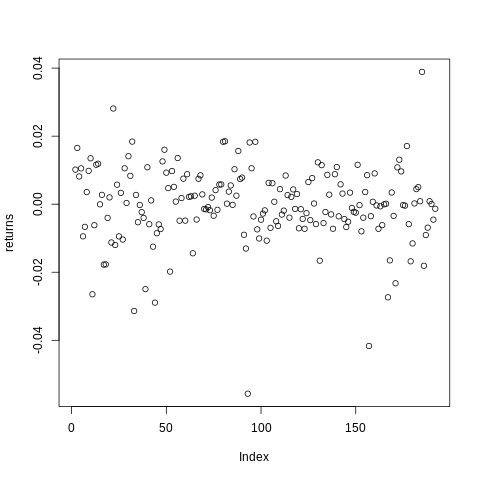

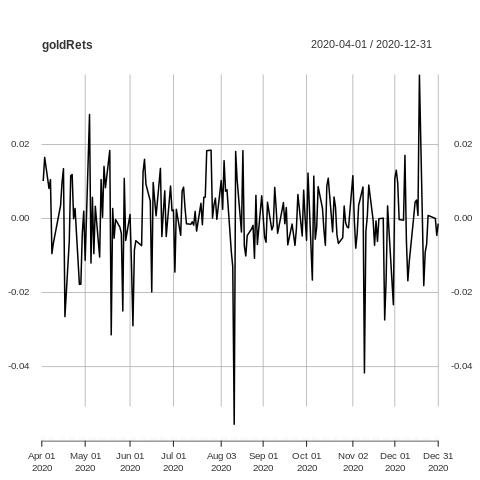

In [ ]:
 %%R
# GET SYMBOLS DATA
getSymbols("GOLD.AX", from='2020-04-01', to='2020-12-31')
 
# CREATE RETURNS
goldRets = diff( log( Cl( GOLD.AX ) ) )
returns = as.numeric(goldRets)
plot(returns)
plot(goldRets)

In [ ]:
%%R
gold_losses <- -goldRets
gold_extremes <- gold_losses[gold_losses > 0.025]
head(gold_extremes)

           GOLD.AX.Close
2020-04-17    0.02647250
2020-05-19    0.03138140
2020-06-03    0.02893596
2020-08-12    0.05569509
2020-11-10    0.04167269
2020-11-24    0.02737000


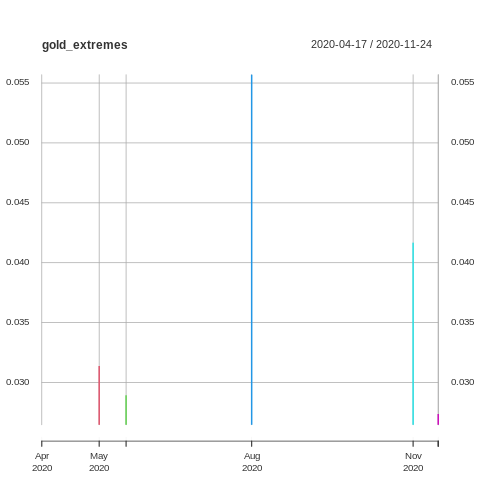

In [ ]:
%%R
# Plotting the extremes values
plot(gold_extremes, type = 'h', auto.grid = FALSE)

Extreme returns appear in clusters

3.4 Apply your metric to each of the return series.

In [ ]:
%%R
library(tidyverse)
#library(coinmarketcap)

In [ ]:
%%R
portfolio = c("BTC-USD","GOLD.AX","VWO")
getSymbols(portfolio, src="yahoo", from="2020-04-01", to="2020-12-31")

[1] "BTC-USD" "GOLD.AX" "VWO"    


In [ ]:
 %%R
tail(`BTC-USD`)

           BTC-USD.Open BTC-USD.High BTC-USD.Low BTC-USD.Close BTC-USD.Volume
2020-12-26     24677.02     26718.07    24522.69      26437.04    48332647295
2020-12-27     26439.37     28288.84    25922.77      26272.29    66479895605
2020-12-28     26280.82     27389.11    26207.64      27084.81    49056742893
2020-12-29     27081.81     27370.72    25987.30      27362.44    45265946774
2020-12-30     27360.09     28937.74    27360.09      28840.95    51287442704
2020-12-31     28841.57     29244.88    28201.99      29001.72    46754964848
           BTC-USD.Adjusted
2020-12-26         26437.04
2020-12-27         26272.29
2020-12-28         27084.81
2020-12-29         27362.44
2020-12-30         28840.95
2020-12-31         29001.72


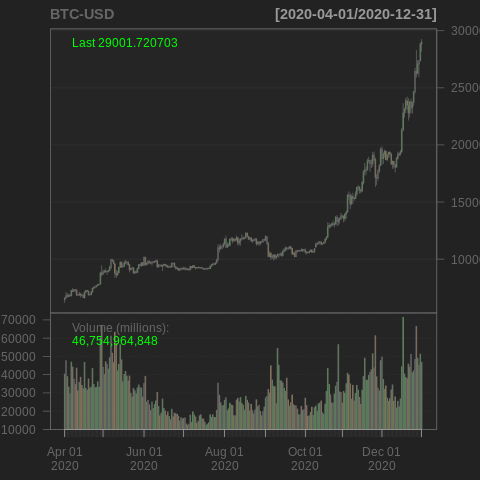

In [ ]:
%%R
chartSeries(`BTC-USD`)

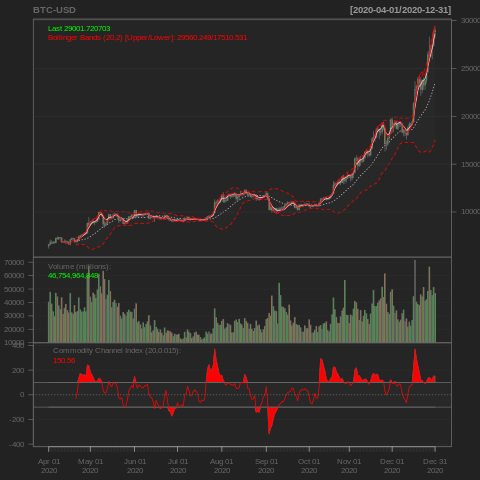

In [ ]:
%%R
chartSeries(`BTC-USD`,TA="addVo();addBBands();addCCI();addDEMA();addZLEMA()")

In [ ]:
%%R
chart.Histogram(goldRets, methods = c("add.normal","add.density"),colorset = c("gray","red","blue"))

In [ ]:
%%R
# DATA CLEANING
`BTC-USD` <- na.omit(`BTC-USD`)
 
# Calculation of financial returns
# It is recommended to always use adjusted prices to calculate financial returns. Yahoo Finance adjust closing prices to consider any stock split and/or dividend payments.
# We create a new object that contains the adjusted prices of BTC-USD:"""
prices <- Ad(`BTC-USD`)
 
#The Ad() function extracts the adjusted prices of an xts-zoo object.
# We assign a column name for the adjusted prices:
colnames(prices) <- "adj_price"

In [ ]:
 
%%R
# APPLY METRIC TO EACH RETURN SERIES
# GOLD
# CREATE RETURNS
goldRets = diff(log(Cl(GOLD.AX)))
greturns = as.numeric(goldRets)
 
# EQUITY
# CREATE RETURNS
equityRets = diff(log(Cl(VWO)))
ereturns = as.numeric(equityRets)
 
# BITCOIN - BTC-USD.Adjusted
# CREATE RETURNS
prices$bitcoin <- diff(log(prices$adj_price))
#breturns = as.numeric(bitcoinRets)

In [ ]:
%%R
# GOLD
gold_losses <- -goldRets
gold_extremes <- gold_losses[gold_losses > 0.025]
head(gold_extremes)

           GOLD.AX.Close
2020-04-17    0.02647250
2020-05-19    0.03138140
2020-06-03    0.02893596
2020-08-12    0.05569509
2020-11-10    0.04167269
2020-11-24    0.02737000


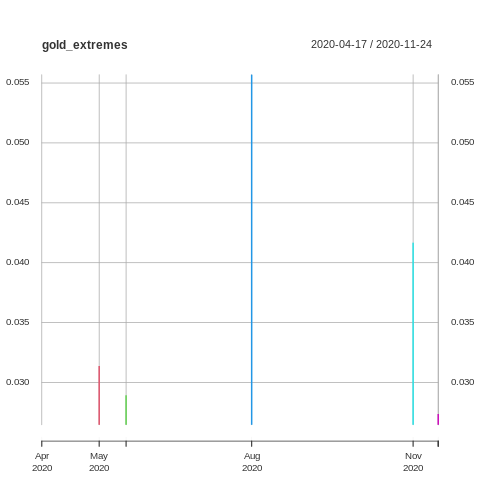

In [ ]:
 %%R
# GOLD
# Plotting the extremes values
plot(gold_extremes, type = 'h', auto.grid = FALSE)

In [ ]:
 %%R
# EQUITY
equity_losses <- -equityRets
equity_extremes <- equity_losses[equity_losses > 0.025]
head(equity_extremes)

            VWO.Close
2020-04-21 0.02809818
2020-05-01 0.03402547
2020-06-11 0.05237064
2020-10-28 0.02524360


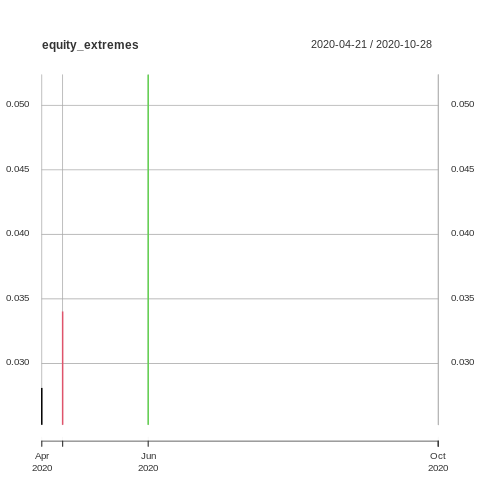

In [ ]:
%%R
# EQUITY
# Plotting the extremes values
plot(equity_extremes, type = 'h', auto.grid = FALSE)

In [ ]:
%%R
# BITCOIN 
bitcoin_losses <- -prices$bitcoin
bitcoin_extremes <- bitcoin_losses[bitcoin_losses > 0.025]
head(bitcoin_extremes)

              bitcoin
2020-04-10 0.06165265
2020-04-15 0.02971294
2020-04-20 0.04370789
2020-05-09 0.02559950
2020-05-10 0.09133875
2020-05-15 0.04255454


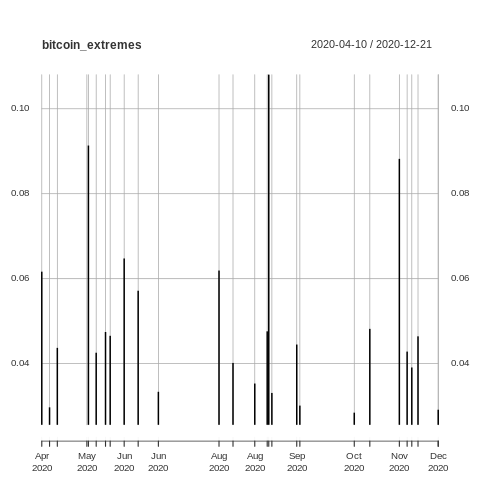

In [ ]:
 %%R
# BITCOIN
# Plotting the extremes values
plot(bitcoin_extremes, type = 'h', auto.grid = FALSE)

##4. Data Comparison.  
###Copulas.


###4.1 Pick 2 of the series that had the most extreme values.

Bitcoin & Equity series had the most extreme values.

###4.2 Graph the returns of those 2 series on an x-y plot.  Feel free to use either an individual quarter, or several quarters.

In [ ]:
# Copulas
!pip install copulas
!pip install copulalib
!pip install pyvinecopulib

     |████████████████████████████████| 51kB 2.6MB/s 
     |████████████████████████████████| 9.5MB 6.4MB/s 
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


  Created wheel for copulalib: filename=copulalib-1.1.0-cp37-none-any.whl size=15493 sha256=06e78c99b26f2450b72902acd003215e7acf42abe5fd82b7d1dd3c3659e25164
  Stored in directory: /root/.cache/pip/wheels/fa/91/da/a28ad14de07e43f4986f6093bf4a3b2d14f001fe05444b0085
Successfully built copulalib
     |████████████████████████████████| 11.9MB 5.0MB/s 
     |████████████████████████████████| 194kB 51.6MB/s 


In [ ]:
from pandas_datareader import data as web
from copulas.univariate import Univariate
from copulas.bivariate import Bivariate
from copulalib.copulalib import Copula
from statsmodels.distributions.empirical_distribution import ECDF 
import pyvinecopulib as pv
import seaborn as sb
import pandas as pd
import numpy as np
import scipy.stats as stat
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')


#Get stocks
asset=['GOLD.AX','VWO','BTC-USD']

#Get the stock/portfolio starting date
stockStartDate='2020-04-01'

#Get the stock/portfolio end date
today='2020-12-31'#datetime.today().strftime('%Y-%m-%d')

#Create dataframe to store the stocks
df=pd.DataFrame()

#Store the adjusted close price of the stock into df
for stock in asset:
    df[stock]=web.DataReader(stock,data_source='yahoo', start=stockStartDate,end=today)['Adj Close']

df.describe()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


GOLD.AX         VWO       BTC-USD
count  192.000000  175.000000    187.000000
mean   245.314219   41.664119  12009.942960
std      8.671190    4.529557   4297.958179
min    224.080002   31.677870   6606.776367
25%    239.922497   38.535206   9300.814453
50%    247.334999   42.636627  10679.136719
75%    250.899998   44.217947  12948.715332
max    268.149994   50.175312  28840.953125

In [ ]:
df['daily_ret_g'] = np.log(df['GOLD.AX']).diff()
df['daily_ret_e'] = np.log(df['VWO']).diff()
df['daily_ret_b'] = np.log(df['BTC-USD']).diff()

df= df.dropna()

In [ ]:
df.corr()

GOLD.AX       VWO  ...  daily_ret_e  daily_ret_b
GOLD.AX      1.000000 -0.249947  ...    -0.054582    -0.030244
VWO         -0.249947  1.000000  ...     0.030708     0.092569
BTC-USD     -0.441937  0.802136  ...     0.049640     0.267615
daily_ret_g  0.157749 -0.007223  ...    -0.004801     0.072537
daily_ret_e -0.054582  0.030708  ...     1.000000    -0.002117
daily_ret_b -0.030244  0.092569  ...    -0.002117     1.000000

[6 rows x 6 columns]

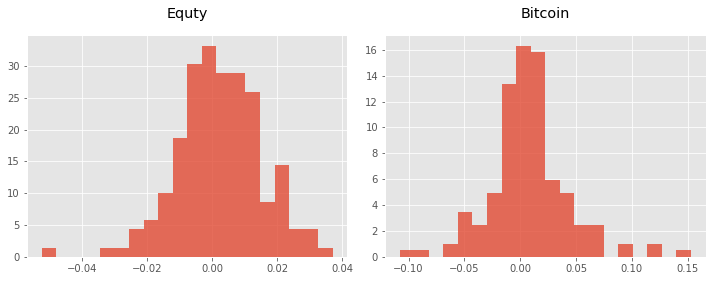

In [ ]:
from copulas.visualization import hist_1d, side_by_side

side_by_side(hist_1d, {'Equty': df['daily_ret_e'], 'Bitcoin': df['daily_ret_b']})

No handles with labels found to put in legend.


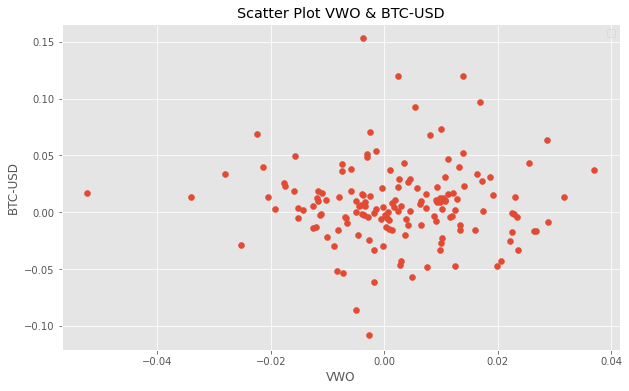

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(df['daily_ret_e'],df['daily_ret_b'])

# Set x and y axes labels
plt.xlabel('VWO')
plt.ylabel('BTC-USD')

plt.title('Scatter Plot VWO & BTC-USD')
plt.legend()
plt.show()

In [ ]:
df_ret_eb=df[['daily_ret_e', 'daily_ret_b']]

df_eb=df[['VWO', 'BTC-USD']]

Price Scatter plot:


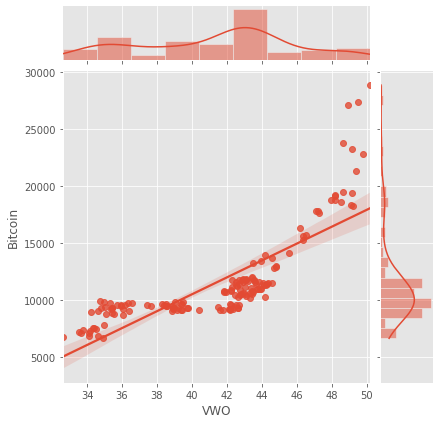

In [ ]:
print("Price Scatter plot:")
p = sb.jointplot(data=df_eb,x='VWO', y='BTC-USD',kind='reg')
p.set_axis_labels('VWO', 'Bitcoin', fontsize=12)

Return Scatter plot:


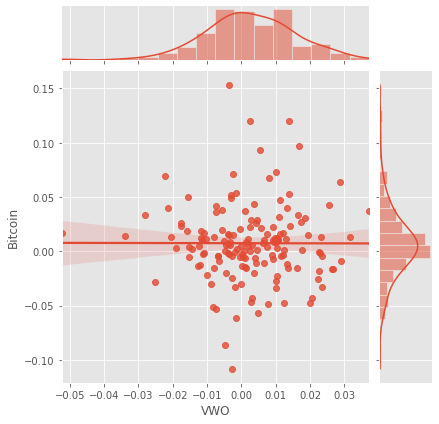

In [ ]:
print("Return Scatter plot:")
p = sb.jointplot(data=df_ret_eb,x='daily_ret_e', y='daily_ret_b',kind='reg')
p.set_axis_labels('VWO', 'Bitcoin', fontsize=12)

Price Contour plot:


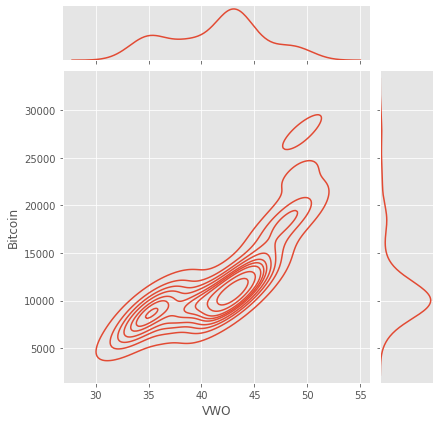

In [ ]:
print("Price Contour plot:")
p = sb.jointplot(data=df_eb,x='VWO', y='BTC-USD',kind='kde')
p.set_axis_labels('VWO', 'Bitcoin', fontsize=12)

Return Contour plot:


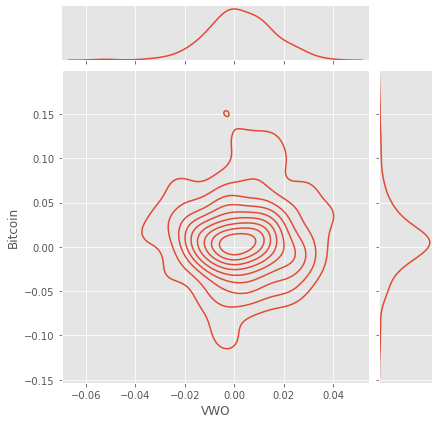

In [ ]:
print("Return Contour plot:")
p = sb.jointplot(data=df_ret_eb,x='daily_ret_e', y='daily_ret_b',kind='kde')
p.set_axis_labels('VWO', 'Bitcoin', fontsize=12)

###4.3 Fit a non-Gaussian copula to the returns of those 2 series.  Some possibilities are Student's T, Clayton, Gumbel, choose your own,...

In [ ]:
np_df_eb=df_eb.to_numpy()
np_ret_eb=df_ret_eb.to_numpy()

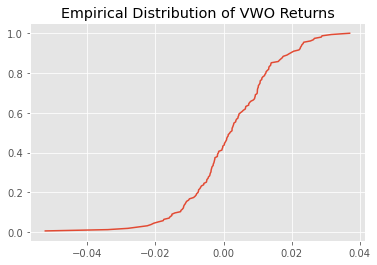

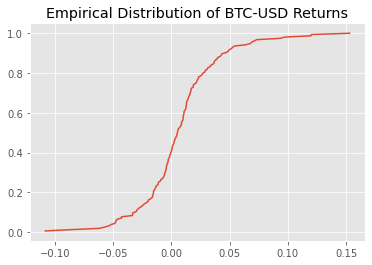

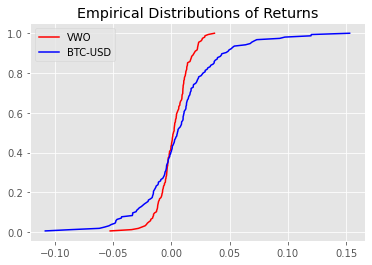

In [ ]:
#Empirical Distribution
ecdf_e = ECDF(df_ret_eb['daily_ret_e'])
plt.plot(ecdf_e.x, ecdf_e.y)
plt.title('Empirical Distribution of VWO Returns')
plt.show()

ecdf_b = ECDF(df_ret_eb['daily_ret_b'])
plt.plot(ecdf_b.x, ecdf_b.y)
plt.title('Empirical Distribution of BTC-USD Returns')
plt.show()

plt.title('Empirical Distributions of Returns')
plt.plot(ecdf_e.x, ecdf_e.y, 'r',label='VWO') 
plt.plot(ecdf_b.x, ecdf_e.y, 'b',label='BTC-USD') 
plt.legend(loc="upper left") 
plt.show()


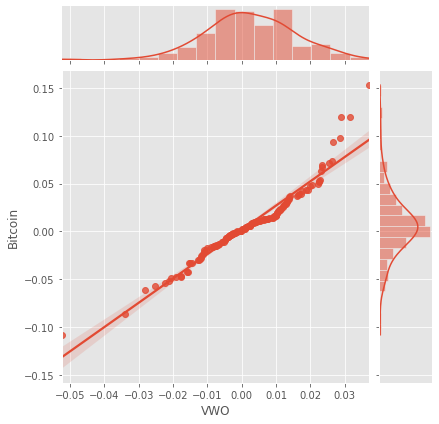

In [ ]:
df_copula=pd.DataFrame([ecdf_e.x,ecdf_b.x]).T
df_copula.columns=['VWO','BTC-USD']
df_copula = df_copula.iloc[1:,:]
p = sb.jointplot(data=df_copula,x='VWO', y='BTC-USD',kind='reg')
p.set_axis_labels('VWO', 'Bitcoin', fontsize=12)

In [ ]:
#Approximation of the marginal distributions
univariate = Univariate()
univariate.fit(df_ret_eb['daily_ret_e'])
parameters = univariate.to_dict()
print('VWO distribution estimation:')
print(parameters)
print("")

univariate.fit(df_ret_eb['daily_ret_b'])
parameters = univariate.to_dict()
print('BTC-USD distribution estimation:')
print(parameters)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


VWO distribution estimation:
{'df': 9.121939624002493, 'loc': 0.002471162728188734, 'scale': 0.011775353692657326, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}

BTC-USD distribution estimation:
{'c': 14.055408568421647, 'loc': -0.332477624940681, 'scale': 0.3378739287026523, 'type': 'copulas.univariate.log_laplace.LogLaplace'}


<pyvinecopulib.Bicop>
Independence


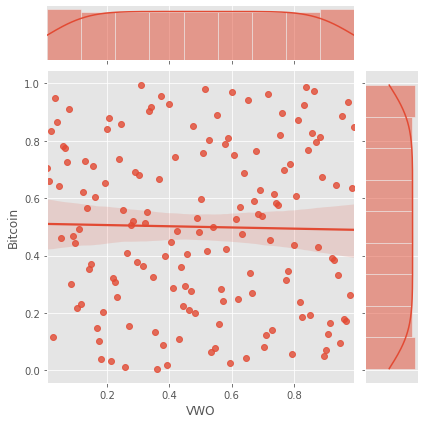

In [ ]:
#Transform into numpy array and into space [0,1] for the copula
np_ret_eb=df_ret_eb.to_numpy()
np_ret_eb_unif=pv.to_pseudo_obs(np_ret_eb)
pd_ret_eb_unif = pd.DataFrame(np_ret_eb_unif, columns = ['VWO','BTC-USD'])

p = sb.jointplot(data=pd_ret_eb_unif,x='VWO', y='BTC-USD',kind='reg')
p.set_axis_labels('VWO', 'Bitcoin', fontsize=12)

#Suggested copula given the data
cop = pv.Bicop(data=np_ret_eb_unif)
print(cop)


In [ ]:
from copulas.bivariate import independence
from copulas.multivariate import VineCopula

bivariate = Bivariate(copula_type='independence')
bivariate.fit(np_ret_eb_unif)
parameters = bivariate.to_dict()
print('Distribution estimation:')
print(parameters)
print("")

center = VineCopula('center')
regular = VineCopula('regular')
direct = VineCopula('direct')

center.fit(pd_ret_eb_unif)
regular.fit(pd_ret_eb_unif)
direct.fit(pd_ret_eb_unif)

parameters = center.to_dict()
print('Center Vine Copula:')
print(parameters)
print("")
parameters = regular.to_dict()
print('Regular Vine Copula:')
print(parameters)
print("")
parameters = direct.to_dict()
print('Direct Vine Copula:')
print(parameters)

Distribution estimation:
{'copula_type': 'INDEPENDENCE', 'theta': None, 'tau': None}

Center Vine Copula:
{'type': 'copulas.multivariate.vine.VineCopula', 'vine_type': 'center', 'fitted': True, 'n_sample': 155, 'n_var': 2, 'depth': 1, 'truncated': 3, 'trees': [{'tree_type': <TreeTypes.CENTER: 0>, 'type': 'copulas.multivariate.tree.CenterTree', 'fitted': True, 'level': 1, 'n_nodes': 2, 'tau_matrix': [[nan, -0.012149141181399245], [-0.012149141181399245, 1.0]], 'previous_tree': [[0.9493159642465733, 0.26151944480583544], [0.9456211250511483, 0.9203227777568653], [0.6096746381317648, 0.7512813404844421], [0.7767507372052672, 0.3129491819338172], [0.3903253618682352, 0.05068403575342656], [0.9293306537879832, 0.10443180330371521], [0.05822735876226976, 0.929330653787983], [0.21060938352630765, 0.05822735876226977], [0.05068403575342656, 0.8327751596952551], [0.933624363016523, 0.8793972153195352], [0.2872020769067949, 0.6934915683178015], [0.4032274689553201, 0.4483873417356296], [0.879397

In [ ]:
center_samples = center.sample(1000)
regular_samples = regular.sample(1000)
direct_samples = direct.sample(1000)

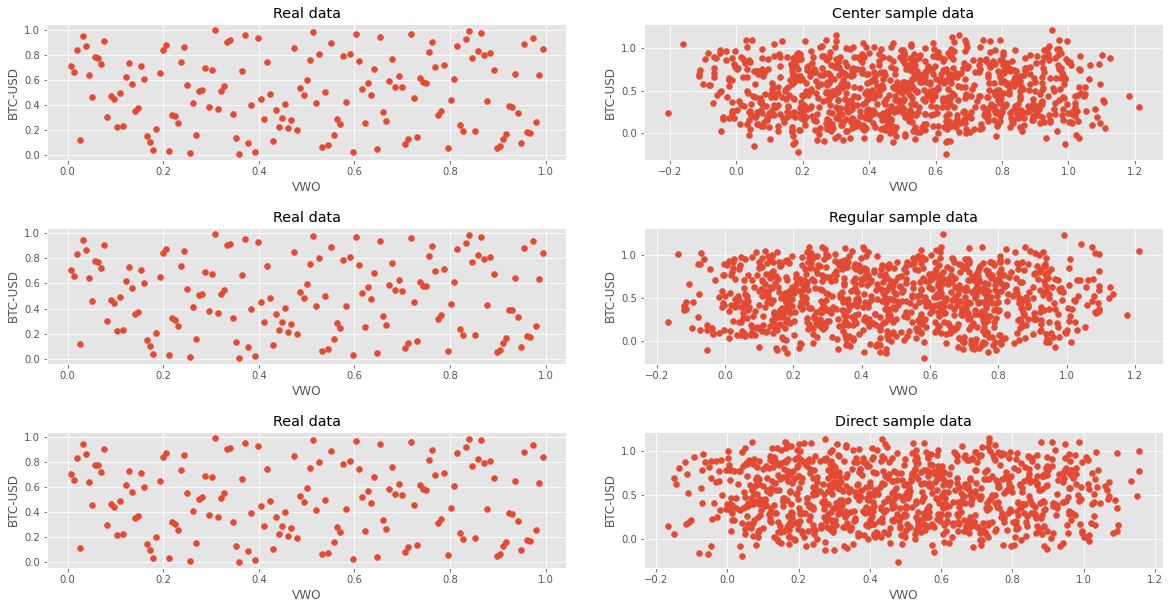

In [ ]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.15, hspace=.5)
plt.subplot(3, 2, 1)
plt.scatter(pd_ret_eb_unif['VWO'],pd_ret_eb_unif['BTC-USD'])
plt.title('Real data')
plt.ylabel('BTC-USD')
plt.xlabel('VWO')

plt.subplot(3, 2, 2)
plt.scatter(center_samples['VWO'],center_samples['BTC-USD'])
plt.title('Center sample data')
plt.ylabel('BTC-USD')
plt.xlabel('VWO')

plt.subplot(3, 2, 3)
plt.scatter(pd_ret_eb_unif['VWO'],pd_ret_eb_unif['BTC-USD'])
plt.title('Real data')
plt.ylabel('BTC-USD')
plt.xlabel('VWO')

plt.subplot(3, 2, 4)
plt.scatter(regular_samples['VWO'],regular_samples['BTC-USD'])
plt.title('Regular sample data')
plt.ylabel('BTC-USD')
plt.xlabel('VWO')

plt.subplot(3, 2, 5)
plt.scatter(pd_ret_eb_unif['VWO'],pd_ret_eb_unif['BTC-USD'])
plt.title('Real data')
plt.ylabel('BTC-USD')
plt.xlabel('VWO')

plt.subplot(3, 2, 6)
plt.scatter(direct_samples['VWO'],direct_samples['BTC-USD'])
plt.title('Direct sample data')
plt.ylabel('BTC-USD')
plt.xlabel('VWO')
plt.show()

####R Code

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
install.packages("copula")
install.packages('VineCopula')
install.packages("ggplot2")
install.packages("grid")
install.packages("quantmod")

In [ ]:
%%R
#library(copula)
library(VineCopula)
library(ggplot2)
library(grid)
library(quantmod)
library(tidyverse)
library(ggplot2)
#library(ggExtra)
#library(plyr)

In [ ]:
%%R
#Create a dataframe with the assets
symbols <- c("BTC-USD","VWO")
 
dataEnv <- new.env()
loadSymbols(symbols, from="2020-04-01", to="2020-12-31", env=dataEnv)
plist <- eapply(dataEnv, Ad)
df <- na.omit(do.call(merge, plist))
 
#Create the returns of the assets
df$VWO.Return <- diff(log(df$VWO.Adjusted))
df$BTC.USD.Return <- diff(log(df$BTC.USD.Adjusted))
 
#Drop NAs in returns
df <- na.omit(df)
 
#Create a df just with the returns
df_returs<-df[, c("VWO.Return", "BTC.USD.Return")]
 
#Transform the returns to [0,1] space
udat <- data.frame(pobs(df_returs))

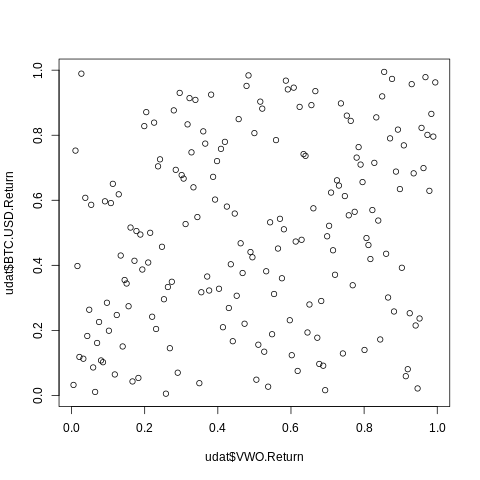

In [ ]:
%%R
plot(udat$VWO.Return, udat$BTC.USD.Return)

In [ ]:
%%R
#Select the best copula that fits our data
selectedCopula <- BiCopSelect(udat$VWO.Return,udat$BTC.USD.Return, familyset = NA)
summary(selectedCopula)  # comprehensive overview
str(selectedCopula)  # see all contents of the object

Family
------ 
No:    214
Name:  Rotated Tawn type 2 180 degrees

Parameter(s)
------------
par:  1.45
par2: 0.36
Dependence measures
-------------------
Kendall's tau:    0.16 (empirical = 0.16, p value < 0.01)
Upper TD:         0 
Lower TD:         0.21 

Fit statistics
--------------
logLik:  7.33 
AIC:    -10.66 
BIC:    -4.22 

List of 15
 $ family           : num 214
 $ par              : num 1.45
 $ par2             : num 0.356
 $ npars            : num 2
 $ familyname       : chr "Rotated Tawn type 2 180 degrees"
 $ tau              : num 0.159
 $ beta             : num 0.154
 $ taildep          :List of 2
  ..$ lower: num 0.206
  ..$ upper: num 0
 $ call             : language BiCopSelect(u1 = udat$VWO.Return, u2 = udat$BTC.USD.Return, familyset = NA)
 $ nobs             : int 185
 $ logLik           : num 7.33
 $ AIC              : num -10.7
 $ BIC              : num -4.22
 $ emptau           : num 0.162
 $ p.value.indeptest: num 0.00106
 - attr(*, "class")= chr "BiCop"


##5. Category 1 Models: 
###Just use 1 variable.  Note that Q represents QUARTER, not question.
 

###5.1 Pick one of the 3 series (gold, equity, or bitcoin).

In [ ]:
"""We picked Equity"""

'We picked Equity'

### Install and Import Backtest dependencies

In [ ]:
!pip install bt
import bt

     |████████████████████████████████| 2.7MB 5.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for bt: filename=bt-0.2.9-cp37-cp37m-linux_x86_64.whl size=765265 sha256=bc9b10101fc7250c69bbc3ccb10154276f42cbb43405980ca77147094a5b3e85
  Stored in directory: /root/.cache/pip/wheels/18/2a/31/ead0e40a43116c3278ea50bdec622d43c9e51263b8a62ad71c
Successfully built bt


In [ ]:
import bt

###5.2 Use Q2 data for estimation, and Q3 data for evaluating performance.

###5.3 Repeat, using Q3 data for estimation, and Q4 data for evaluating performance.

###5.4 Build 2 trading strategies that uses only the previous values of that series.

###5.5 The first strategy needs to include some form of ARMA.

In [ ]:
# Category 1 Model:
# With ARMA

In [ ]:
import os
import pandas as pd
from pandas.plotting import lag_plot
from pandas import datetime
import numpy as np
import random
import itertools
import yfinance as yf
from arch import arch_model
import pmdarima as pm
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,cross_val_score, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score,precision_recall_curve, average_precision_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,matthews_corrcoef
from scipy.stats import shapiro
from scipy.stats import probplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.stats.diagnostic import het_arch, acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [ ]:
# download, create returns and 
ticker = ['VWO','GOLD.AX','BTC-USD']
df = yf.download(ticker,                    
                     start='2020-04-01',
                     end='2020-12-31',
                     progress=False)['Adj Close']
 
df.dropna(inplace = True)
 
df['VWO_daily_ret'] = np.log(df['VWO']).diff()
df['GOLD.AX_daily_ret'] = np.log(df['GOLD.AX']).diff()
df['BTC-USD_daily_ret'] = np.log(df['BTC-USD']).diff()
 
df.dropna(inplace = True)
 
Q2_df = df.loc['2020-04-01': '2020-06-30']
Q3_df = df.loc['2020-07-01' : '2020-09-30']
Q4_df = df.loc['2020-10-01' : '2020-12-31']

####Q2 data for estimation, and Q3 data for evaluating performance

---



In [ ]:
dftest = sm.tsa.adfuller(Q2_df['VWO'], autolag = 'AIC')
dftest

(-1.665615887657976,
 0.4489095532885941,
 1,
 57,
 {'1%': -3.5506699942762414,
  '10%': -2.5946240473991997,
  '5%': -2.913766394626147},
 87.06945292191132)

ADF suggest we need a diference, $d=1$ to get a stationary series.

In [ ]:
#ADF test for the first difference
diff_1 = Q2_df['VWO'].diff().dropna()
print("p-value:", adfuller(diff_1.dropna())[1])

p-value: 3.886230869597893e-18


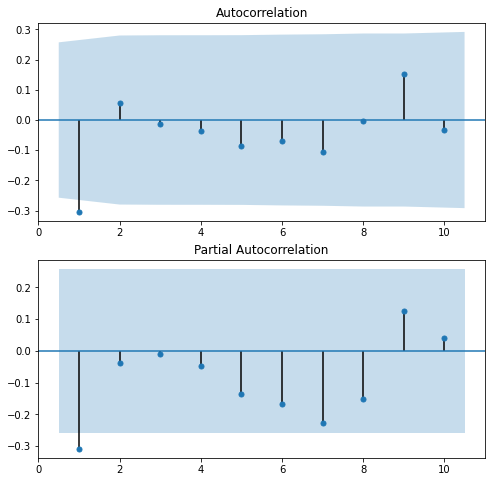

In [ ]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
# Make ACF plot
plot_acf(diff_1, lags=10, zero=False, ax=ax1)
# Make PACF plot
plot_pacf(diff_1, lags=10, zero=False, ax=ax2)
plt.show()

ACF and PACF suggests $q=1$ and $p=1$. The model that we are going to propose is an $ARIMA(1,1,1)$

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

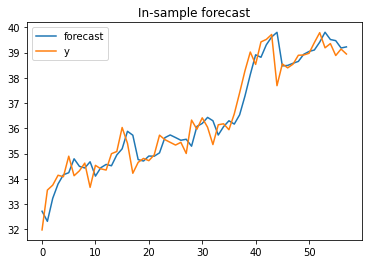

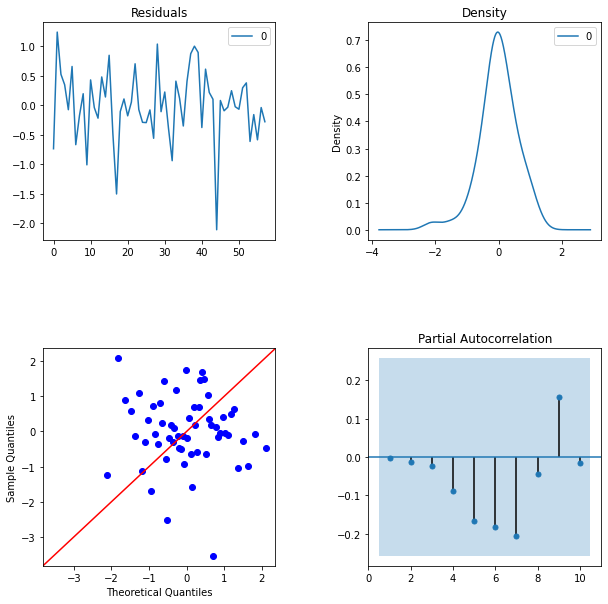

In [ ]:
train_data, test_data = Q2_df, Q3_df

training_data = train_data['VWO'].values
testing_data = test_data['VWO'].values

model = ARIMA(training_data, order=(1,1,1))
model_fit = model.fit()
model_fit.summary()

model_fit.plot_predict(dynamic=False)
plt.title("In-sample forecast")
plt.show()

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.4, hspace=.5)
residuals.plot(title="Residuals", ax=ax1)
residuals.plot(kind='kde', title='Density', ax=ax2)
sm.qqplot(residuals,fit=True, line="45",ax=ax3)
plot_pacf(residuals,lags=10, zero=False, ax=ax4)
plt.show()

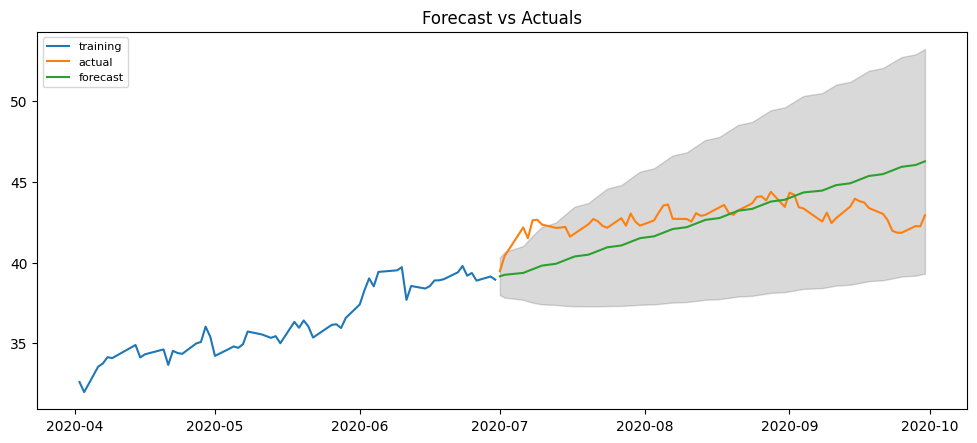

In [ ]:
# Build Model 
model = ARIMA(training_data, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(len(testing_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data['VWO'], label='training')
plt.plot(test_data['VWO'], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(actual,forecast):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-testing_data)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(testing_data,fc)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  of the autocorrelation function results.


{'acf1': 0.9341493960725288,
 'corr': 0.4635791962620626,
 'mae': 1.516731559155777,
 'mape': 0.035636362614307304,
 'me': -0.09152018930969308,
 'minmax': 0.03458906809063045,
 'mpe': -0.002191625656800811,
 'rmse': 1.85810156959379}

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=103.076, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=100.163, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=101.375, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=101.498, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=98.865, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.363 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   64
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -48.433
Date:                Tue, 20 Apr 2021   AIC                             98.865
Time:                        22:34:20   BIC                            101.008
Sample:                             0   HQIC                            99.708
                                 - 64                                         
Cov

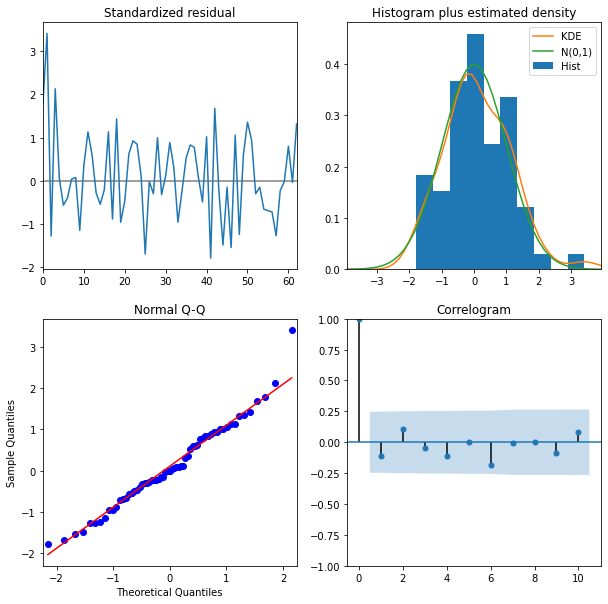

In [ ]:
#Stepwise ARIMA and diagnosis of residuals
model = pm.auto_arima(testing_data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

model.plot_diagnostics(figsize=(10,10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.55, hspace=.55)
plt.show()

In [ ]:
#Fit the model and create the forecast for Q3 on step at a time
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = testing_data[time_point]
    history.append(true_test_value)
#MSE_error = mean_squared_error(testing_data, model_predictions)
#print('Testing Mean Squared Error is {}'.format(MSE_error))


In [ ]:
#Accuracy and error metrics
model_predictions=np.array([np.array(xi) for xi in model_predictions])
model_predictions=model_predictions.reshape((len(model_predictions),))
forecast_accuracy(testing_data,model_predictions)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  of the autocorrelation function results.


{'acf1': 0.9341493960725288,
 'corr': 0.8454587478639263,
 'mae': 0.4302530528787706,
 'mape': 0.010086597951978995,
 'me': 0.07299526502652587,
 'minmax': 0.010004151690020002,
 'mpe': 0.0017189920651593227,
 'rmse': 0.5309288079118286}

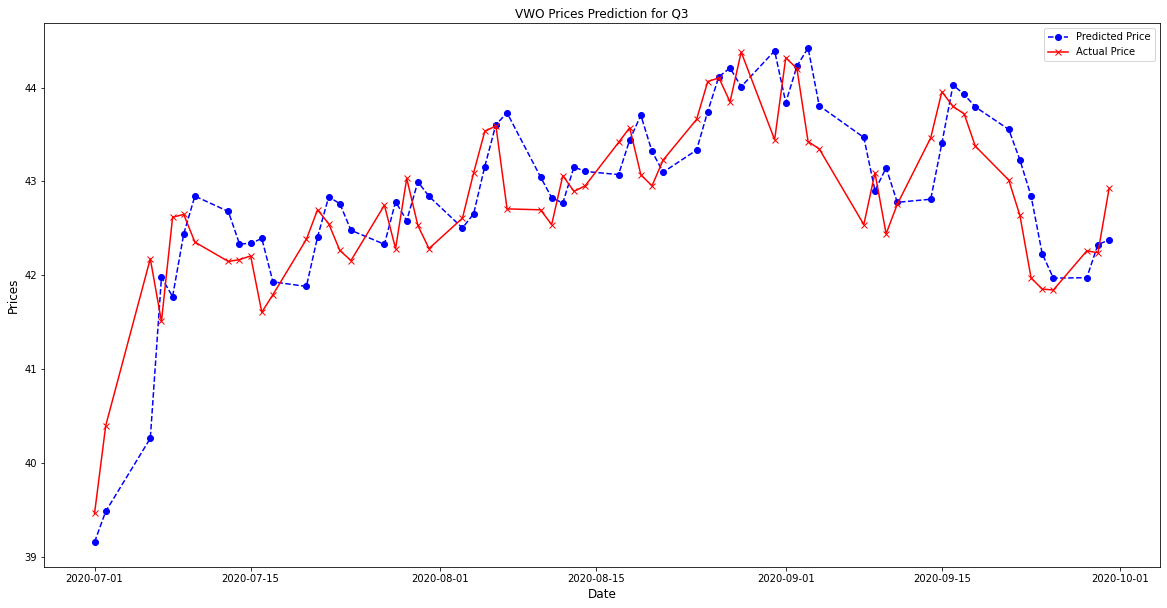

In [ ]:
#Plot of predicted price vs actual, one step at a time
test_set_range = Q3_df.index

plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, testing_data, color='red', marker='x',label='Actual Price')
plt.title('VWO Prices Prediction for Q3')
plt.xlabel('Date',size = 12)
plt.ylabel('Prices',size = 12)
plt.legend()
plt.show()

####Q3 data for estimation, and Q4 data for evaluating performance

In [ ]:
dftest = sm.tsa.adfuller(Q3_df['VWO'], autolag = 'AIC')
dftest

(-4.463902251746662,
 0.00022837943230429722,
 0,
 63,
 {'1%': -3.5386953618719676,
  '10%': -2.591896782564878,
  '5%': -2.9086446751210775},
 61.85367750815443)

ADF suggest we need a diference, $d=0$ to get a stationary series.

In [ ]:
#ADF test for the first difference
diff_1 = Q3_df['VWO'].diff().dropna()
print("p-value:", adfuller(diff_1.dropna())[1])

p-value: 2.5794342186198753e-14


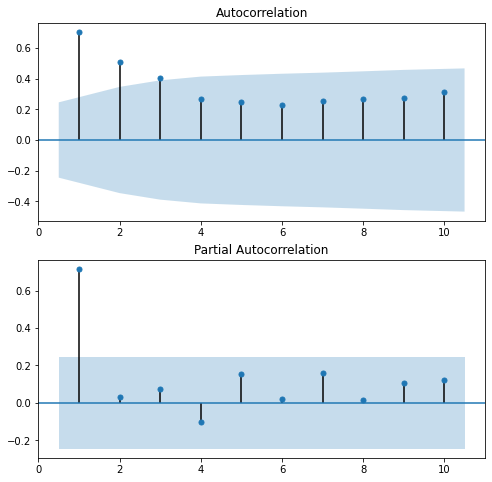

In [ ]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
# Make ACF plot
plot_acf(Q3_df['VWO'], lags=10, zero=False, ax=ax1)
# Make PACF plot
plot_pacf(Q3_df['VWO'], lags=10, zero=False, ax=ax2)
plt.show()

ACF and PACF suggests $q=3$ and $p=1$. The model that we are going to propose is an $ARIMA(1,0,3)$

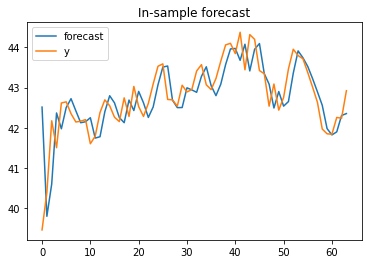

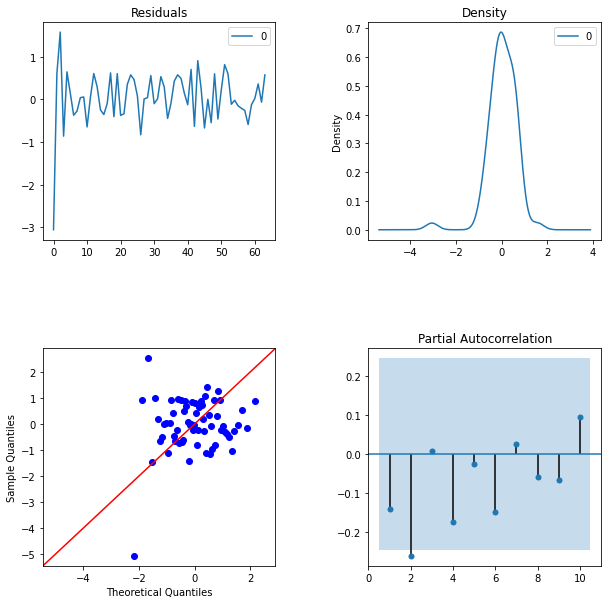

In [ ]:
train_data, test_data = Q3_df, Q4_df

training_data = train_data['VWO'].values
testing_data = test_data['VWO'].values

model = ARIMA(training_data, order=(1,0,3))
model_fit = model.fit()
model_fit.summary()

model_fit.plot_predict(dynamic=False)
plt.title("In-sample forecast")
plt.show()

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.4, hspace=.5)
residuals.plot(title="Residuals", ax=ax1)
residuals.plot(kind='kde', title='Density', ax=ax2)
sm.qqplot(residuals,fit=True, line="45",ax=ax3)
plot_pacf(residuals,lags=10, zero=False, ax=ax4)
plt.show()

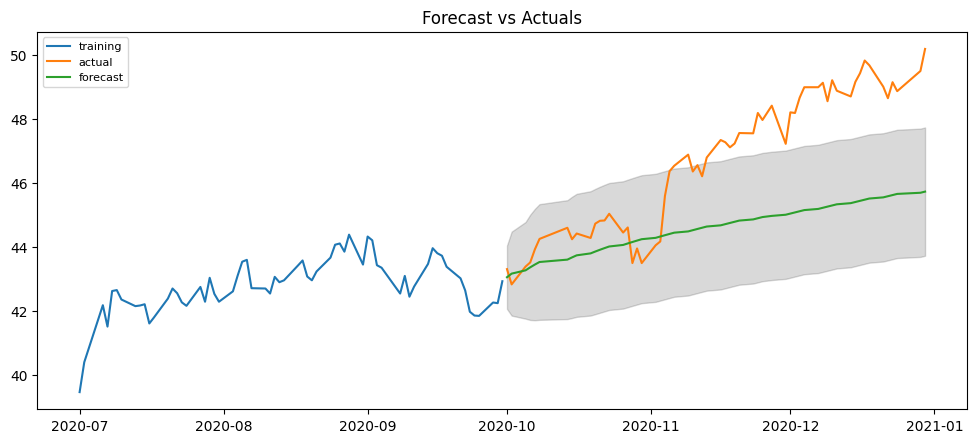

In [ ]:
# Build Model 
model = ARIMA(training_data, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(len(testing_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data['VWO'], label='training')
plt.plot(test_data['VWO'], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(actual,forecast):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-testing_data)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(testing_data,fc)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  of the autocorrelation function results.


{'acf1': 0.9132335685935218,
 'corr': 0.9476940420114127,
 'mae': 2.1555634748427135,
 'mape': 0.04492715863666892,
 'me': -2.0751111399113125,
 'minmax': 0.0449161877723393,
 'mpe': -0.043079315664163696,
 'rmse': 2.5548421690390444}

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=81.448, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=83.721, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=82.467, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=83.539, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=85.138, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=81.505, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=80.118, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=79.917, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=78.657, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=82.091, Time=0.05 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 1.275 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   59
Model:               

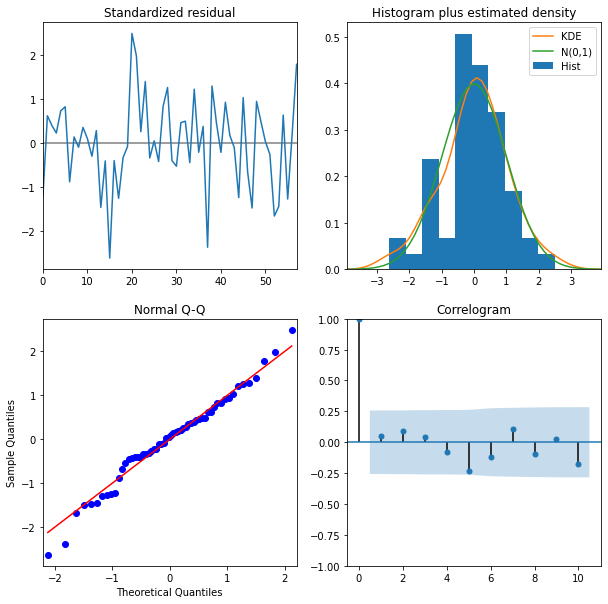

In [ ]:
#Stepwise ARIMA and diagnosis of residuals
model = pm.auto_arima(testing_data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

model.plot_diagnostics(figsize=(10,10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.55, hspace=.55)
plt.show()

In [ ]:
#Fit the model and create the forecast for Q3 on step at a time
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(0,1,3))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = testing_data[time_point]
    history.append(true_test_value)
#MSE_error = mean_squared_error(testing_data, model_predictions)
#print('Testing Mean Squared Error is {}'.format(MSE_error))


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
#Accuracy and error metrics
model_predictions=np.array([np.array(xi) for xi in model_predictions])
model_predictions=model_predictions.reshape((len(model_predictions),))
forecast_accuracy(testing_data,model_predictions)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  of the autocorrelation function results.


{'acf1': 0.9132335685935218,
 'corr': 0.9775123423701177,
 'mae': 0.37022628998640866,
 'mape': 0.007944600890530777,
 'me': -0.04631721931565838,
 'minmax': 0.007898740062571075,
 'mpe': -0.0009606910546851212,
 'rmse': 0.46078508379468613}

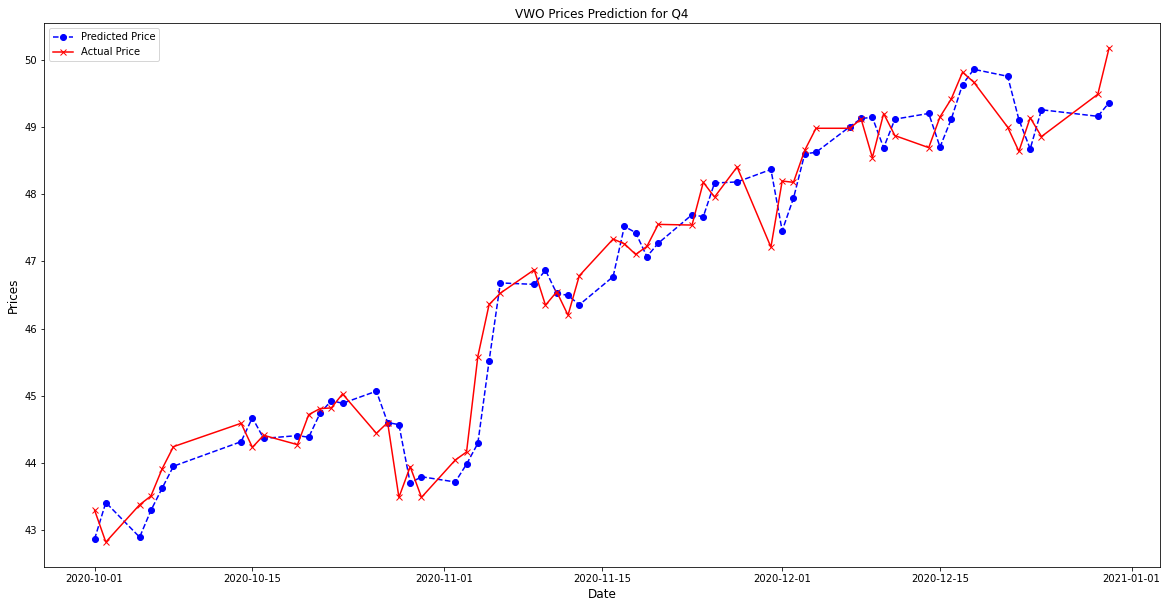

In [ ]:
#Plot of predicted price vs actual, one step at a time
test_set_range = Q4_df.index

plt.figure(figsize=(20,10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, testing_data, color='red', marker='x',label='Actual Price')
plt.title('VWO Prices Prediction for Q4')
plt.xlabel('Date',size = 12)
plt.ylabel('Prices',size = 12)
plt.legend()
plt.show()

###5.6 The second strategy needs to include some form of GARCH.

The strategy we’re going to be investigating is essentially what I’ve seen referred to as VRP–the Volatility Risk Premium in Tony Cooper’s seminal paper, Easy Volatility Investing. 
 
"The idea of the VRP is that we compare some measure of realized volatility (EG running standard deviation, GARCH predictions from past data) to the VIX, which is an implied volatility (so, purely forward looking). The idea is that when realized volatility (past/current measured) is greater than future volatility, people are in a panic. Similarly, when implied volatility is greater than realized volatility, things are as they should be, and it should be feasible to harvest the volatility risk premium by shorting volatility (analogous to selling insurance).
The instruments we’ll be using for this are ZIV and VXZ. ZIV because SVXY is no longer supported on InteractiveBrokers or RobinHood, and then VXZ is its long volatility counterpart.
We’ll be using close-to-close returns; that is, get the signal on Monday morning, and transact on Monday’s close, rather than observe data on Friday’s close, and transact around that time period as well(also known as magical thinking, according to Brian Peterson)." [Cooper, seminal paper, Easy Volatility Investing, 2013]

In [ ]:
 %load_ext rpy2.ipython

#### Load the dependencies

In [ ]:
%%R
install.packages('quantmod')
install.packages('rugarch')
install.packages('TTR')
install.packages('PerformanceAnalytics')
install.packages('tidyquant')
install.packages('timetk')
library(tidyquant)
library(timetk)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/quantmod_0.4.18.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 154512 bytes (150 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr


Error in library(tidyquant) : there is no package called ‘tidyquant’


#### The Models: Category 1 with GARCH

In [ ]:
%%R
# Category 1 Model:
# With GARCH
require(rugarch)
require(quantmod)
require(TTR)
require(PerformanceAnalytics)
 
# get VWO data from Yahoo 
loadSymbols("VWO", from = '2020-04-01', to = '2020-09-30')
 
eqtRets = na.omit(Return.calculate(Ad(VWO)))
 
# GJR garch with AR1 innovations under a skewed student T distribution for returns
gjrSpec = ugarchspec(mean.model = list(armaOrder = c(1,0)),
                      variance.model = list(model = "gjrGARCH",
                                            variance.targeting = TRUE),
                      distribution.model = "sstd")
 
# Use Q2 (train) & Q3 (test) data rolling window of 92 days, refitting the model every 22 trading days
t1 = Sys.time()
garchroll = ugarchroll(gjrSpec, data = eqtRets, 
n.start = 92, refit.window = "moving", refit.every = 22)
t2 = Sys.time()
print(t2-t1)
 
# convert predictions to data frame
garchroll = as.data.frame(garchroll)
 
head(garchroll)

Time difference of 10.4898 secs
                     Mu      Sigma     Skew    Shape Shape(GIG)     Realized
2020-08-13 0.0008254055 0.01824117 1.286435 4.256518          0 -0.003881251
2020-08-14 0.0064282599 0.01844668 1.286435 4.256518          0  0.001375104
2020-08-17 0.0046024348 0.01863211 1.286435 4.256518          0  0.010757709
2020-08-18 0.0013433335 0.01898054 1.286435 4.256518          0  0.003623096
2020-08-19 0.0038215819 0.01925679 1.286435 4.256518          0 -0.011507162
2020-08-20 0.0090771637 0.01860452 1.286435 4.256518          0 -0.002739165


The salient quantity here is the Sigma quantity–that is, the prediction for daily volatility. This is the quantity that we want to compare against the VIX.

                             gjrGARCH     histVol         avg
Annualized Return          0.77620000  0.77620000  0.77620000
Annualized Std Dev         0.19060000  0.19060000  0.19060000
Annualized Sharpe (Rf=0%)  4.07200000  4.07200000  4.07200000
Worst Drawdown             0.04490603  0.04490603  0.04490603
Calmar Ratio              17.28498263 17.28498263 17.28498263
Ulcer Performance Index   40.69756520 40.69756520 40.69756520


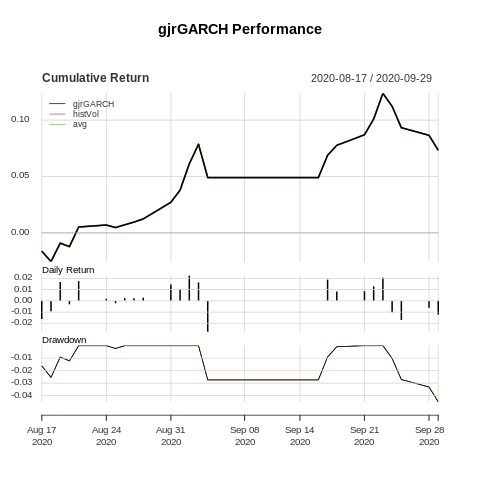

In [ ]:
%%R
 
#VIX:
 
loadSymbols('^VIX', from = '2020-01-01', to = '2020-12-31')
 
# convert GARCH sigma predictions to same scale as the VIX by annualizing, multiplying by 100
garchPreds = xts(garchroll$Sigma * sqrt(252) * 100, order.by=as.Date(rownames(garchroll)))
diff = garchPreds - Ad(VIX)
 
 
loadSymbols('ZIV', from = '2020-04-01', to = '2020-12-31')
loadSymbols('VXZ', from = '2020-04-01', to = '2020-12-31')
 
ZIVlong <- OHLC(ZIV) 
VXZlong <- OHLC(VXZ)
ziv <- ZIVlong %>% tk_xts()
vxz <- VXZlong %>% tk_xts()
 
zivRets = na.omit(Return.calculate(Cl(ziv)))
vxzRets = na.omit(Return.calculate(Cl(vxz)))
 
zivSig = diff < 0 
vxzSig = diff > 0 
 
garchOut = lag(zivSig, 2) * zivRets + lag(vxzSig, 2) * vxzRets
 
histEqt = runSD(eqtRets, n = 21, sample = FALSE) * sqrt(252) * 100
eqtDiff = histEqt - Ad(VIX)
 
zivSig = eqtDiff < 0 
zivSig = eqtDiff > 0 
 
eqtOut = lag(zivSig, 2) * zivRets + lag(vxzSig, 2) * vxzRets
 
avg = (garchOut + eqtOut)/2
compare = na.omit(cbind(garchOut, eqtOut, avg))
colnames(compare) = c("gjrGARCH", "histVol", "avg")
 
#With the following output:
stratStats <- function(rets) {
  stats <- rbind(table.AnnualizedReturns(rets), maxDrawdown(rets))
  stats[5,] = stats[1,]/stats[4,]
  stats[6,] = stats[1,]/UlcerIndex(rets)
  rownames(stats)[4] = "Worst Drawdown"
  rownames(stats)[5] = "Calmar Ratio"
  rownames(stats)[6] = "Ulcer Performance Index"
  return(stats)
}
 
charts.PerformanceSummary(compare)
stratStats(compare)

In [ ]:
%%R
# Q3 train & Q4 test
# get VWO data from Yahoo 
loadSymbols("VWO", from = '2020-07-01', to = '2020-12-31')
 
eqtRets2 = na.omit(Return.calculate(Ad(VWO)))
 
# GJR garch with AR1 innovations under a skewed student T distribution for returns
gjrSpec2 = ugarchspec(mean.model = list(armaOrder = c(1,0)),
                      variance.model = list(model = "gjrGARCH",
                                            variance.targeting = TRUE),
                      distribution.model = "sstd")
 
 
# Use Q3 (train) & Q4 (test) data rolling window of 92 days, refitting the model every 22 trading days
t1 = Sys.time()
garchroll2 = ugarchroll(gjrSpec2, data = eqtRets2, n.start = 93, refit.window = "moving", refit.every = 22)
t2 = Sys.time()
print(t2-t1)
 
# convert predictions to data frame
garchroll2 = as.data.frame(garchroll2)
 
head(garchroll2)

Time difference of 2.469255 secs
                     Mu      Sigma     Skew    Shape Shape(GIG)     Realized
2020-11-12 1.360301e-03 0.01108968 1.042317 59.99822          0 -0.007464272
2020-11-13 3.200425e-03 0.01068862 1.042317 59.99822          0  0.012677306
2020-11-16 4.553727e-05 0.01232953 1.042317 59.99822          0  0.011669826
2020-11-17 2.033444e-04 0.01311038 1.042317 59.99822          0 -0.001468094
2020-11-18 2.261210e-03 0.01149909 1.042317 59.99822          0 -0.003360647
2020-11-19 2.557651e-03 0.01105346 1.042317 59.99822          0  0.002528989


In [ ]:
 %%R
 
#VIX:
 
loadSymbols('^VIX', from = '2020-01-01', to = '2020-12-31')
 
# convert GARCH sigma predictions to same scale as the VIX by annualizing, multiplying by 100
garchPreds2 = xts(garchroll2$Sigma * sqrt(252) * 100, order.by=as.Date(rownames(garchroll2)))
diff2 = garchPreds2 - Ad(VIX)
 
loadSymbols('ZIV', from = '2020-07-01', to = '2020-12-31')
loadSymbols('VXZ', from = '2020-07-01', to = '2020-12-31')
 
ZIVlong2 <- OHLC(ZIV) 
VXZlong2 <- OHLC(VXZ)
ziv2 <- ZIVlong2 %>% tk_xts()
vxz2 <- VXZlong2 %>% tk_xts()
 
 
zivRets2 = na.omit(Return.calculate(Cl(ziv2)))
vxzRets2 = na.omit(Return.calculate(Cl(vxz2)))
 
zivSig2 = diff < 0
vxzSig2 = diff > 0
 
garchOut2 = lag(zivSig2, 2) * zivRets2 + lag(vxzSig2, 2) * vxzRets2
 
histEqt2 = runSD(eqtRets2, n = 21, sample = FALSE) * sqrt(252) * 100
eqtDiff2 = histEqt2 - Ad(VIX)
 
zivSig2 = eqtDiff2 < 0
zivSig2 = eqtDiff2 > 0
 
eqtOut2 = lag(zivSig2, 2) * zivRets2 + lag(vxzSig2, 2) * vxzRets2
 
avg2= (garchOut2 + eqtOut2)/2
compare2 = na.omit(cbind(garchOut2, eqtOut2, avg2))
colnames(compare2) = c("gjrGARCH", "histVol", "avg")
 
#With the following output:
stratStats <- function(rets2) {
  stats <- rbind(table.AnnualizedReturns(rets2), maxDrawdown(rets2))
  stats[5,] = stats[1,]/stats[4,]
  stats[6,] = stats[1,]/UlcerIndex(rets2)
  rownames(stats)[4] = "Worst Drawdown"
  rownames(stats)[5] = "Calmar Ratio"
  rownames(stats)[6] = "Ulcer Performance Index"
  return(stats)
}
 
charts.PerformanceSummary(compare2)
stratStats(compare2)

R[write to console]: Error in tk_xts(.) : could not find function "tk_xts"

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In .gjrgarchfit(spec = spec, data = data, out.sample = out.sample,  :
R[write to console]:  
ugarchfit-->waring: using less than 100 data
 points for estimation


R[write to console]: 2: 
R[write to console]: In .gjrgarchfit(spec = spec, data = data, out.sample = out.sample,  :
R[write to console]:  
ugarchfit-->waring: using less than 100 data
 points for estimation





Error in tk_xts(.) : could not find function "tk_xts"


In [ ]:
%%R
head(VXZlong)

           VXZ.Open VXZ.High VXZ.Low VXZ.Close
2020-04-01    33.01    35.01   32.58    34.740
2020-04-02    34.47    34.68   33.63    34.415
2020-04-03    34.00    34.65   33.63    33.930
2020-04-06    32.10    32.74   32.10    32.450
2020-04-07    32.05    32.94   31.75    32.816
2020-04-08    32.93    33.26   32.46    32.867


In [ ]:
%%R
head(ZIVlong)

           ZIV.Open ZIV.High ZIV.Low ZIV.Close
2020-04-01    32.35  32.6600 30.2000     30.45
2020-04-02    30.77  31.3800 30.4300     30.64
2020-04-03    30.96  31.3300 30.4000     31.08
2020-04-06    32.49  32.9000 32.0000     32.54
2020-04-07    33.13  33.1850 31.8100     31.81
2020-04-08    31.95  32.3122 31.5658     32.06


In [ ]:
%%R
head(VIX)

           VIX.Open VIX.High VIX.Low VIX.Close VIX.Volume VIX.Adjusted
2020-01-02    13.46    13.72   12.42     12.47          0        12.47
2020-01-03    15.01    16.20   13.13     14.02          0        14.02
2020-01-06    15.45    16.39   13.54     13.85          0        13.85
2020-01-07    13.84    14.46   13.39     13.79          0        13.79
2020-01-08    15.16    15.24   12.83     13.45          0        13.45
2020-01-09    12.95    13.24   12.53     12.54          0        12.54


###5.7 Which of the 2 models do you prefer? Explain your answer in quantitative terms.

The $ARMA$ model presented good backtesting for both Q3 and Q4 when tested with Q2 and Q3, respectively. Moreover, obtaining high accuracy and low error for both models. Nevertheless, we had to specify a different model for Q2 and Q4; we switched from an $ARIMA(1,1,0)$ in Q2 to an $ARIMA(0,1,3)$ in Q3. Given the amount of data we are using, we should not forecast entire quarters as we saw the confidence interval gets wider as we obtain more forecasts.
 
The GARCH model as a swing trader strategy with performance results worthy of discussing, such as the below: 
 
Annualized Return          0.77620000    
Annualized Std Dev         0.19060000 
 
Sharpe ratio is the measure of risk-adjusted return of a financial portfolio. A portfolio with a higher Sharpe ratio is considered superior relative to its peers. The measure was named after William F Sharpe, a Nobel laureate and professor of finance, emeritus at Stanford University.
 
Thus the Sharpe ratio is a measure of excess portfolio return over the risk-free rate relative to its standard deviation. Normally, the 90-day Treasury bill rate is taken as the proxy for risk-free rate: (Investopedia)   
Annualized Sharpe (Rf=0%)  4.07200000    
 
An acceptable Worst Drawdown of 0.04490603    
 
The Ulcer Index (UI) is a technical indicator that measures downside risk in terms of both the depth and duration of price declines. The index increases in value as the price moves farther away from a recent high and falls as the price rises to new highs. The indicator is usually calculated over a 14-day period, with the Ulcer Index showing the percentage drawdown a trader can expect from the high over that period.
The greater the value of the Ulcer Index, the longer it takes for a stock to get back to the former high. Simply stated, it is designed as one measure of volatility only on the downside. Ulcer Performance Index   40.69756520
 
The Calmar Ratio is a gauge of the performance of investment funds such as hedge funds and commodity trading advisors (CTAs). It is a function of the fund's average compounded annual rate of return versus its maximum drawdown.
Calmar Ratio 17.28498263

When forecasting the prices and rates of financial instruments, the GARCH method has a more realistic context than other models. Homoskedastic models, which presume constant variance and are used in simple ordinary least squares (OLS) analysis, are not the same as GARCH processes. The aim of OLS is to reduce the deviations between data points and the regression line used to match them. When it comes to asset returns, volatility appears to differ over time and is dependent on historical variation, leaving a homoskedastic model ineffective.

##6. Category 2 Models: 
###Just use 2 variables: the one you are trading, and an additional (called exogeneous variable) to enhance prediction
6.1 Use the same series as you did in the previous question
 
6.2 Use Q2 data for estimation, and Q3 data for evaluating performance.
 
6.3 Repeat, using Q3 data for estimation, and Q4 data for evaluating performance.
 
6.4 Build 3 trading strategies.  
 
6.5 The 1st strategy should include a form of VAR or VARMA.  
 
6.6 The 2nd strategy should include multivariate GARCH.  There are several possibilities.

6.7 The 3rd strategy should attempt to include cointegration. Note that if cointegration is not found, then justify the lack of existence for cointegration in quantitative terms. 
 
6.8 Now you have a total of 5 models (including 2 from the previous question). Which of the 5 models do you prefer? Explain in quantitative terms.

### Category 2: Strategy 1: EQUITY "VWO" vs S&P_500 an exogenous variable, with Above EMA Strategy in Python

In [ ]:
 pip install fix-yahoo-finance

In [ ]:
 pip install yfinance

In [ ]:
 %matplotlib inline
 
import os
import sys
import warnings
import yfinance as yf
from datetime import date
import pandas as pd
import pandas_datareader.data as web
import numpy as np
 
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
 
from numpy.linalg import LinAlgError
 
from scipy.stats import probplot, moment
from sklearn.metrics import mean_squared_error
 
 
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.tsa.api import VAR, VARMAX
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import probplot, moment
from sklearn.metrics import mean_squared_error, mean_absolute_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
 %matplotlib inline
warnings.filterwarnings('ignore')
sns.set(style='darkgrid', context='notebook', color_codes=True)

In [ ]:
# HELPER FUNCTION: CORRELOGRAM PLOT
 
def plot_correlogram(x, lags=None, title=None):    
    lags = min(10, int(len(x)/5)) if lags is None else lags
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
    x.plot(ax=axes[0][0])
    q_p = np.max(q_stat(acf(x, nlags=lags), len(x))[1])
    stats = f'Q-Stat: {np.max(q_p):>8.2f}\nADF: {adfuller(x)[1]:>11.2f}'
    axes[0][0].text(x=.02, y=.85, s=stats, transform=axes[0][0].transAxes)
    probplot(x, plot=axes[0][1])
    mean, var, skew, kurtosis = moment(x, moment=[1, 2, 3, 4])
    s = f'Mean: {mean:>12.2f}\nSD: {np.sqrt(var):>16.2f}\nSkew: {skew:12.2f}\nKurtosis:{kurtosis:9.2f}'
    axes[0][1].text(x=.02, y=.75, s=s, transform=axes[0][1].transAxes)
    plot_acf(x=x, lags=lags, zero=False, ax=axes[1][0])
    plot_pacf(x, lags=lags, zero=False, ax=axes[1][1])
    axes[1][0].set_xlabel('Lag')
    axes[1][1].set_xlabel('Lag')
    fig.suptitle(title, fontsize=20)
    fig.tight_layout()
    fig.subplots_adjust(top=.9)

In [ ]:
# HELPER FUNCTION: UNIT ROOT TEST:
def test_unit_root(df):
    return df.apply(lambda x: f'{pd.Series(adfuller(x)).iloc[1]:.2%}').to_frame('p-value')

In [ ]:
 
# THE DATA
sent = 'UMCSENT'
df = web.DataReader(['UMCSENT', 'IPGMFN'], 'fred', '1970', '2017-12').dropna()
df.columns = ['sentiment', 'ip']

In [ ]:
 
# GET THE DATA:
df_SPY = web.DataReader('SPY', 'yahoo', '2020-04', '2020-06').dropna()
df_SPY.info()
df_VWO = web.DataReader('VWO', 'yahoo', '2020-04', '2020-06').dropna()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2020-04-01 to 2020-06-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       42 non-null     float64
 1   Low        42 non-null     float64
 2   Open       42 non-null     float64
 3   Close      42 non-null     float64
 4   Volume     42 non-null     int64  
 5   Adj Close  42 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.3 KB


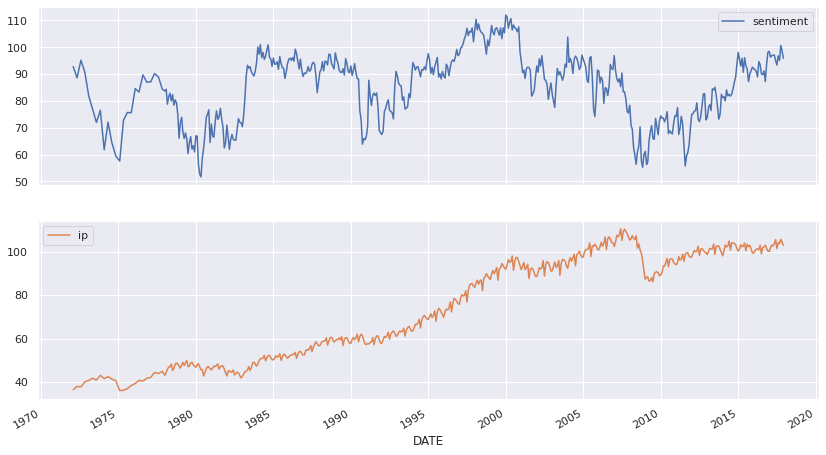

In [ ]:
 df.plot(subplots=True, figsize=(14,8));

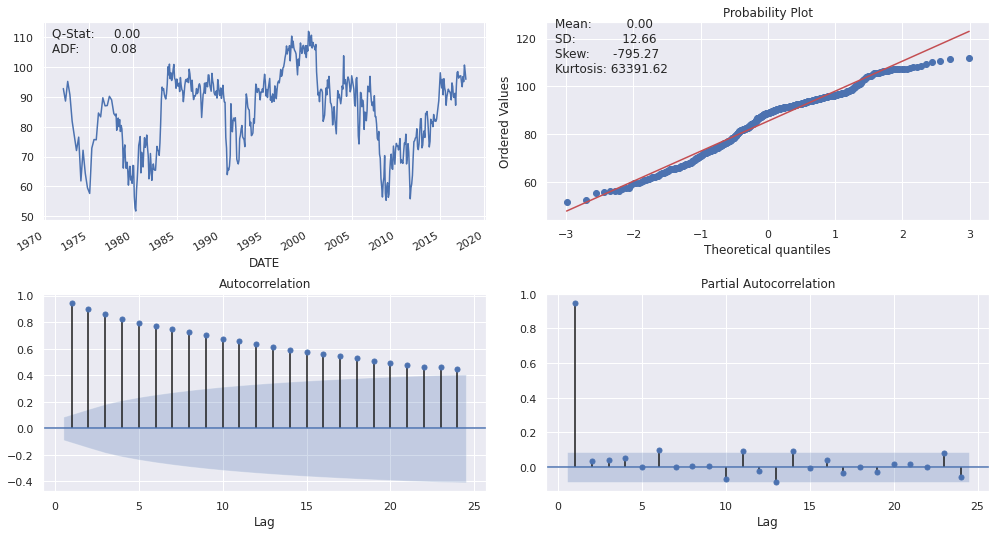

In [ ]:
 plot_correlogram(df.sentiment, lags=24)

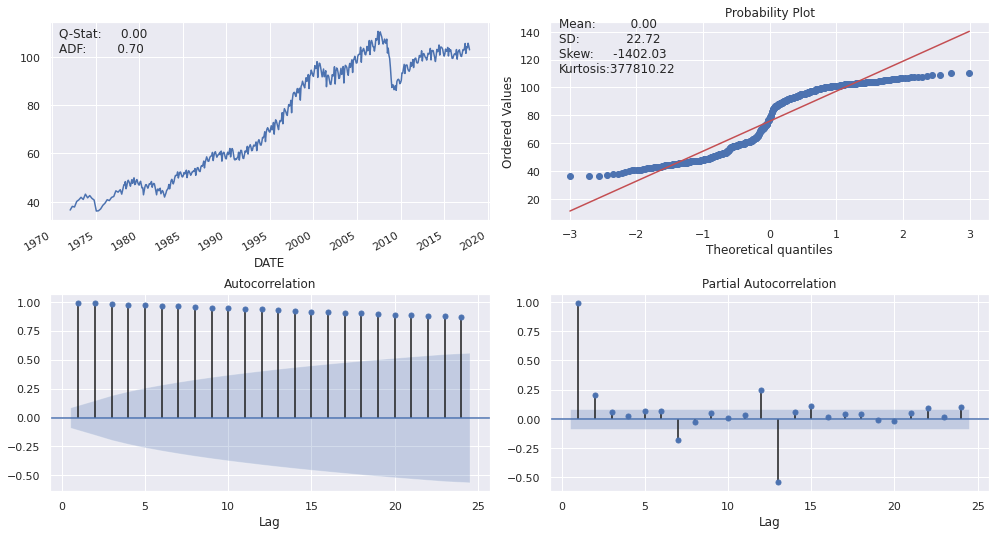

In [ ]:
 plot_correlogram(df.ip, lags=24)

In [ ]:
 
# Stationarity Transform
#Log-transforming the series and seasonal differencing using lag 12 of both series yields stationary results:
df_transformed = pd.DataFrame({'ip': np.log(df.ip).diff(12),
                              'sentiment': df.sentiment.diff(12)}).dropna()

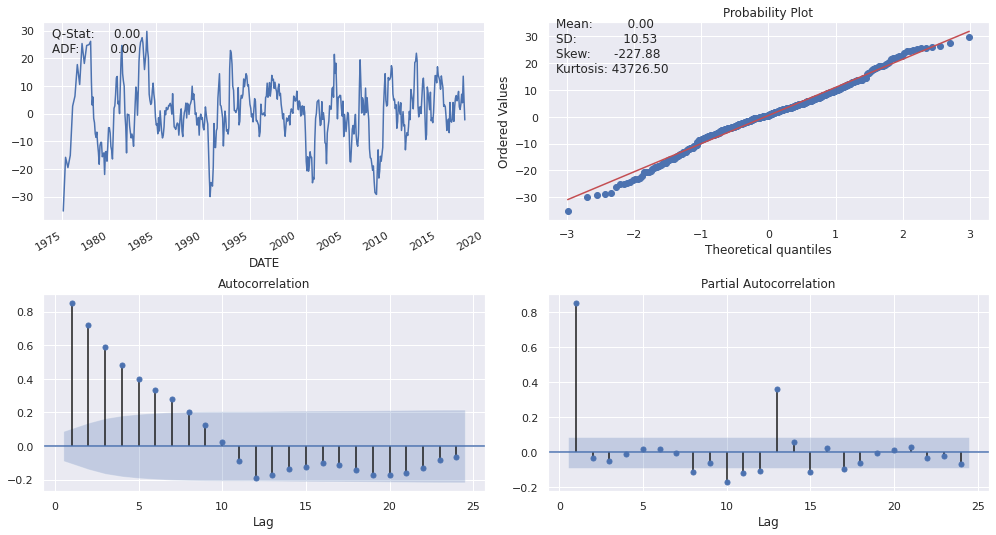

In [ ]:
 
# Inspect Correlograms¶
plot_correlogram(df_transformed.sentiment, lags=24)

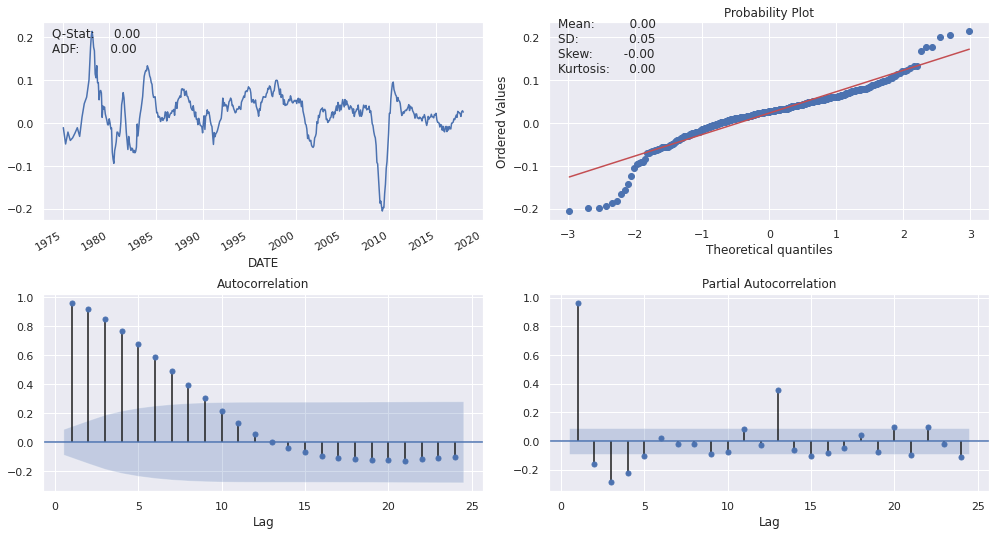

In [ ]:
 
 
plot_correlogram(df_transformed.ip, lags=24)

In [ ]:
 test_unit_root(df_transformed)

p-value
ip          0.03%
sentiment   0.00%

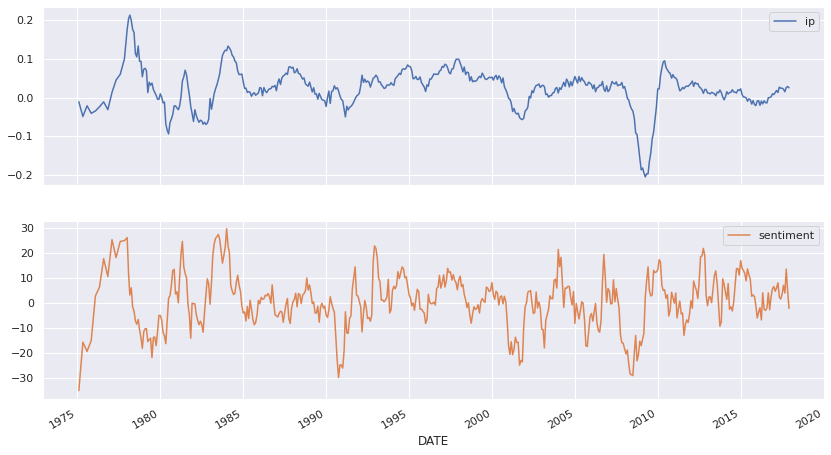

In [ ]:
 
 
df_transformed.plot(subplots=True, figsize=(14,8));

In [ ]:
 
#VAR Model¶
"""To limit the size of the output, we will just estimate a VAR(1) model using the statsmodels VARMAX implementation (which allows for optional exogenous variables) with a constant trend using the first 480 observations. 
The output contains the coefficients for both time series equations."""
model = VARMAX(df_transformed.iloc[:468], order=(1,1), trend='c').fit(maxiter=1000)
print(model.summary())

                            Statespace Model Results                           
Dep. Variable:     ['ip', 'sentiment']   No. Observations:                  468
Model:                      VARMA(1,1)   Log Likelihood                 -71.870
                           + intercept   AIC                            169.741
Date:                 Wed, 21 Apr 2021   BIC                            223.671
Time:                         08:10:10   HQIC                           190.962
Sample:                              0                                         
                                 - 468                                         
Covariance Type:                   opg                                         
Ljung-Box (Q):              127.93, 161.51   Jarque-Bera (JB):        128.70, 17.04
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.48, 1.10   Skew:                       0.19, 0.21
Prob(H) (two-sided):        

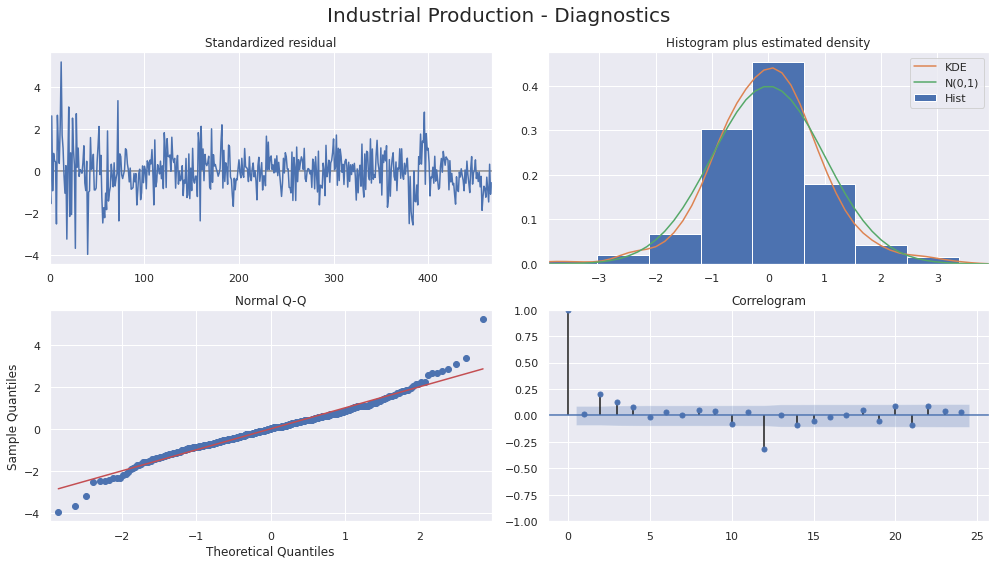

In [ ]:
# Plot Diagnostics
"""statsmodels provides diagnostic plots to check whether the residuals meet the white noise assumptions, which are not exactly met in this simple case:"""
model.plot_diagnostics(variable=0, figsize=(14,8), lags=24)
plt.gcf().suptitle('Industrial Production - Diagnostics', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=.9);

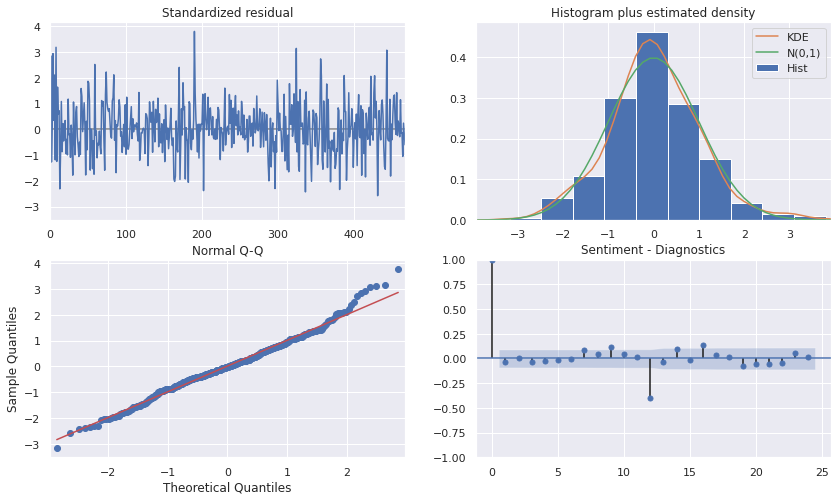

In [ ]:
 
 
model.plot_diagnostics(variable=1, figsize=(14,8), lags=24)
plt.title('Sentiment - Diagnostics');

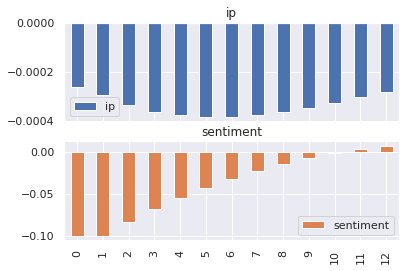

In [ ]:
# Impulse-Response Function
median_change = df_transformed.diff().quantile(.5).tolist()
model.impulse_responses(steps=12, impulse=median_change).plot.bar(subplots=True);

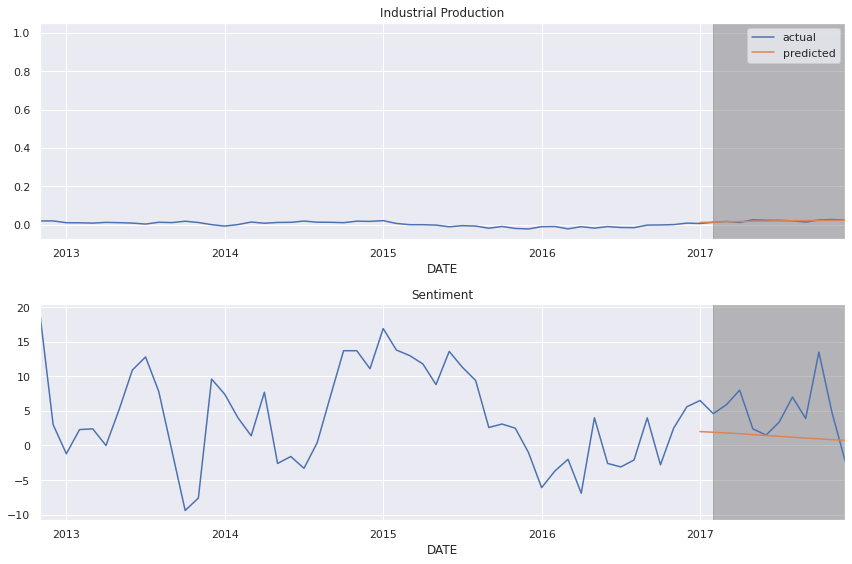

In [ ]:
 
# Generate Predictions
"""Out-of-sample predictions can be generated as follows:"""
 
start = 430
preds = model.predict(start=480, end=len(df_transformed)-1)
preds.index = df_transformed.index[480:]
 
fig, axes = plt.subplots(nrows=2, figsize=(12, 8))
 
df_transformed.ip.iloc[start:].plot(ax=axes[0], label='actual', title='Industrial Production')
preds.ip.plot(label='predicted', ax=axes[0])
trans = mtransforms.blended_transform_factory(axes[0].transData, axes[0].transAxes)
axes[0].legend()
axes[0].fill_between(x=df_transformed.index[481:], y1=0, y2=1, transform=trans, color='grey', alpha=.5)
 
trans = mtransforms.blended_transform_factory(axes[0].transData, axes[1].transAxes)
df_transformed.sentiment.iloc[start:].plot(ax=axes[1], label='actual', title='Sentiment')
preds.sentiment.plot(label='predicted', ax=axes[1])
axes[1].fill_between(x=df_transformed.index[481:], y1=0, y2=1, transform=trans, color='grey', alpha=.5)
fig.tight_layout();

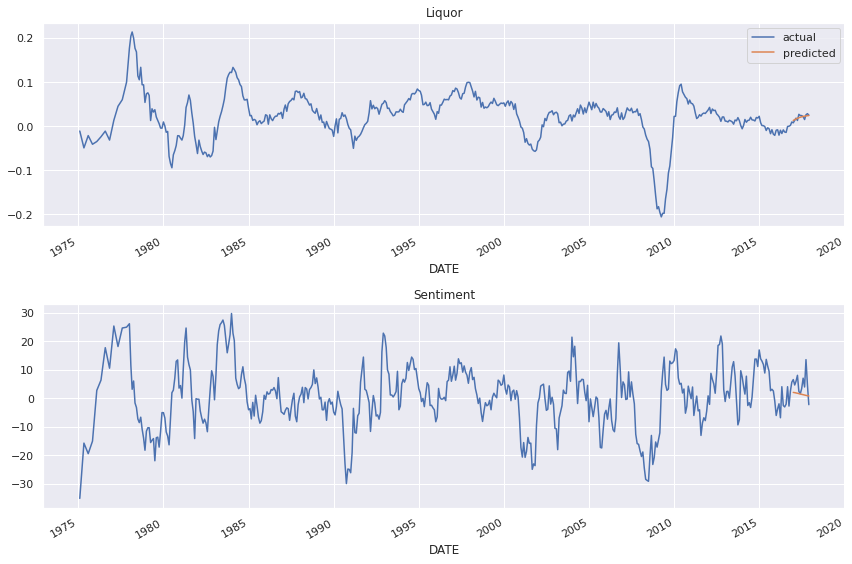

In [ ]:
 
#Out-of-sample forecasts
"""A visualization of actual and predicted values shows how the prediction 
lags the actual values and does not capture non-linear out-of-sample patterns well:"""
 
forecast = model.forecast(steps=24)
 
fig, axes = plt.subplots(nrows=2, figsize=(12, 8))
 
df_transformed.ip.plot(ax=axes[0], label='actual', title='Liquor')
preds.ip.plot(label='predicted', ax=axes[0])
axes[0].legend()
 
df_transformed.sentiment.plot(ax=axes[1], label='actual', title='Sentiment')
preds.sentiment.plot(label='predicted', ax=axes[1])
axes[1]
fig.tight_layout();

In [ ]:
mean_absolute_error(forecast, df_transformed.iloc[468:])

1.9798784346918605

#### Above EMA Strategy

In [ ]:
 
# Construct the signal
# Get price data by the stock ticker
#price_data = bt.get('spy', start='2020-1-1', end='2020-12-31')
# Calculate SMA
sma = spy_data.rolling(20).mean()
# Alternatively, use talib to calculate the indicator:
# Calculate SMA
#import talib
#sma1 = talib.SMA(spy_data, timeperiod=20)

NameError: ignored

In [ ]:
 
# Define a signal-based strategy
# Define the signal-based strategy
spy_bt_strategy = bt.Strategy('AboveEMA',[bt.algos.SelectWhere(spy_data > sma),
bt.algos.WeighEqually(),
bt.algos.Rebalance()])
#For simplicity, we assume:
#Trade one asset at a time
#No slippage or commissions

In [ ]:
 
# Backtest the signal based strategy
# Create the backtest and run it
spy_bt_backtest = bt.Backtest(spy_bt_strategy, spy_data)
spy_bt_result = bt.run(spy_bt_backtest)

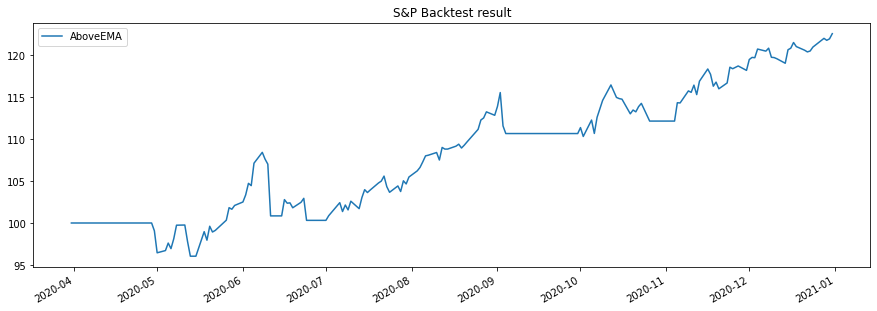

In [ ]:
 
# Plot the backtest result
spy_bt_result.plot(title='S&P Backtest result')

In [ ]:
spy_bt_result.stats

AboveEMA
start                  2020-03-31 00:00:00
end                    2020-12-31 00:00:00
rf                                       0
total_return                      0.225765
cagr                              0.310451
max_drawdown                     -0.074797
calmar                             4.15057
mtd                              0.0370456
three_month                       0.107632
six_month                         0.221921
ytd                               0.225765
one_year                               NaN
three_year                             NaN
five_year                              NaN
ten_year                               NaN
incep                             0.310451
daily_sharpe                       1.84548
daily_sortino                      2.73593
daily_mean                        0.280287
daily_vol                         0.151877
daily_skew                        -1.38812
daily_kurt                         8.28733
best_day                         0.0304543
worst_day                       -0.0576401
monthly_sharpe                     2.44398
monthly_sortino                    9.97103
monthly_mean                      0.280237
monthly_vol                       0.114664
monthly_skew                     -0.120771
monthly_kurt                       -1.5821
best_month                       0.0697772
worst_month                     -0.0192902
yearly_sharpe                          NaN
yearly_sortino                         NaN
yearly_mean                            NaN
yearly_vol                             NaN
yearly_skew                            NaN
yearly_kurt                            NaN
best_year                              NaN
worst_year                             NaN
avg_drawdown                    -0.0155893
avg_drawdown_days                  11.8235
avg_up_month                     0.0426975
avg_down_month                  -0.0153356
win_year_perc                          NaN
twelve_month_win_perc                  NaN

#### MA Crossover Strategy

MA crossover strategy: Trend following strategy.
 
Two EMA crossover:
 
Long signal: the short-term EMA crosses above the long-term EMA
 
Short signal: the short-term EMA 
crosses below the long-term EMA

In [ ]:
 
 
# Calculate the indicators
EMA_short = spy_data.rolling(10).mean()
EMA_long = spy_data.rolling(40).mean()

In [ ]:
 
# Construct the signal
# Create the signal DataFrame
signal = EMA_long.copy()
signal[EMA_long.isnull()] = 0
# Construct the signal
signal[EMA_short > EMA_long] = 1
signal[EMA_short < EMA_long] = -1

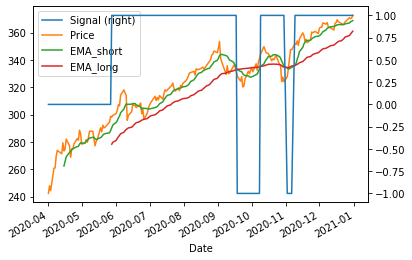

In [ ]:
 
 
# Plot the signal, price and MAs
combined_df = bt.merge(signal, spy_data, EMA_short, EMA_long)
combined_df.columns = ['Signal', 'Price', 'EMA_short','EMA_long']
combined_df.plot(secondary_y=['Signal'])

In [ ]:
 
# Define the strategy
bt_strategy = bt.Strategy('EMA_crossover',[bt.algos.WeighTarget(signal),bt.algos.Rebalance()])

In [ ]:
 
 
# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, spy_data)
bt_result = bt.run(bt_backtest)

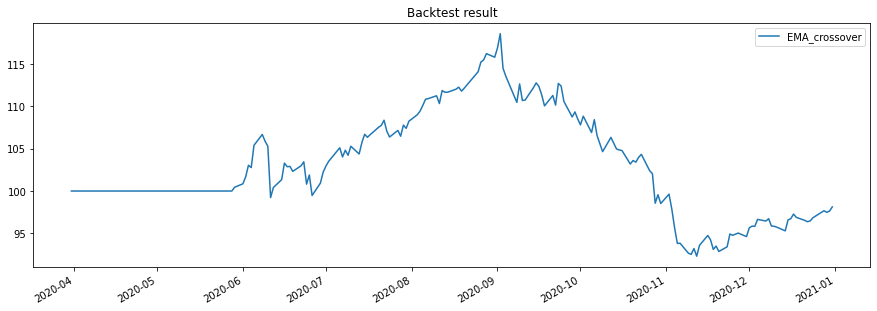

In [ ]:
 
# Plot the backcktest result
bt_result.plot(title='Backtest result')

In [ ]:
bt_result.stats

EMA_crossover
start                  2020-03-31 00:00:00
end                    2020-12-31 00:00:00
rf                                       0
total_return                    -0.0187847
cagr                            -0.0248723
max_drawdown                     -0.221599
calmar                            -0.11224
mtd                              0.0370482
three_month                     -0.0957185
six_month                        -0.040156
ytd                             -0.0187847
one_year                               NaN
three_year                             NaN
five_year                              NaN
ten_year                               NaN
incep                           -0.0248723
daily_sharpe                    -0.0674935
daily_sortino                   -0.0939343
daily_mean                      -0.0111968
daily_vol                         0.165895
daily_skew                        -1.34282
daily_kurt                         5.22223
best_day                         0.0256251
worst_day                       -0.0576393
monthly_sharpe                  -0.0473383
monthly_sortino                 -0.0741665
monthly_mean                   -0.00898995
monthly_vol                       0.189909
monthly_skew                     -0.425807
monthly_kurt                     -0.828811
best_month                       0.0697854
worst_month                     -0.0920124
yearly_sharpe                          NaN
yearly_sortino                         NaN
yearly_mean                            NaN
yearly_vol                             NaN
yearly_skew                            NaN
yearly_kurt                            NaN
best_year                              NaN
worst_year                             NaN
avg_drawdown                      -0.03706
avg_drawdown_days                  19.8889
avg_up_month                     0.0375804
avg_down_month                  -0.0486611
win_year_perc                          NaN
twelve_month_win_perc                  NaN

### Category 2: Strategy 2: MGARCH EQUITY "VWO" vs SPY in Python

####R Code

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
!apt-get -qq install -y libgmp-dev

Selecting previously unselected package libgmpxx4ldbl:amd64.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack .../libgmpxx4ldbl_2%3a6.1.2+dfsg-2_amd64.deb ...
Unpacking libgmpxx4ldbl:amd64 (2:6.1.2+dfsg-2) ...
Selecting previously unselected package libgmp-dev:amd64.
Preparing to unpack .../libgmp-dev_2%3a6.1.2+dfsg-2_amd64.deb ...
Unpacking libgmp-dev:amd64 (2:6.1.2+dfsg-2) ...
Setting up libgmpxx4ldbl:amd64 (2:6.1.2+dfsg-2) ...
Setting up libgmp-dev:amd64 (2:6.1.2+dfsg-2) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
%%R
install.packages("rmgarch") 
library(rmgarch)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘Rmpfr’, ‘Bessel’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/Rmpfr_0.8-4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 643375 bytes (628 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w


Error in library(rmgarch) : there is no package called ‘rmgarch’


In [ ]:
%%R
install.packages('fPortfolio') 
library(fPortfolio)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘gsl’, ‘energy’, ‘fAssets’, ‘Rglpk’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/gsl_2.1-6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 189794 bytes (185 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to


Error in library(fPortfolio) : there is no package called ‘fPortfolio’


In [ ]:
%%R
install.packages('quantmod')
install.packages('ggplot2')
install.packages('grid')
install.packages('tidyverse')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/quantmod_0.4.18.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 154512 bytes (150 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [ ]:
%%R
library(parallel)
library(quantmod)
library(ggplot2)
library(grid)
library(tidyverse)
library(ggplot2)

R[write to console]: Error in library(fPortfolio) : there is no package called ‘fPortfolio’

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In install.packages("fPortfolio") :
R[write to console]: 
 
R[write to console]:  installation of package ‘gsl’ had non-zero exit status

R[write to console]: 2: 
R[write to console]: In install.packages("fPortfolio") :
R[write to console]: 
 
R[write to console]:  installation of package ‘Rglpk’ had non-zero exit status

R[write to console]: 3: 
R[write to console]: In install.packages("fPortfolio") :
R[write to console]: 
 
R[write to console]:  installation of package ‘energy’ had non-zero exit status

R[write to console]: 4: 
R[write to console]: In install.packages("fPortfolio") :
R[write to console]: 
 
R[write to console]:  installation of package ‘fAssets’ had non-zero exit status

R[write to console]: 5: 
R[write to console]: In install.packages("fPortfolio") :
R[wri


Error in library(fPortfolio) : there is no package called ‘fPortfolio’


In [ ]:
%%R
#Create a dataframe with the assets
symbols <- c("SPY","VWO")

dataEnv <- new.env()
loadSymbols(symbols, from="2020-01-01", to="2020-12-31", env=dataEnv)
plist <- eapply(dataEnv, Ad)
df <- na.omit(do.call(merge, plist))

#Create the returns of the assets
df$VWO.Return <- diff(log(df$VWO.Adjusted))
df$SPY.Return <- diff(log(df$SPY.Adjusted))

#Drop NAs in returns
df <- na.omit(df)

#Create a df just with the returns
df_returs<-df[, c("SPY.Return", "VWO.Return")]

Q1_2_df_returns <- df_returs['2020-01-01/2020-06-30']
Q3_df_returns <- df_returs['2020-07-01/2020-09-30']
Q2_3_df_returns <- df_returs['2020-04-01/2020-09-30']
Q4_df_returns <- df_returs['2020-10-01/2020-12-31']

R[write to console]: Error in loadSymbols(symbols, from = "2020-01-01", to = "2020-12-31",  : 
  could not find function "loadSymbols"




Error in loadSymbols(symbols, from = "2020-01-01", to = "2020-12-31",  : 
  could not find function "loadSymbols"


######Q1 and Q2 data for estimation, and Q3 data for evaluating performance

In [ ]:
%%R
train_data <- as.timeSeries(Q1_2_df_returns)
test_data <- as.timeSeries(Q3_df_returns)
dates <- as.Date(row.names(train_data))

plot(train_data,type='l',main = "Q1 & Q2 SPY & VWO Returns",xlab = "Date",
     ylab = "Return")
plot(dates,train_data$SPY.Return,type='l',main = "Q1 & Q2 SPY Returns",xlab = "Date",
     ylab = "Return")
plot(dates,train_data$VWO.Return,type='l',main = "Q1 & Q2 VWO Returns",xlab = "Date",
     ylab = "Return")

dim(train_data)

xspec = ugarchspec(mean.model = list(armaOrder = c(1, 1),include.mean=F), 
                   variance.model = list(garchOrder = c(1,1),model = 'sGARCH'))
uspec = multispec(replicate(2, xspec))
spec = dccspec(uspec = uspec, dccOrder = c(1, 1), distribution = 'mvt')

cl = makePSOCKcluster(2)
DCC_GARCH_1_1 = dccfit(spec, data = train_data, cluster = cl)
print(DCC_GARCH_1_1) 

AICdcc<-infocriteria(DCC_GARCH_1_1)
print(AICdcc)

H=DCC_GARCH_1_1@mfit$H #Dynamic covariance matrix in time
R=DCC_GARCH_1_1@mfit$R #Dynamic correlation in time

In [ ]:
%%R
#Plot for the dynamic covariance in time
DCC_cov<-(DCC_GARCH_1_1@mfit$H[1:1,2:2,])
plot(dates,DCC_cov,type='l',main="Q1 & Q2 Conditional Covariance",xlab = "Date",ylab = "Covariance")

#Plot for the dynamic sigma of SPY in time
DCC_sigma_SPY<-sqrt((DCC_GARCH_1_1@mfit$H[1:1,1:1,]))
plot(dates,abs(train_data$SPY.Return),type='l',main="Q1 & Q2 Conditional Sigma & |SPY Return|",xlab = "Date", ylab = "Return")
lines(dates,DCC_sigma_SPY,type='l',col="red")

#Plot for the dynamic sigma of VWO in time
DCC_sigma_VWO<-sqrt((DCC_GARCH_1_1@mfit$H[2:2,2:2,]))
plot(dates,abs(train_data$VWO.Return),type='l',main=" Q1 & Q2 Conditional Sigma & |VWO Return|",xlab = "Date", ylab = "Return")
lines(dates,DCC_sigma_VWO,type='l',col="red")

#Plot for the correlation of SPY and VWO in time
DCC_corr<-(DCC_GARCH_1_1@mfit$R[2:2,1:1,])
plot(dates,DCC_corr,type='l',main=" Q1 & Q2 Conditional correlation SPY & VWO",xlab = "Date", ylab = "Return")

#Plot for the dynamic correlation in time
DCC_corr=vector(length=dim(train_data)[1])
for(i in 1:dim(train_data)[1]){
  DCC_corr[i] =  H[1,2,i]/sqrt(H[1,1,i]*H[2,2,i])
}

plot(dates,DCC_corr,type='l',main="Q1 & Q2 Conditional correlation SPY & VWO",xlab = "Date", ylab = "Correlation")

In [ ]:
%%R
#Forecast for period t+1
fc<-(dccforecast(DCC_GARCH_1_1))
fc

fc_cov<-matrix(fc@mforecast$H[[1]],nrow=2)
fc_cov

fc_corr<-matrix(fc@mforecast$R[[1]],nrow=2)
fc_corr

#Forecast n periods ahead
fc<-(dccforecast(DCC_GARCH_1_1,n.ahead=nrow(test_data)))

In [ ]:
%%R
#Rolling MGARCH
history=train_data
N_test_observations = nrow(test_data)

#Declare empty cubes with the size of test set for results
fc_cov <-array(numeric(),c(2,2,N_test_observations))
fc_corr <-array(numeric(),c(2,2,N_test_observations))

cl = makePSOCKcluster(2)
xspec = ugarchspec(mean.model = list(armaOrder = c(1, 1),include.mean=F), variance.model = list(garchOrder = c(1,1),model = 'sGARCH'))
uspec = multispec(replicate(2, xspec))
spec = dccspec(uspec = uspec, dccOrder = c(1, 1), distribution = 'mvt')

for (time_point in 1:N_test_observations) {
  
  DCC_GARCH_1_1 = dccfit(spec, data = history, cluster = cl)
  fc<-(dccforecast(DCC_GARCH_1_1))
  
  fc_cov_1<-matrix(fc@mforecast$H[[1]],nrow=2)
  fc_corr_1<-matrix(fc@mforecast$R[[1]],nrow=2)
  
  fc_cov[,,time_point] <- fc_cov_1
  fc_corr[,,time_point] <- fc_corr_1
  
  history<-rbind(history,test_data[time_point,])
  history<-history[2:nrow(history),] # We create a rolling model with the same amount of data points to train
}

stopCluster(cl)

In [ ]:
%%R
dates <- as.Date(row.names(test_data))
plot(dates,fc_corr[2,1,],type="l",main='Q3 Conditional Correlation of SPY vs VWO',xlab = "Date", ylab = "Correlation")
plot(dates,fc_cov[2,1,],type="l",main=' Q3 Conditional Covariance of SPY vs VWO',xlab = "Date", ylab = "Covariance")

plot(dates,abs(test_data$VWO.Return),type='l',col = "black",main=" Q3 Conditional Sigma & |SPY Return|",xlab = "Date", ylab = "Return")
lines(dates,sqrt(fc_cov[1,1,]),type="l",col="red")
legend("topright", legend = c("SPY", "Sigma"),col=1:2,lty = 1)

plot(dates,abs(test_data$VWO.Return),type='l',col = "black",main="Q3 Conditional Sigma & |VWO Return|",xlab = "Date", ylab = "Return")
lines(dates,sqrt(fc_cov[2,2,]),type="l",col="red")
legend("topright", legend = c("VWO", "Sigma"),col=1:2,lty = 1)

######Q2 and Q3 data for estimation, and Q4 data for evaluating performance

In [ ]:
%%R
#Split train and test dataset
train_data <- as.timeSeries(Q2_3_df_returns)
test_data <- as.timeSeries(Q4_df_returns)
dates <- as.Date(row.names(train_data))

plot(train_data,type='l',main = "SPY & VWO Returns",xlab = "Date",
     ylab = "Return")
plot(dates,train_data$SPY.Return,type='l',main = "SPY Returns",xlab = "Date",
     ylab = "Return")
plot(dates,train_data$VWO.Return,type='l',main = "VWO Returns",xlab = "Date",
     ylab = "Return")

dim(train_data)

xspec = ugarchspec(mean.model = list(armaOrder = c(1, 1),include.mean=F), 
                   variance.model = list(garchOrder = c(1,1),model = 'sGARCH'))
uspec = multispec(replicate(2, xspec))
spec = dccspec(uspec = uspec, dccOrder = c(1, 1), distribution = 'mvt')

cl = makePSOCKcluster(2)
DCC_GARCH_1_1 = dccfit(spec, data = train_data, cluster = cl)
print(DCC_GARCH_1_1) 

AICdcc<-infocriteria(DCC_GARCH_1_1)
print(AICdcc)

H=DCC_GARCH_1_1@mfit$H #Dynamic correlation in time
R=DCC_GARCH_1_1@mfit$R #Dynamic covariance matrix in time

In [ ]:
%%R
#Plot for the dynamic covariance in time
DCC_cov<-(DCC_GARCH_1_1@mfit$H[1:1,2:2,])
plot(dates,DCC_cov,type='l',main="Q2 & Q3 Conditional Covariance",xlab = "Date",ylab = "Covariance")

#Plot for the dynamic sigma of SPY in time
DCC_sigma_SPY<-sqrt((DCC_GARCH_1_1@mfit$H[1:1,1:1,]))
plot(dates,abs(train_data$SPY.Return),type='l',col="black",main="Q2 & Q3 Conditional Sigma & |SPY Return|",xlab = "Date", ylab = "Return")
lines(dates,DCC_sigma_SPY,type='l',col="red")
legend("topright", legend = c("SPY", "Sigma"),col=1:2,lty = 1)

#Plot for the dynamic sigma of VWO in time
DCC_sigma_VWO<-sqrt((DCC_GARCH_1_1@mfit$H[2:2,2:2,]))
plot(dates,abs(train_data$VWO.Return),type='l',col="black",main="Q2 & Q3 Conditional Sigma & |VWO Return|",xlab = "Date", ylab = "Return")
lines(dates,DCC_sigma_VWO,type='l',col="red")
legend("topright", legend = c("VWO", "Sigma"),col=1:2,lty = 1)

#Plot for the correlation of SPY and VWO in time
DCC_corr<-(DCC_GARCH_1_1@mfit$R[2:2,1:1,])
plot(dates,DCC_corr,type='l',main="Q2 & Q3 Conditional correlation SPY & VWO",xlab = "Date", ylab = "Return")

#Plot for the dynamic correlation in time
DCC_corr=vector(length=dim(train_data)[1])
for(i in 1:dim(train_data)[1]){
  DCC_corr[i] =  H[1,2,i]/sqrt(H[1,1,i]*H[2,2,i])
}

plot(dates,DCC_corr,type='l',main="Q2 & Q3 Conditional correlation SPY & VWO",xlab = "Date", ylab = "Correlation")

In [ ]:
%%R
#Forecast for period t+1
fc<-(dccforecast(DCC_GARCH_1_1))
fc

fc_cov<-matrix(fc@mforecast$H[[1]],nrow=2)
fc_cov

fc_corr<-matrix(fc@mforecast$R[[1]],nrow=2)
fc_corr

#Forecast n periods ahead
fc<-(dccforecast(DCC_GARCH_1_1,n.ahead=nrow(test_data)))

In [ ]:
%%R
#Rolling MGARCH 
history=train_data
N_test_observations = nrow(test_data)

#Declare empty cubes with the size of test set for results
fc_cov <-array(numeric(),c(2,2,N_test_observations))
fc_corr <-array(numeric(),c(2,2,N_test_observations))

cl = makePSOCKcluster(2)
xspec = ugarchspec(mean.model = list(armaOrder = c(1, 1),include.mean=F), variance.model = list(garchOrder = c(1,1),model = 'sGARCH'))
uspec = multispec(replicate(2, xspec))
spec = dccspec(uspec = uspec, dccOrder = c(1, 1), distribution = 'mvt')

for (time_point in 1:N_test_observations) {
  
  DCC_GARCH_1_1 = dccfit(spec, data = history, cluster = cl)
  fc<-(dccforecast(DCC_GARCH_1_1))
  
  fc_cov_1<-matrix(fc@mforecast$H[[1]],nrow=2)
  fc_corr_1<-matrix(fc@mforecast$R[[1]],nrow=2)
  
  fc_cov[,,time_point] <- fc_cov_1
  fc_corr[,,time_point] <- fc_corr_1
  
  history<-rbind(history,test_data[time_point,])
  history<-history[2:nrow(history),] # We create a rolling model with the same amount of data points to train
}

stopCluster(cl)

In [ ]:
%%R
#Plots of the rolling MGARCH
dates <- as.Date(row.names(test_data))
plot(dates,fc_corr[2,1,],type="l",main='Q4 Conditional Correlation of SPY vs VWO',xlab = "Date", ylab = "Correlation")
plot(dates,fc_cov[2,1,],type="l",main='Q4 Conditional Covariance of SPY vs VWO',xlab = "Date", ylab = "Covariance")

plot(dates,abs(test_data$VWO.Return),type='l',col = "black",main=" Q4 Conditional Sigma & |SPY Return|",xlab = "Date", ylab = "Return")
lines(dates,sqrt(fc_cov[1,1,]),type="l",col="red")
legend("topright", legend = c("SPY", "Sigma"),col=1:2,lty = 1)

plot(dates,abs(test_data$VWO.Return),type='l',col = "black",main="Q4 Conditional Sigma & |VWO Return|",xlab = "Date", ylab = "Return")
lines(dates,sqrt(fc_cov[2,2,]),type="l",col="red")
legend("topright", legend = c("VWO", "Sigma"),col=1:2,lty = 1)

We could not run this part in the notebook because Python 2.0 does not support some dependencies that our code needs. Please refer to the R document, where you can see our results correctly.

The MGARCH model behaves well with the training data for Q1&Q2, capturing the volatility on each proposed asset. For the base model in-sample Q1&Q2 we observed that the process coefficient parameters were $dcca1\approx 0$ and $dccb1=0.93$, which would imply the conditional correlation is declining over time and is asymptotic towards $(1-dccb1)/dccb1$.

For the valuation of Q3, the rolling MGARCH fitted sufficient. Moreover, what we observed in the base model about the conditional correlation reduction remains true for Q3. Concerning the rolling prediction of $\sigma$, both VWO and SPY adjust well. 

For the base model in-sample Q2&Q3 we observed again that the process coefficient parameters were $dcca1\approx 0$ and $dccb1=0.93$, which would imply the conditional correlation is declining over time and is asymptotic towards $(1-dccb1)/dccb1$. 

For the valuation of Q4, the rolling MGARCH fitted not as expected. The rolling $\sigma$ is not capturing the volatility shocks. On the other hand, what we observed in the base model about reducing the conditional correlation remains true for Q4.

In summary, this model helped us detect shocks in the volatility of both VWO and SPY. We need more historical information to validate our model correctly. Hower and general, the model also helps us know if we should sell or buy our asset during the next quarter effectively given the conditional correlation we estimated.







### Category 2: Strategy 3: The Cointegration Model with ANN (Neural Network)

In [ ]:
 
# Useful Functions
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

#### Cointegration Test I
 
Determine whether the following two assets gold and VWO were cointegrated during 2020 using the coint() function and a reasonable confidence level.

In [ ]:
from statsmodels.tsa.stattools import coint

In [ ]:
# download, create returns and 
ticker = ['VWO','GOLD.AX','BTC-USD']
df = yf.download(ticker,                    
                     start='2020-04-01',
                     end='2020-12-31',
                     progress=False)['Adj Close']
 
df.dropna(inplace = True)
 
df['VWO_daily_ret'] = np.log(df['VWO']).diff()
df['GOLD.AX_daily_ret'] = np.log(df['GOLD.AX']).diff()
df['BTC-USD_daily_ret'] = np.log(df['BTC-USD']).diff()
 
df.dropna(inplace = True)
 
Q2_df = df.loc['2020-04-01': '2020-06-30']
Q3_df = df.loc['2020-07-01' : '2020-09-30']
Q4_df = df.loc['2020-10-01' : '2020-12-31']

In [ ]:
#vwo = df[['Adj Close']]
gold = df[['Adj Close']]

In [ ]:
gold.head()

Adj Close           
               GOLD.AX        VWO
Date                             
2020-04-01  242.830002  31.677870
2020-04-02  245.309998  32.607845
2020-04-03  249.399994  31.981331
2020-04-06  251.440002  33.557396
2020-04-07  254.100006  33.753181

In [ ]:
vwo_q2 = df['VWO_daily_ret'].loc['2020-04':'2020-06']
gold_q2 = df['GOLD.AX_daily_ret'].loc['2020-04':'2020-06']
vwo_q3 = df['VWO_daily_ret'].loc['2020-07':'2020-09']
gold_q3 = df['GOLD.AX_daily_ret'].loc['2020-07':'2020-09']
vwo_q4 = df['VWO_daily_ret'].loc['2020-09':'2020-12']
gold_q4 = df['GOLD.AX_daily_ret'].loc['2020-09':'2020-12']

In [ ]:
stock_q2 = gold.loc['2020-04':'2020-06']
stock_q3 = gold.loc['2020-07':'2020-09']
stock_q4 = gold.loc['2020-09':'2020-12']

In [ ]:
gold_q3.tail()

Date
2020-09-24   -0.002635
2020-09-25    0.006515
2020-09-28   -0.004690
2020-09-29    0.007670
2020-09-30    0.000201
Name: GOLD.AX_daily_ret, dtype: float64

VWO and Gold are cointegrated
1.2162517628330785e-09


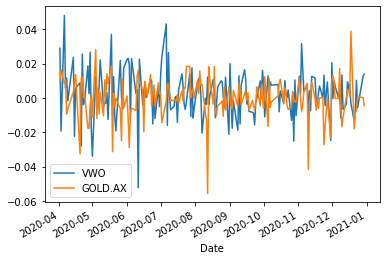

In [ ]:
 
 
#vwo = get_pricing('VWO', fields=['price'], 
#                        start_date='2015-01-01', end_date='2016-01-01')['price']
#gold = get_pricing('GOLD.AX', fields=['price'], 
#                        start_date='2015-01-01', end_date='2016-01-01')['price']
 
score, pvalue, _ = coint(vwo, gold)
 
confidence_level = 0.05
 
if pvalue < confidence_level:
    print ("VWO and Gold are cointegrated")
    print (pvalue)
else:
    print ("VWO and Gold are not cointegrated")
    print (pvalue)
 
vwo.name = "VWO"
gold.name = "GOLD.AX"
pd.concat([vwo, gold], axis=1).plot();

VWO and Gold are cointegrated
9.812351595538959e-19


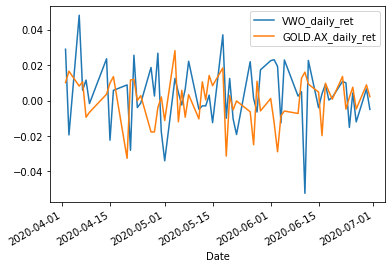

In [ ]:
 # CHECK HOW QUARTER 2 IS COINTEGRATED:
score, pvalue, _ = coint(vwo_q2, gold_q2)
 
confidence_level = 0.05
 
if pvalue < confidence_level:
    print ("VWO and Gold are cointegrated")
    print (pvalue)
else:
    print ("VWO and Gold are not cointegrated")
    print (pvalue)
 
vwo.name = "VWO"
gold.name = "GOLD.AX"
pd.concat([vwo_q2, gold_q2], axis=1).plot();

VWO and Gold are cointegrated
3.4767647297883532e-12


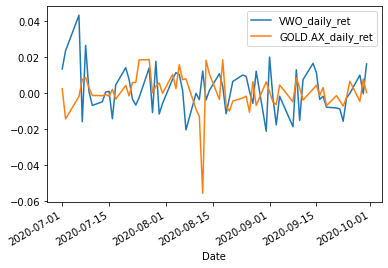

In [ ]:
 # CHECK HOW QUARTER 3 IS COINTEGRATED:
score, pvalue, _ = coint(vwo_q3, gold_q3)
 
confidence_level = 0.05
 
if pvalue < confidence_level:
    print ("VWO and Gold are cointegrated")
    print (pvalue)
else:
    print ("VWO and Gold are not cointegrated")
    print (pvalue)
 
vwo.name = "VWO"
gold.name = "GOLD.AX"
pd.concat([vwo_q3, gold_q3], axis=1).plot();

VWO and Gold are cointegrated
0.015225466287288922


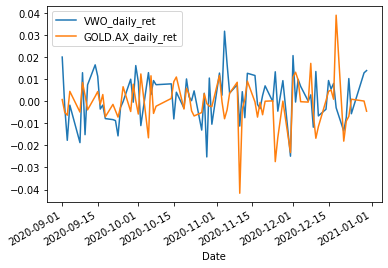

In [ ]:
# CHECK HOW QUARTER 4 IS COINTEGRATED:
score, pvalue, _ = coint(vwo_q4, gold_q4)
 
confidence_level = 0.05
 
if pvalue < confidence_level:
    print ("VWO and Gold are cointegrated")
    print (pvalue)
else:
    print ("VWO and Gold are not cointegrated")
    print (pvalue)
 
vwo.name = "VWO"
gold.name = "GOLD.AX"
pd.concat([vwo_q4, gold_q4], axis=1).plot();

#### Out of Sample Validation
 
a. Calculating the Spread
 
Using pricing data from quarters of 2020, construct a linear regression to find a coefficient for the linear combination of VWO and GOLD.AX that makes their spread stationary

#### QUARTERS 2 (train) 3 (test)

-0.02185857097853421
p-value for in-sample stationarity:  5.530657179447369e-13
Our p-value is greater than 0.05 so we conclude that this calculation of the spread is non-stationary in sample


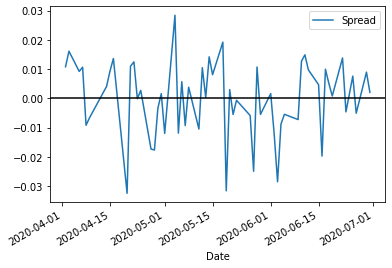

In [ ]:
 
S1 = vwo_q2
S2 = gold_q2
 
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
b = results.params["VWO_daily_ret"]
S1 = S1["VWO_daily_ret"]
 
print (b)
spread = S2 - b * S1
print ("p-value for in-sample stationarity: ", adfuller(spread)[1])
print ("Our p-value is greater than 0.05 so we conclude that this calculation of the spread is non-stationary in sample")# The p-value is less than 0.05 so we conclude that this spread calculation is stationary in sample
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);

#### b. Testing the Coefficient
 
Use your coefficient from part a to plot the weighted spread using returns from the third quarter of 2020, and check whether the result is still stationary.

p-value for spread stationarity:  9.996717079325423e-11
Our p-value is greater than 0.05 so we conclude that this calculation of the spread is non-stationary out of sample


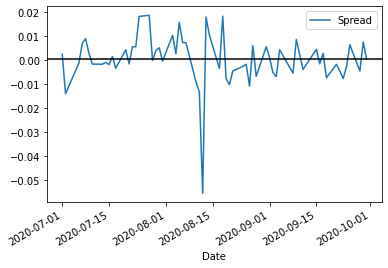

In [ ]:
S1_out = vwo_q3
S2_out = gold_q3
 
spread = S2_out - b * S1_out
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);
 
print ("p-value for spread stationarity: ", adfuller(spread)[1])
print ("Our p-value is greater than 0.05 so we conclude that this calculation of the spread is non-stationary out of sample")

#### Quarters 3 (train) & 4 (test)

a. Calculating the Spread

Using pricing data from quarter three, 2020, construct a linear regression to find a coefficient for the linear combination of VWO and GOLD.AX that makes their spread stationary

-0.040972342851342755
p-value for in-sample stationarity:  1.1311032336111375e-10
Our p-value is greater than 0.05 so we conclude that this calculation of the spread is non-stationary in sample


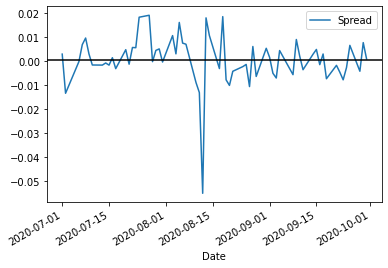

In [ ]:
 
S1 = vwo_q3
S2 = gold_q3
 
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
b = results.params["VWO_daily_ret"]
S1 = S1["VWO_daily_ret"]
 
print (b)
spread = S2 - b * S1
print ("p-value for in-sample stationarity: ", adfuller(spread)[1])
print ("Our p-value is greater than 0.05 so we conclude that this calculation of the spread is non-stationary in sample")# The p-value is less than 0.05 so we conclude that this spread calculation is stationary in sample
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);

 b. Testing the Coefficient
Use your coefficient from part a to plot the weighted spread using returns from the fourth quarter of 2020, and check whether the result is still stationary.

p-value for spread stationarity:  5.877709745403742e-16
Our p-value is greater than 0.05 so we conclude that this calculation of the spread is non-stationary out of sample


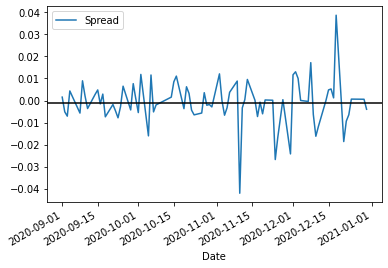

In [ ]:
S1_out = vwo_q4
S2_out = gold_q4
 
spread = S2_out - b * S1_out
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);
 
print ("p-value for spread stationarity: ", adfuller(spread)[1])
print ("Our p-value is greater than 0.05 so we conclude that this calculation of the spread is non-stationary out of sample")

#### More Technical Indicators

In [ ]:
 url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
!wget $url/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget $url/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib

(Reading database ... 161009 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
pip install ta

In [ ]:
import ta
from ta.utils import dropna
from ta.volatility import BollingerBands

#### Volatility Indicator: Bollinger Bands
 
Developed by John Bollinger
 
"Bollinger on Bollinger Bands"
 
Measure price volatility
 
Composed of three lines:
 
Middle band: n-period simple moving
average
 
Upper band: k-standard deviations above
the middle band
 
Lower band: k-standard deviations below the middle band
 
Bollinger Bands implications
 
The wider the bands, the more volatile the asset prices.
 
Measure whether a price is too high or too low on a relative basis:
 
Relatively high: price close to the upper band
 
Relatively low: price close to the lower band

In [ ]:
 # The Data
vwo_q2bb = df['VWO'].loc['2020-04':'2020-06']
gold_q2bb = df['GOLD.AX'].loc['2020-04':'2020-06']
vwo_q3bb = df['VWO'].loc['2020-07':'2020-09']
gold_q3bb = df['GOLD.AX'].loc['2020-07':'2020-09']
vwo_q4bb = df['VWO'].loc['2020-09':'2020-12']
gold_q4bb = df['GOLD.AX'].loc['2020-09':'2020-12']

#### Quarter 2 Bollinger Bands

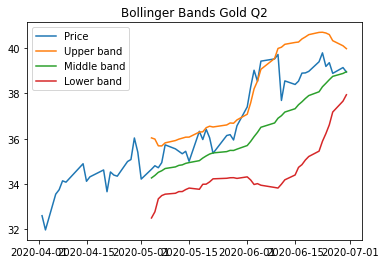

In [ ]:
# Define the Bollinger Bands - Equity Q2
upper, mid, lower = talib.BBANDS(vwo_q2bb,
nbdevup=2,
nbdevdn=2,
timeperiod=20)
 
# Plot the Bollinger Bands
plt.plot(vwo_q2bb, label='Price')
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Middle band')
plt.plot(lower, label='Lower band')
# Customize and show the plot
plt.title('Bollinger Bands Gold Q2')
plt.legend()
plt.show()

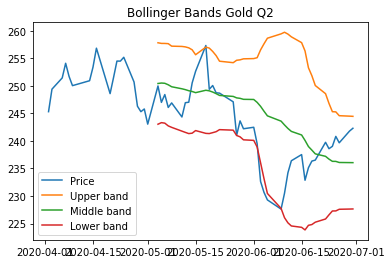

In [ ]:
 # Define the Bollinger Bands - Gold Q2
upper, mid, lower = talib.BBANDS(gold_q2bb,
nbdevup=2,
nbdevdn=2,
timeperiod=20)
 
# Plot the Bollinger Bands
plt.plot(gold_q2bb, label='Price')
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Middle band')
plt.plot(lower, label='Lower band')
# Customize and show the plot
plt.title('Bollinger Bands Gold Q2')
plt.legend()
plt.show()

#### Quarter 3 Bollinger Bands

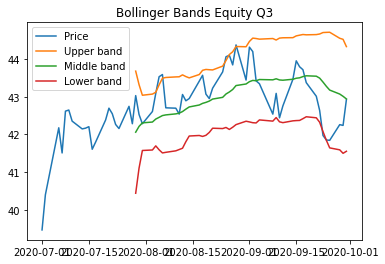

In [ ]:
 # Define the Bollinger Bands - Equity Q3
upper, mid, lower = talib.BBANDS(vwo_q3bb,
nbdevup=2,
nbdevdn=2,
timeperiod=20)
 
# Plot the Bollinger Bands
plt.plot(vwo_q3bb, label='Price')
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Middle band')
plt.plot(lower, label='Lower band')
# Customize and show the plot
plt.title('Bollinger Bands Equity Q3')
plt.legend()
plt.show()

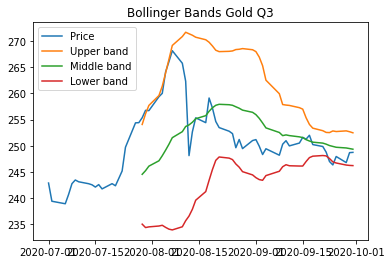

In [ ]:
 # Define the Bollinger Bands - Gold Q3
upper, mid, lower = talib.BBANDS(gold_q3bb,
nbdevup=2,
nbdevdn=2,
timeperiod=20)
 
# Plot the Bollinger Bands
plt.plot(gold_q3bb, label='Price')
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Middle band')
plt.plot(lower, label='Lower band')
# Customize and show the plot
plt.title('Bollinger Bands Gold Q3')
plt.legend()
plt.show()

#### Quarter 4 Bollinger Bands

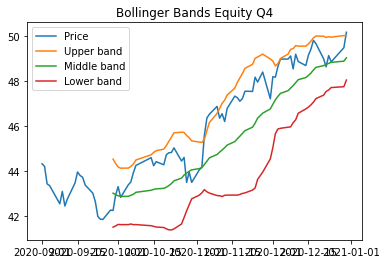

In [ ]:
 # Define the Bollinger Bands - Equity Q4
upper, mid, lower = talib.BBANDS(vwo_q4bb,
nbdevup=2,
nbdevdn=2,
timeperiod=20)
 
# Plot the Bollinger Bands
plt.plot(vwo_q4bb, label='Price')
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Middle band')
plt.plot(lower, label='Lower band')
# Customize and show the plot
plt.title('Bollinger Bands Equity Q4')
plt.legend()
plt.show()

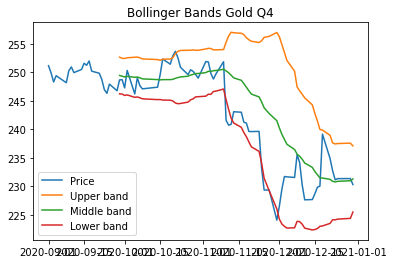

In [ ]:
 # Define the Bollinger Bands - Gold Q4
upper, mid, lower = talib.BBANDS(gold_q4bb,
nbdevup=2,
nbdevdn=2,
timeperiod=20)
 
# Plot the Bollinger Bands
plt.plot(gold_q4bb, label='Price')
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Middle band')
plt.plot(lower, label='Lower band')
# Customize and show the plot
plt.title('Bollinger Bands Gold Q4')
plt.legend()
plt.show()

#### Strength Indicator ADX:

Stands for "Average Directional Movement
Index"
 
Developed by J. Welles Wilder
 
"New Concepts in Technical Systems"
(1987)
 
Measures the strength of a trend
 
Oscillates between 0 and 100
 
ADX <= 25: no trend
 
ADX > 25: trending market
 
ADX > 50: strong trending market
 
How is ADX calculated?
 
Derived from the smoothed averages of the dierence between +DI and -DI
 
+DI (Plus Directional Index): quantify the presence of an uptrend
 
-DI (Minus Directional Index): quantify the presence of a downtrend
 
Calculation input:
high, low, and close prices of each

#### Data

In [ ]:
# The Data:
# download, create returns Equity 
ticker1 = ['VWO']
edf = yf.download(ticker1,                    
                     start='2020-04-01',
                     end='2020-12-31',
                     progress=False)
 
edf.dropna(inplace = True)
 
Q2_edf_adx = edf.loc['2020-04-01': '2020-06-30']
Q3_edf_adx = edf.loc['2020-07-01' : '2020-09-30']
Q4_edf_adx = edf.loc['2020-10-01' : '2020-12-31']
 
#download, create returns Gold
ticker2 = ['GOLD.AX']
gdf = yf.download(ticker2,                    
                     start='2020-04-01',
                     end='2020-12-31',
                     progress=False)
 
gdf.dropna(inplace = True)
 
 
Q2_gdf_adx = gdf.loc['2020-04-01': '2020-06-30']
Q3_gdf_adx = gdf.loc['2020-07-01' : '2020-09-30']
Q4_gdf_adx = gdf.loc['2020-10-01' : '2020-12-31']

In [ ]:
gdf1 = gdf['Adj Close']
gdf1.head()

Date
2020-04-01    242.830002
2020-04-02    245.309998
2020-04-03    249.399994
2020-04-06    251.440002
2020-04-07    254.100006
Name: Adj Close, dtype: float64

In [ ]:
Q2_edf_adx.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-04-01  32.700001  32.950001  32.259998  32.360001  31.677870  27389300
2020-04-02  32.869999  33.430000  32.730000  33.310001  32.607845  23383500
2020-04-03  33.240002  33.380001  32.500000  32.669998  31.981331  20830000
2020-04-06  33.840000  34.330002  33.730000  34.279999  33.557396  24480000
2020-04-07  35.480000  35.490002  34.410000  34.480000  33.753181  25931000

#### Quarter 2 ADX

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<bound method NDFrame.tail of                  Open       High        Low  ...  Adj Close    Volume        ADX
Date                                         ...                                
2020-04-01  32.700001  32.950001  32.259998  ...  31.677870  27389300        NaN
2020-04-02  32.869999  33.430000  32.730000  ...  32.607845  23383500        NaN
2020-04-03  33.240002  33.380001  32.500000  ...  31.981331  20830000        NaN
2020-04-06  33.840000  34.330002  33.730000  ...  33.557396  24480000        NaN
2020-04-07  35.480000  35.490002  34.410000  ...  33.753181  25931000        NaN
...               ...        ...        ...  ...        ...       ...        ...
2020-06-24  40.240002  40.360001  39.619999  ...  39.187111  11226800  27.282036
2020-06-25  39.799999  40.090000  39.639999  ...  39.354237   9676800  26.279140
2020-06-26  39.919998  39.939999  39.419998  ...  38.882339  14051900  25.031693
2020-06-29  39.619999  39.820000  39.410000  ...  39.137955  11001500  23.85850

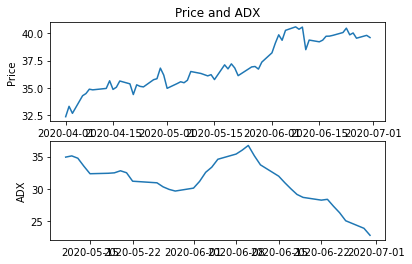

In [ ]:
 
import matplotlib.pyplot as plt
 
# Calculate ADX Equity Q2
Q2_edf_adx['ADX'] = talib.ADX(Q2_edf_adx['High'], 
Q2_edf_adx['Low'], 
Q2_edf_adx['Close'],
timeperiod=14)
 
# Print the last five rows
print(Q2_edf_adx.tail)
 
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
 
# Plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(Q2_edf_adx['Close'])
ax2.set_ylabel('ADX')
ax2.plot(Q2_edf_adx['ADX'])
ax1.set_title('Price and ADX')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<bound method NDFrame.tail of                   Open        High         Low  ...   Adj Close  Volume        ADX
Date                                            ...                               
2020-04-01  241.619995  243.360001  240.600006  ...  242.830002   52675        NaN
2020-04-02  245.479996  247.770004  244.059998  ...  245.309998   35783        NaN
2020-04-03  249.350006  251.000000  249.160004  ...  249.399994   28699        NaN
2020-04-06  253.160004  254.179993  251.020004  ...  251.440002   44683        NaN
2020-04-07  254.990005  257.000000  252.750000  ...  254.100006   88269        NaN
...                ...         ...         ...  ...         ...     ...        ...
2020-06-24  238.839996  239.460007  238.690002  ...  239.020004   47717  17.357032
2020-06-25  240.789993  241.419998  240.270004  ...  240.820007   53271  16.149100
2020-06-26  240.539993  240.940002  239.259995  ...  239.660004   30915  15.205178
2020-06-29  241.970001  242.600006  241.130005  ...  241.

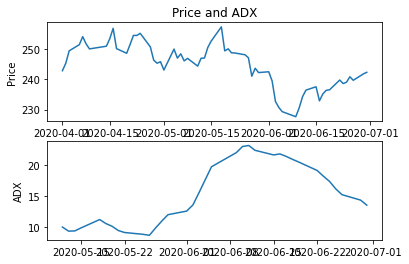

In [ ]:
 
 
# Calculate ADX Gold Q2
Q2_gdf_adx['ADX'] = talib.ADX(Q2_gdf_adx['High'], 
Q2_gdf_adx['Low'], 
Q2_gdf_adx['Close'],
timeperiod=14)
 
# Print the last five rows
print(Q2_gdf_adx.tail)
 
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
 
# Plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(Q2_gdf_adx['Close'])
ax2.set_ylabel('ADX')
ax2.plot(Q2_gdf_adx['ADX'])
ax1.set_title('Price and ADX')
plt.show()

#### Quarter 3 ADX

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<bound method NDFrame.tail of                  Open       High        Low  ...  Adj Close    Volume        ADX
Date                                         ...                                
2020-07-01  39.959999  40.320000  39.950001  ...  39.462383  14205900        NaN
2020-07-02  41.049999  41.340000  40.950001  ...  40.396351  10983200        NaN
2020-07-06  42.540001  42.919998  42.529999  ...  42.175793  14011700        NaN
2020-07-07  42.389999  42.669998  42.209999  ...  41.507275  10095000        NaN
2020-07-08  42.860001  43.369999  42.820000  ...  42.618191   9999700        NaN
...               ...        ...        ...  ...        ...       ...        ...
2020-09-24  41.790001  42.419998  41.709999  ...  41.852390  13662200  18.307578
2020-09-25  41.810001  42.160000  41.529999  ...  41.842464  11081400  19.851009
2020-09-28  42.669998  42.790001  42.389999  ...  42.259396   7950600  20.169950
2020-09-29  42.450001  42.709999  42.410000  ...  42.239544  13454500  20.46610

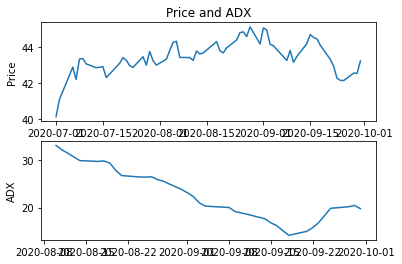

In [ ]:
 
 
# Calculate ADX Equity Q3
Q3_edf_adx['ADX'] = talib.ADX(Q3_edf_adx['High'], 
Q3_edf_adx['Low'], 
Q3_edf_adx['Close'],
timeperiod=14)
 
# Print the last five rows
print(Q3_edf_adx.tail)
 
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
 
# Plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(Q3_edf_adx['Close'])
ax2.set_ylabel('ADX')
ax2.plot(Q3_edf_adx['ADX'])
ax1.set_title('Price and ADX')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<bound method NDFrame.tail of                   Open        High         Low  ...   Adj Close  Volume        ADX
Date                                            ...                               
2020-07-01  242.440002  244.000000  241.729996  ...  242.860001   40431        NaN
2020-07-02  239.740005  240.320007  239.100006  ...  239.380005   42244        NaN
2020-07-03  240.699997  241.380005  239.979996  ...  239.979996   18149        NaN
2020-07-06  239.580002  239.690002  238.500000  ...  238.899994   20516        NaN
2020-07-07  240.000000  240.690002  239.210007  ...  240.690002   16569        NaN
...                ...         ...         ...  ...         ...     ...        ...
2020-09-24  246.139999  247.479996  246.009995  ...  246.320007   42149  18.233081
2020-09-25  247.889999  248.289993  247.190002  ...  247.929993   23754  17.841257
2020-09-28  247.839996  247.839996  246.690002  ...  246.770004   20162  17.660559
2020-09-29  248.699997  249.630005  248.250000  ...  248.

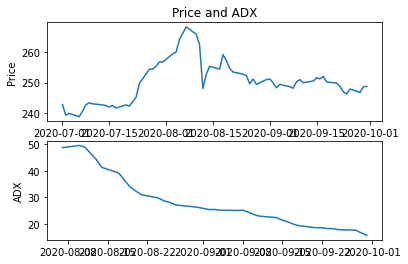

In [ ]:
 
 
# Calculate ADX gold Q3
Q3_gdf_adx['ADX'] = talib.ADX(Q3_gdf_adx['High'], 
Q3_gdf_adx['Low'], 
Q3_gdf_adx['Close'],
timeperiod=14)
 
# Print the last five rows
print(Q3_gdf_adx.tail)
 
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
 
# Plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(Q3_gdf_adx['Close'])
ax2.set_ylabel('ADX')
ax2.plot(Q3_gdf_adx['ADX'])
ax1.set_title('Price and ADX')
plt.show()

#### Quarter 4 ADX

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<bound method NDFrame.tail of                  Open       High        Low  ...  Adj Close    Volume        ADX
Date                                         ...                                
2020-10-01  43.560001  43.660000  43.299999  ...  43.301735  19828700        NaN
2020-10-02  43.000000  43.509998  42.930000  ...  42.825237  11787700        NaN
2020-10-05  43.340000  43.700001  43.310001  ...  43.381153   6401600        NaN
2020-10-06  43.900002  44.130001  43.680000  ...  43.510204  10749600        NaN
2020-10-07  44.169998  44.340000  44.029999  ...  43.917217   8247700        NaN
...               ...        ...        ...  ...        ...       ...        ...
2020-12-23  49.240002  49.310001  49.119999  ...  49.136650   9989700  27.659368
2020-12-24  49.070000  49.099998  48.669998  ...  48.857006   5756600  25.914263
2020-12-28  49.110001  49.180000  48.910000  ...  48.956879   9984800  24.157993
2020-12-29  49.310001  49.619999  49.279999  ...  49.486198  11728500  23.04961

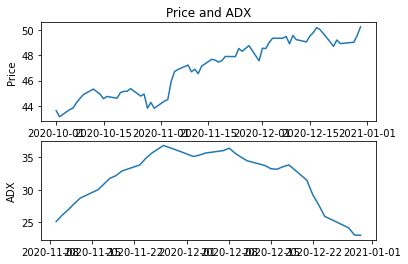

In [ ]:
 
 
# Calculate ADX Equity Q4
Q4_edf_adx['ADX'] = talib.ADX(Q4_edf_adx['High'], 
Q4_edf_adx['Low'], 
Q4_edf_adx['Close'],
timeperiod=14)
 
# Print the last five rows
print(Q4_edf_adx.tail)
 
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
 
# Plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(Q4_edf_adx['Close'])
ax2.set_ylabel('ADX')
ax2.plot(Q4_edf_adx['ADX'])
ax1.set_title('Price and ADX')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<bound method NDFrame.tail of                   Open        High         Low  ...   Adj Close  Volume        ADX
Date                                            ...                               
2020-10-01  247.000000  247.369995  246.580002  ...  247.270004   15864        NaN
2020-10-02  248.339996  250.330002  247.500000  ...  250.330002   27725        NaN
2020-10-05  250.470001  250.470001  246.210007  ...  246.210007   17780        NaN
2020-10-06  248.979996  249.399994  248.300003  ...  249.050003   17423        NaN
2020-10-07  247.699997  247.850006  247.029999  ...  247.669998   19898        NaN
...                ...         ...         ...  ...         ...     ...        ...
2020-12-23  232.750000  232.750000  230.809998  ...  231.149994   19284  25.901624
2020-12-24  231.229996  231.619995  230.880005  ...  231.350006   13335  24.270540
2020-12-29  231.250000  231.830002  231.000000  ...  231.360001   13180  22.820584
2020-12-30  230.839996  230.889999  230.289993  ...  230.

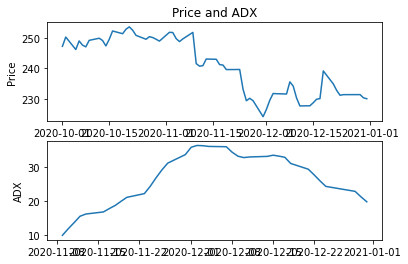

In [ ]:
 
 
# Calculate ADX Gold Q4
Q4_gdf_adx['ADX'] = talib.ADX(Q4_gdf_adx['High'], 
Q4_gdf_adx['Low'], 
Q4_gdf_adx['Close'],
timeperiod=14)
 
# Print the last five rows
print(Q4_gdf_adx.tail)
 
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
 
# Plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(Q4_gdf_adx['Close'])
ax2.set_ylabel('ADX')
ax2.plot(Q4_gdf_adx['ADX'])
ax1.set_title('Price and ADX')
plt.show()

#### Momentum Indicator RSI

 
Stands for "Relative Strength Index"
 
Developed by J. Welles Wilder
 
"New Concepts in Technical Systems"
(1987)
 
Measures the momentum of a trend
 
Oscillates between 0 and 100
 
RSI > 70: Overbought
 
RSI < 30: Oversold
 
How is RSI calculated?
 
RSI = 100 − 100/(1 + RS)
 
Where:
 
RS: relative strength
 
RS = average of upward price changes / average of downward price changes

#### Quarter 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


                 Open       High        Low  ...    Volume        ADX        RSI
Date                                         ...                                
2020-06-24  40.240002  40.360001  39.619999  ...  11226800  27.282036  59.081907
2020-06-25  39.799999  40.090000  39.639999  ...   9676800  26.279140  60.184504
2020-06-26  39.919998  39.939999  39.419998  ...  14051900  25.031693  55.626600
2020-06-29  39.619999  39.820000  39.410000  ...  11001500  23.858508  57.503969
2020-06-30  39.720001  39.779999  39.470001  ...  17667800  22.769122  55.556800

[5 rows x 8 columns]


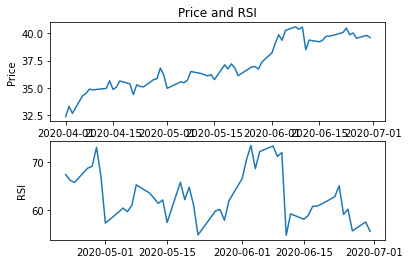

In [ ]:
 
# Calculate RSI Equity Q2
Q2_edf = Q2_edf_adx
 
Q2_edf['RSI'] = talib.RSI(Q2_edf['Close'], timeperiod=14)
# Print the last five rows
print(Q2_edf.tail())
 
# Plotting the data:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(Q2_edf['Close'])
ax2.set_ylabel('RSI')
ax2.plot(Q2_edf['RSI'])
ax1.set_title('Price and RSI')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


                  Open        High         Low  ...  Volume        ADX        RSI
Date                                            ...                              
2020-06-24  238.839996  239.460007  238.690002  ...   47717  17.357032  50.245331
2020-06-25  240.789993  241.419998  240.270004  ...   53271  16.149100  53.224872
2020-06-26  240.539993  240.940002  239.259995  ...   30915  15.205178  51.101059
2020-06-29  241.970001  242.600006  241.130005  ...   34707  14.322822  54.661691
2020-06-30  242.119995  242.529999  241.399994  ...   21928  13.503492  55.517300

[5 rows x 8 columns]


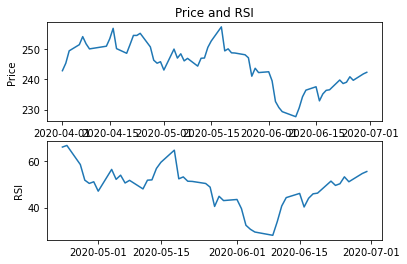

In [ ]:
 
# Calculate RSI Gold Q2
Q2_gdf = Q2_gdf_adx
 
Q2_gdf['RSI'] = talib.RSI(Q2_gdf['Close'], timeperiod=14)
# Print the last five rows
print(Q2_gdf.tail())
 
# Plotting the data:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(Q2_gdf['Close'])
ax2.set_ylabel('RSI')
ax2.plot(Q2_gdf['RSI'])
ax1.set_title('Price and RSI')
plt.show()

#### Quarter 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


                 Open       High        Low  ...    Volume        ADX        RSI
Date                                         ...                                
2020-09-24  41.790001  42.419998  41.709999  ...  13662200  18.307578  37.032939
2020-09-25  41.810001  42.160000  41.529999  ...  11081400  19.851009  36.967344
2020-09-28  42.669998  42.790001  42.389999  ...   7950600  20.169950  41.643406
2020-09-29  42.450001  42.709999  42.410000  ...  13454500  20.466108  41.485576
2020-09-30  42.889999  43.310001  42.849998  ...  13773800  19.767499  48.708069

[5 rows x 8 columns]


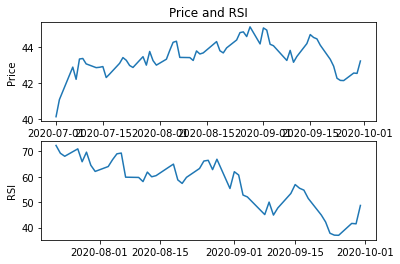

In [ ]:
 
# Calculate RSI Equity Q3
Q3_edf = Q3_edf_adx
 
Q3_edf['RSI'] = talib.RSI(Q3_edf['Close'], timeperiod=14)
# Print the last five rows
print(Q3_edf.tail())
 
# Plotting the data:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(Q3_edf['Close'])
ax2.set_ylabel('RSI')
ax2.plot(Q3_edf['RSI'])
ax1.set_title('Price and RSI')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


                  Open        High         Low  ...  Volume        ADX        RSI
Date                                            ...                              
2020-09-24  246.139999  247.479996  246.009995  ...   42149  18.233081  37.913467
2020-09-25  247.889999  248.289993  247.190002  ...   23754  17.841257  43.282969
2020-09-28  247.839996  247.839996  246.690002  ...   20162  17.660559  40.561126
2020-09-29  248.699997  249.630005  248.250000  ...   20601  16.654590  46.496049
2020-09-30  248.630005  249.139999  248.389999  ...   17811  15.720477  46.647033

[5 rows x 8 columns]


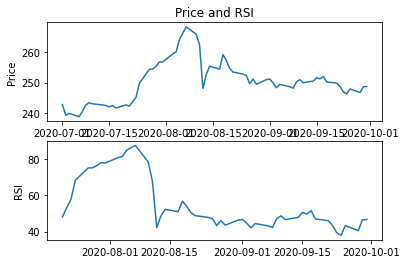

In [ ]:
 
# Calculate RSI Gold Q3
Q3_gdf = Q3_gdf_adx
 
Q3_gdf['RSI'] = talib.RSI(Q3_gdf['Close'], timeperiod=14)
# Print the last five rows
print(Q3_gdf.tail())
 
# Plotting the data:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(Q3_gdf['Close'])
ax2.set_ylabel('RSI')
ax2.plot(Q3_gdf['RSI'])
ax1.set_title('Price and RSI')
plt.show()

#### Quarter 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


                 Open       High        Low  ...    Volume        ADX        RSI
Date                                         ...                                
2020-12-23  49.240002  49.310001  49.119999  ...   9989700  27.659368  55.820232
2020-12-24  49.070000  49.099998  48.669998  ...   5756600  25.914263  53.071414
2020-12-28  49.110001  49.180000  48.910000  ...   9984800  24.157993  53.943734
2020-12-29  49.310001  49.619999  49.279999  ...  11728500  23.049611  58.361317
2020-12-30  50.119999  50.360001  50.029999  ...   7124900  23.007208  63.297107

[5 rows x 8 columns]


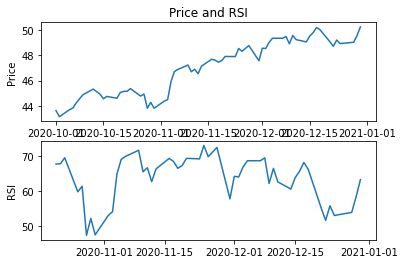

In [ ]:
 
# Calculate RSI Equity Q4
Q4_edf = Q4_edf_adx
 
Q4_edf['RSI'] = talib.RSI(Q4_edf['Close'], timeperiod=14)
# Print the last five rows
print(Q4_edf.tail())
 
# Plotting the data:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(Q4_edf['Close'])
ax2.set_ylabel('RSI')
ax2.plot(Q4_edf['RSI'])
ax1.set_title('Price and RSI')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


                  Open        High         Low  ...  Volume        ADX        RSI
Date                                            ...                              
2020-12-23  232.750000  232.750000  230.809998  ...   19284  25.901624  45.232493
2020-12-24  231.229996  231.619995  230.880005  ...   13335  24.270540  45.591493
2020-12-29  231.250000  231.830002  231.000000  ...   13180  22.820584  45.610679
2020-12-30  230.839996  230.889999  230.289993  ...   10474  21.230121  43.860838
2020-12-31  230.500000  230.880005  230.000000  ...   14772  19.776455  43.332276

[5 rows x 8 columns]


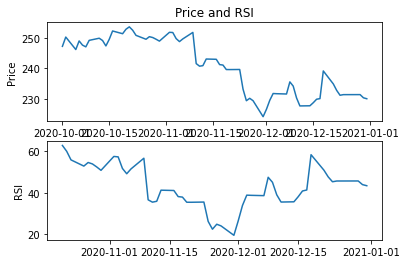

In [ ]:
 
# Calculate RSI Gold Q4
Q4_gdf = Q4_gdf_adx
 
Q4_gdf['RSI'] = talib.RSI(Q4_gdf['Close'], timeperiod=14)
# Print the last five rows
print(Q4_gdf.tail())
 
# Plotting the data:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(Q4_gdf['Close'])
ax2.set_ylabel('RSI')
ax2.plot(Q4_gdf['RSI'])
ax1.set_title('Price and RSI')
plt.show()

#### R Code

#### R Dependencies

In [ ]:
 %load_ext rpy2.ipython

In [ ]:
 
%%R
#Quantmod
install.packages('quantmod')
library(quantmod)
# NNET
install.packages("nnet")
library (nnet)
# Caret
install.packages("caret")
library(caret)
# e1071
install.packages("e1071", dep = TRUE, type = "source")
library(e1071)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/xts_0.12.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 517875 bytes (505 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

#### ANN model with NNET:

In [ ]:
%%R
getSymbols("VWO", src="yahoo")
data <- VWO[,"VWO.Close"]
head(data)

R[write to console]: ‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




           VWO.Close
2007-01-03    38.950
2007-01-04    38.525
2007-01-05    37.450
2007-01-08    37.860
2007-01-09    36.955
2007-01-10    36.850


In [ ]:
%%R
# Calculate the technical indicators
#Implementing return 
return <- Delt(data)
 
# Implementing moving average
 
averagel0<- rollapply(data,10,mean)
averagel0
 
average20<- rollapply(data, 20,mean)
average20
 
 
# Implementing standard deviation
 
std10<- rollapply(data,10,sd)
std20<- rollapply(data,20,sd)
 
# Implement RSI 
 
rsi5<- RSI (data,5,"SMA")
rsil4<- RSI (data,14,"SMA")
 
# Implement MACD 
macd12269<- MACD(data,12,26,9,"SMA")
macd7205<- MACD(data,7,20,5,"SMA")
 
#Implement bollinger bands
bollinger_bands<-BBands(data, 20, "SMA", 2)
 
#Generate directions
# Return over the last 20 days > 2 % -> Updirection
# Return over the last 20 days is between -2 % and 2 % -> Nowhere
# Return over the last 20 days < - 2 % -> Downdirection
#Generate a data frame named 
# direction which consists of NA and anumber of rows the same
# as the number of rows in data and one column
 
direction<-data.frame(matrix(NA, dim(data)[1],1))
 
# Calculate the return over the last 20 days 
 
lagreturn<- (data - Lag(data,20)) / Lag(data, 20)
 
# Indicate Up, Down and Nowhere directions
 
direction[lagreturn> 0.02] <- "Up"
direction[lagreturn< -0.02] <- "Down"
direction[lagreturn< 0.02 &lagreturn > -0.02] <- "NoWhere"

In [ ]:
%%R
#Creating dataset using cbind function# Closing price and indicators are put into one variable called cbind
data<- cbind(data, averagel0, average20,std10,std20,rsi5,rsil4,macd12269,macd7205,bollinger_bands)
 
# Dividing neural network dataset in three parts:
# Training dataset -> training the neural network
# Validating dataset -> validating the estimated parameters
# Testing dataset -> measure the accuracy of the prediction
 
# Indicate end and start dates for train, validating and testing. 
train_sdate<- "2020-04-01"
train_edate<- "2020-06-10"
 
vali_sdate<- "2020-06-11"
vali_edate<- "2020-06-30"
 
test_sdate<- "2020-07-01"
test_edate<- "2020-09-30"
 
# Constructing date ranges for the three datasets
# Generate row numbers where the date is greater than and equal to start date and less than equal to the en’ date. Which) 
trainrow<- which(index(data) >= train_sdate& index(data) <= train_edate)
valirow<- which(index(data) >= vali_sdate& index(data) <= vali_edate)
testrow<- which (index(data) >= test_sdate& index(data) <= test_edate)
 
# Extract data for training, validating and testing periods
traindji<- data[trainrow, ]
validji<- data[valirow, ]
testdji<- data[testrow, ]
 
# Calculate mean and standard deviation of the training data
trainme<- apply(traindji,2,mean)
trainstd<- apply(traindji,2,sd)
 
# Create three matrices of dimensions equal to the Training, validating and testing data dimensions.
trainidn<-(matrix(1,dim(traindji)[1],dim(traindji)[2]))
valiidn<-(matrix(1,dim(validji)[1],dim(validji)[2]))
testidn<-(matrix(1,dim(testdji)[1],dim(testdji)[2]))
 
#Normalize the three datasets. T() function is used for matrix transposing.
norm_traindji<- (traindji - t(trainme*t(trainidn))) /t(trainstd*t(trainidn))
norm_validji<- (validji - t(trainme*t(valiidn))) / t(trainstd*t(valiidn))
norm_testdji<- (testdji - t(trainme*t(testidn))) / t(trainstd*t(testidn))
 
#Define training, validating and testing period
traindir<- direction[trainrow,1]
validir<- direction[valirow,1]
testdir<- direction[testrow,1]

In [ ]:
%%R
# Implement ANN
# Trading with Neural Networks
# The neural network starts with random weights and will provide different results. 
#Seed() function will allow the same output every time
set.seed(1)
# Implement ANN 
neural_network<-nnet(norm_traindji,class.ind(traindir),size=4, trace=T)
neural_network

# weights:  191
initial  value 37.432795 
iter  10 value 13.909236
iter  20 value 12.871955
iter  30 value 12.736920
iter  40 value 12.668259
iter  50 value 12.666589
final  value 12.666583 
converged
a 43-4-3 network with 191 weights
options were -


In [ ]:
%%R
# Obtain data dimension 
dim(norm_traindji)

[1] 49 43


In [ ]:
%%R
# Make predictions 
vali_pred<-predict(neural_network,norm_validji)
head(vali_pred)

           Down NoWhere Up
2020-06-11    0       0  1
2020-06-12    0       0  1
2020-06-15    0       0  1
2020-06-16    0       0  1
2020-06-17    0       0  1
2020-06-18    0       0  1


In [ ]:
 %%R
#Calculate the predicted direction using the information obtained above.
vali_pred_class<-data.frame(matrix(NA, dim(vali_pred)[1],1))

In [ ]:
%%R
vali_pred_class[vali_pred[,"Down"] > 0.5,1] <- "Down"
vali_pred_class[vali_pred[,"NoWhere"] > 0.5,1] <- "NoWhere"
vali_pred_class[vali_pred[,"Up"] > 0.5,1] <- "Up"

In [ ]:
 confusionMatrix(
  factor(pred, levels = 1:148),
  factor(testing$Final, levels = 1:148)
)

In [ ]:
%%R
# Use confusionMatrix() over the predicted class and original class for the validating dataset.
matrix<- confusionMatrix(factor(vali_pred_class[,1]),factor(validir))
test_pred<-predict(neural_network,norm_testdji)

In [ ]:
%%R
# Check the accuracy on testing test data test pred
# Indicate the classes for the testing data
test_pred_class<- data.frame(matrix(NA, dim(test_pred)[1],1))
test_pred_class[test_pred[,"Down"] > 0.5,1] <- "Down"
test_pred_class[test_pred[,"NoWhere"] > 0.5,1] <- "NoWhere"
test_pred_class[test_pred[,"Up"] > 0.5,1] <- "Up"

In [ ]:
%%R
# Check the accuracy of the forecasts test matrix
test_matrix<- confusionMatrix(factor(test_pred_class[,1]),factor(testdir))

In [ ]:
%%R
# Generate trade signals using the same pattern as human psychology
# Traders buy when they anticipate up direction and sell when a down direction is expected.
signal<- ifelse(test_pred_class =="UP",1,ifelse(test_pred_class =="Down",-1,0))
signal

      matrix.NA..dim.test_pred..1...1.
 [1,]                                0
 [2,]                                0
 [3,]                                0
 [4,]                                0
 [5,]                                0
 [6,]                                0
 [7,]                                0
 [8,]                                0
 [9,]                                0
[10,]                                0
[11,]                                0
[12,]                                0
[13,]                                0
[14,]                                0
[15,]                                0
[16,]                                0
[17,]                                0
[18,]                                0
[19,]                                0
[20,]                                0
[21,]                                0
[22,]                                0
[23,]                                0
[24,]                                0
[25,]                    

###6.8 Best of the 5 models

From question 5, we concluded that the GARCH model is more suitable. Similarly, the VARM compared with the MGARCH, the second one will be more suitable given the nature of the assets we are analysing. Concerning the third strategy, ANN can solve non-linear problems very well. However, they lack explainability and in this particular case, tuning the ANN was not sufficient. We need to consider the type of optimisation for the network; we need to decide if the model is fully connected or if we will use a technique to eliminate neurons such as dropout; we need to decide the activation function in each hidden layer; we need to define the optimal epochs given the loss function. Moreover, we do not have enough data to secure a good result from the ANN. Our model could be underfitting the data. Therefore, the model presents high bias and low variance. 

For this reasons, from the five models, we keep with the GARCH and MGARCH. From this two, the MGARCH is more informative than just an univariate GARCH model, by providing conditional correlation, covariance and volatility.

##7. Category 3 Models: 
###Use all 3 variables: the one you are trading
7.1 Use the same series as you did in the previous question.  
Call it y

7.2 Use Q2 data for estimation, and Q3 data for evaluating performance.
 
7.3 Repeat, using Q3 data for estimation, and Q4 data for evaluating performance.
 
7.4 Built three strategies 

7.5 The 1st should include VAR or VARMA
  
7.6 The 2nd strategy should attempt to include cointegration.  Note there can be cointegration between (y, x1);  or (y; x2);  or(y, x1, x2).  If none of these cointegrations exists, then justify the lack of existence for cointegration in quantitative terms.

7.7 The 3rd strategy should attempt to include an error-correction model (ECM).  This will only work if there is cointegration in the previous part.

7.8 Now you have a total of 8 models (including 5 from the previous 2 questions).  Which of the 8 models do you prefer? Explain in quantitative terms.

### 7.5 1st Strategy: VAR model

In [ ]:
 
import yfinance as yf
# download, create returns and 
ticker = ['VWO','SPY','GOLD.AX','BTC-USD','ETH-USD']
df = yf.download(ticker,                    
                     start='2020-04-01',
                     end='2020-12-31',
                     progress=False)['Adj Close']
 
df.dropna(inplace = True)
 
df2 = df.loc['2020-04-01':'2020-09-30']
df3 = df.loc['2020-07-01':'2020-12-31']
 
 
Q2_df = df.loc['2020-04-01':'2020-06-30']
Q3_df = df.loc['2020-07-01':'2020-09-30']
Q4_df = df.loc['2020-10-01':'2020-12-31']

Vector Autoregression (VAR) is a forecasting algorithm that can be used when two or more time series influence each other. That is, the relationship between the time series involved is bi-directional, unlike AR, ARMA, ARIMA.

In [ ]:
 # Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### The Granger’s Causality test and the Cointegration test.

In [ ]:
 from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.
 
    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
 
grangers_causation_matrix(df, variables = df.columns)

BTC-USD_x  ETH-USD_x  GOLD.AX_x   SPY_x   VWO_x
BTC-USD_y     1.0000     0.0007     0.2062  0.1473  0.3004
ETH-USD_y     0.0001     1.0000     0.0881  0.2453  0.0932
GOLD.AX_y     0.0039     0.0563     1.0000  0.0791  0.1520
SPY_y         0.0170     0.0020     0.2990  1.0000  0.0144
VWO_y         0.0207     0.0016     0.2821  0.4425  1.0000

If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).
 
So, you can reject the null hypothesis and conclude all < significance level (0.05) causes the corresponding.
 
Looking at the P-Values in the above table, you can pretty much observe that all the variables (time series) in the system apart from majority Gold are interchangeably causing each other to some extent.
 
This makes this system of multi time series a good candidate for using VAR models to forecast.

 ### Cointegration Test
Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.

In [ ]:
 from statsmodels.tsa.vector_ar.vecm import coint_johansen
 
def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)
 
    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)
 
cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
BTC-USD ::  63.6      > 60.0627   =>   True
ETH-USD ::  30.35     > 40.1749   =>   False
GOLD.AX ::  15.42     > 24.2761   =>   False
SPY    ::  4.7       > 12.3212   =>   False
VWO    ::  0.16      > 4.1296    =>   False



### Check for Stationarity and Make the Time Series Stationary
Since the VAR model requires the time series you want to forecast to be stationary, it is customary to check all.

In [ ]:
 def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)
 
    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')
 
    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')
 
    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

### Q2 train, Q3 test:

In [ ]:
# Define train and test data
df_train = Q2_df
df_test = Q3_df
 
# Call the adfuller_test() on each series.
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BTC-USD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.0494
 No. Lags Chosen       = 0
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.2653. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ETH-USD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3792
 No. Lags Chosen       = 1
 Critical value 1%     = -3.548
 Critical value 5%     = -2.913
 Critical value 10%    = -2.594
 => P-Value = 0.1477. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GOLD.AX" 
    -----------------------------------------------
 Null Hypothesis: Data ha

The ADF test confirms none of the time series is stationary. Let’s difference all of them once and check again.

In [ ]:
 
 
# 1st difference
df_differenced = df_train.diff().dropna()

In [ ]:
 # Re-run ADF test on each differenced series.
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BTC-USD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.7879
 No. Lags Chosen       = 0
 Critical value 1%     = -3.548
 Critical value 5%     = -2.913
 Critical value 10%    = -2.594
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ETH-USD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.555
 No. Lags Chosen       = 0
 Critical value 1%     = -3.548
 Critical value 5%     = -2.913
 Critical value 10%    = -2.594
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GOLD.AX" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level   

The series are now all stationary

 
### Select the Order (P) of VAR model
To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.
Though the usual practice is to look at the AIC, we can also check other best fit comparison estimates of BIC, FPE and HQIC.

In [ ]:
 model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  18.029964390092164
BIC :  19.09571077485755
FPE :  67908954.07675514
HQIC:  18.44509413170499 

Lag Order = 2
AIC :  18.42191941210538
BIC :  20.39328467054223
FPE :  102607993.20387755
HQIC:  19.188059128494807 

Lag Order = 3
AIC :  18.826312482875434
BIC :  21.719672041068506
FPE :  162811386.42023352
HQIC:  19.948061864685652 

Lag Order = 4
AIC :  18.94761016858298
BIC :  22.77979170402679
FPE :  207635029.1223349
HQIC:  20.42954572473196 

Lag Order = 5
AIC :  18.725573818645216
BIC :  23.513868745559208
FPE :  209423615.35341823
HQIC:  20.57223139503611 

Lag Order = 6
AIC :  18.704557494664066
BIC :  24.46673195882593
FPE :  310710639.77812016
HQIC:  20.920411886663146 

Lag Order = 7
AIC :  17.647886986599893
BIC :  24.402192166304836
FPE :  228843866.82235685
HQIC:  20.23732818148651 

Lag Order = 8
AIC :  15.676163502890518
BIC :  23.441344967762806
FPE :  136654340.96836525
HQIC:  18.643469008741665 

Lag Order = 9
AIC :  -23.708748958094887
BIC :  -14.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  try:


The AIC drops to it's lowest at Lag 9.
Since the explicitly computed AIC is the lowest at lag 9, I choose the selected order as 9.

 ### Train the VAR Model of Selected Order(p)

In [ ]:
model_fitted = model.fit(9)
model_fitted.summary

<bound method VARResults.summary of <statsmodels.tsa.vector_ar.var_model.VARResults object at 0x7f8a0aba7910>>

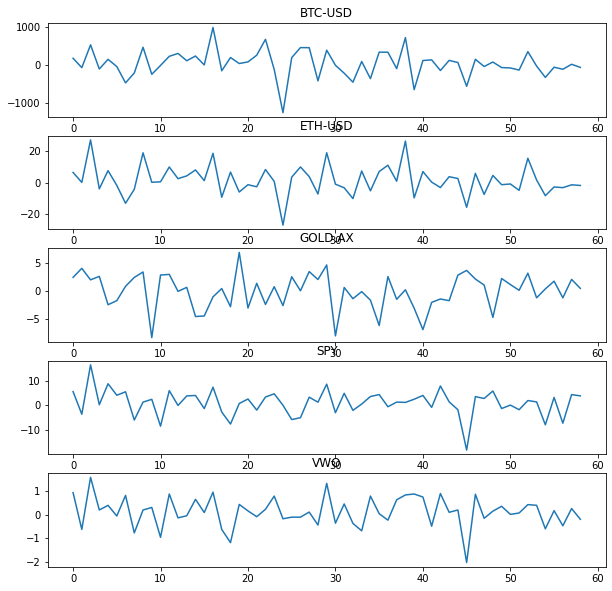

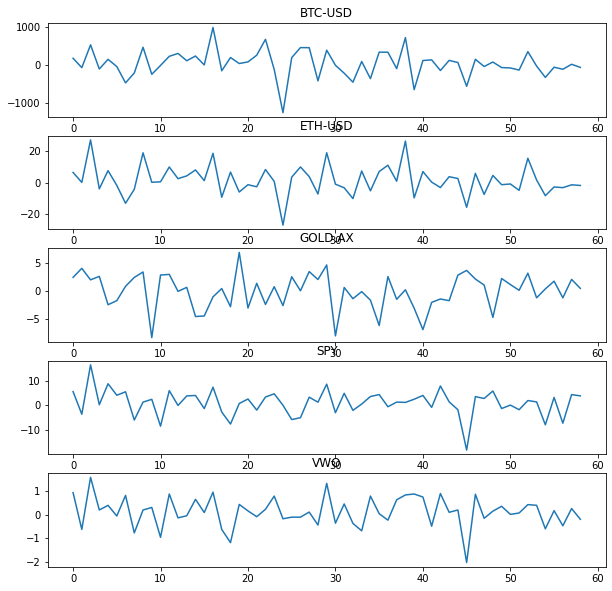

In [ ]:
model_fitted.plot()

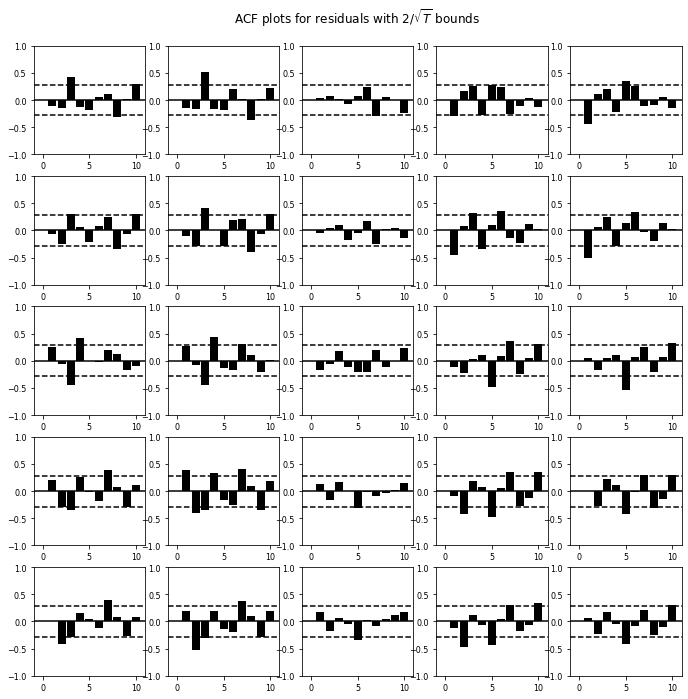

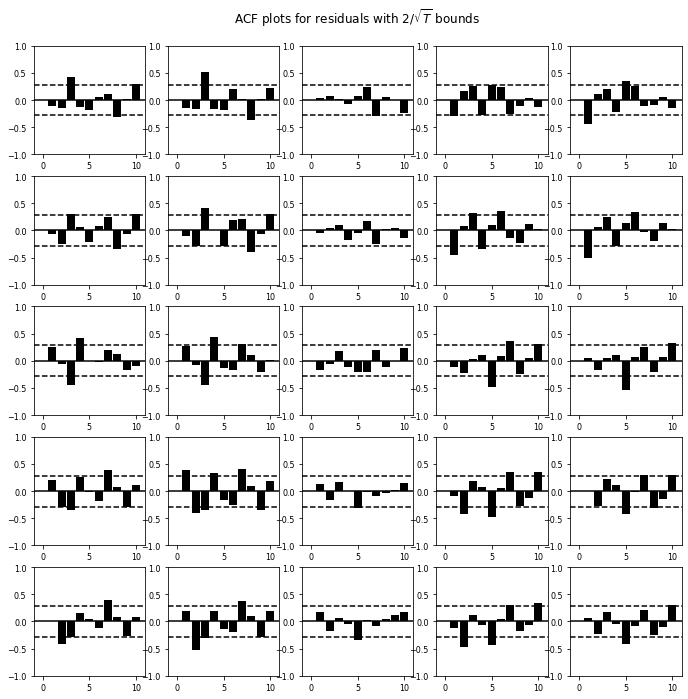

In [ ]:
model_fitted.plot_acorr()

 
### Check for serial correlation of Residuals (Errors) using Durbin Watson Statistic

In [ ]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)
out

array([2.19792589, 2.19747591, 2.33336262, 2.17943882, 1.86631702])

The value of the DW statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.
 
Our results seem decent as they are all close to 2.

### Forecast VAR model using statsmodels
In order to forecast, the VAR model expects up to the lag order number of observations from the past data.
This is because, the terms in the VAR model are essentially the lags of the various time series in the dataset, so you need to provide it as many of the previous values as indicated by the lag order used by the model.

In [ ]:
 # Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)
 
# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

9


array([[-6.84140625e+01, -9.27108765e-01,  1.19999695e+00,
         1.18103027e-01,  9.79232788e-03],
       [-1.23822266e+02, -4.96287537e+00,  1.80007935e-01,
        -1.75366211e+00,  6.85195923e-02],
       [ 3.60699219e+02,  1.53948975e+01,  3.22999573e+00,
         1.95730591e+00,  4.22740936e-01],
       [-1.90595703e+01,  1.60896301e+00, -1.16000366e+00,
         1.41360474e+00,  3.93249512e-01],
       [-3.16047852e+02, -8.36968994e+00,  4.30007935e-01,
        -7.86880493e+00, -5.99704742e-01],
       [-4.87968750e+01, -2.82797241e+00,  1.80000305e+00,
         3.22265625e+00,  1.67125702e-01],
       [-1.01895508e+02, -3.27644348e+00, -1.16000366e+00,
        -7.21636963e+00, -4.71897125e-01],
       [ 2.79365234e+01, -1.47317505e+00,  2.11999512e+00,
         4.35946655e+00,  2.55615234e-01],
       [-5.28613281e+01, -1.87986755e+00,  5.20004272e-01,
         3.85531616e+00, -1.96620941e-01]])

In [ ]:
 
# Let’s forecast.
# Forecast
fc = model_fitted.forecast(y=forecast_input[-lag_order:], steps=183)
df_forecast = pd.DataFrame(fc, index=df.index, columns=df.columns + '_2d')
df_forecast

BTC-USD_2d    ETH-USD_2d  ...        SPY_2d        VWO_2d
Date                                    ...                            
2020-04-01 -7.755483e+02 -2.719060e+01  ... -3.532773e+00 -1.459897e+00
2020-04-02  2.149262e+03  5.403321e+01  ...  4.994815e+00  9.903061e-01
2020-04-03 -2.786614e+01 -6.684567e+00  ...  1.440365e+00  4.960782e-01
2020-04-06  1.904038e+02  1.725817e+01  ... -6.537462e+00  4.960725e-01
2020-04-07 -5.360695e+02 -1.982472e+01  ... -8.934266e+00 -1.035736e+00
...                  ...           ...  ...           ...           ...
2020-12-22 -5.673737e+08 -2.311216e+07  ... -4.128015e+06 -8.599745e+05
2020-12-23  6.146461e+08  2.503736e+07  ...  4.471948e+06  9.316074e+05
2020-12-24 -6.658487e+08 -2.712284e+07  ... -4.844404e+06 -1.009201e+06
2020-12-29  7.212954e+08  2.938155e+07  ...  5.247705e+06  1.093240e+06
2020-12-30 -7.813386e+08 -3.182781e+07  ... -5.684486e+06 -1.184260e+06

[183 rows x 5 columns]

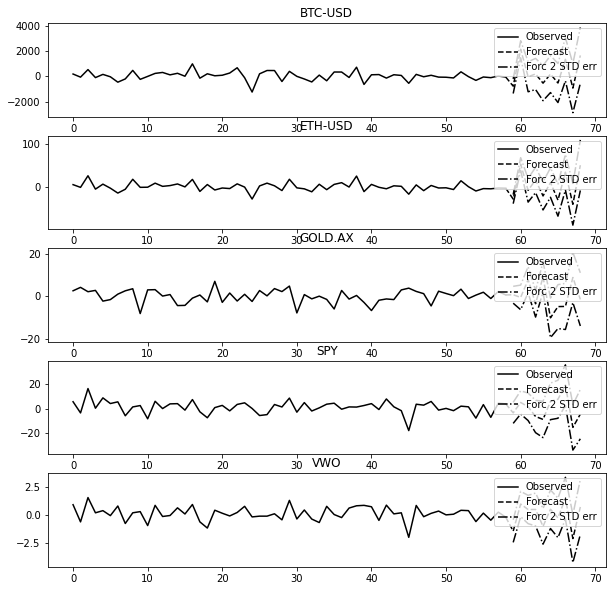

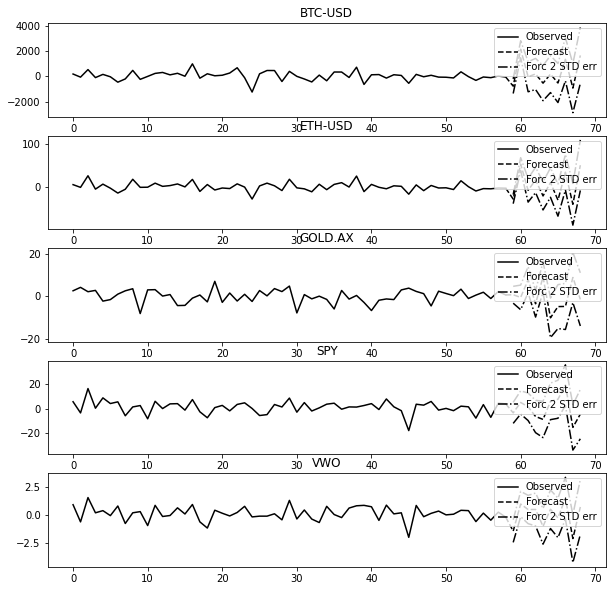

In [ ]:
 model_fitted.plot_forecast(10)

In [ ]:
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 26, Apr, 2021
Time:                     09:30:12
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -14.9134
Nobs:                     50.0000    HQIC:                  -20.3594
Log likelihood:           467.984    FPE:                4.06414e-08
AIC:                     -23.7087    Det(Omega_mle):     1.30028e-09
--------------------------------------------------------------------
Results for equation BTC-USD
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const            234.305128       104.591074            2.240           0.025
L1.BTC-USD         1.220414         1.017316            1.200           0.230
L1.ETH-USD       -36.876628        44.035830           -0.837         

### Q3 train, Q4 test:

In [ ]:
 # Define train and test data
df_train = Q3_df
df_test = Q4_df
 
# Call the adfuller_test() on each series.
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BTC-USD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7751
 No. Lags Chosen       = 0
 Critical value 1%     = -3.539
 Critical value 5%     = -2.909
 Critical value 10%    = -2.592
 => P-Value = 0.3929. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ETH-USD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7581
 No. Lags Chosen       = 0
 Critical value 1%     = -3.539
 Critical value 5%     = -2.909
 Critical value 10%    = -2.592
 => P-Value = 0.4015. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GOLD.AX" 
    -----------------------------------------------
 Null Hypothesis: Data ha

The ADF test confirm the series are non-stationary.

In [ ]:
 # 1st difference
df_differenced = df_train.diff().dropna()
 
# Re-run ADF test on each differenced series.
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BTC-USD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.0078
 No. Lags Chosen       = 0
 Critical value 1%     = -3.541
 Critical value 5%     = -2.909
 Critical value 10%    = -2.592
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ETH-USD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.4723
 No. Lags Chosen       = 0
 Critical value 1%     = -3.541
 Critical value 5%     = -2.909
 Critical value 10%    = -2.592
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GOLD.AX" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level  

The ADF test confirm stationarity after 1st difference.

 ### Select order(P) of VAR model:

In [ ]:
  model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  19.393002618657267
BIC :  20.42226119206618
FPE :  265212183.32974702
HQIC:  19.797115501862315 

Lag Order = 2
AIC :  19.48100877935121
BIC :  21.384255706064852
FPE :  294545974.3638223
HQIC:  20.226909086598774 

Lag Order = 3
AIC :  19.841567687035308
BIC :  22.63402710333144
FPE :  442353348.7416577
HQIC:  20.933852077512512 

Lag Order = 4
AIC :  20.02755491962061
BIC :  23.724867319791805
FPE :  586941234.0675648
HQIC:  21.4708359381016 

Lag Order = 5
AIC :  20.34395373689807
BIC :  24.962188070881425
FPE :  963997825.0753279
HQIC:  22.142849283886992 

Lag Order = 6
AIC :  20.540195379887642
BIC :  26.095861108209668
FPE :  1607265734.9856122
HQIC:  22.69931639880329 

Lag Order = 7
AIC :  20.711772503485154
BIC :  27.221831509419566
FPE :  3287793777.3488812
HQIC:  23.23570861255815 

Lag Order = 8
AIC :  20.1564487951399
BIC :  27.638327031006384
FPE :  4978316655.501331
HQIC:  23.049751547621245 

Lag Order = 9
AIC :  16.558173518592184
BIC :  25.029772

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  try:


### Train the VAR model of order(P).

In [ ]:
 model_fitted = model.fit(9)
model_fitted.summary

<bound method VARResults.summary of <statsmodels.tsa.vector_ar.var_model.VARResults object at 0x7f8a09d41e90>>

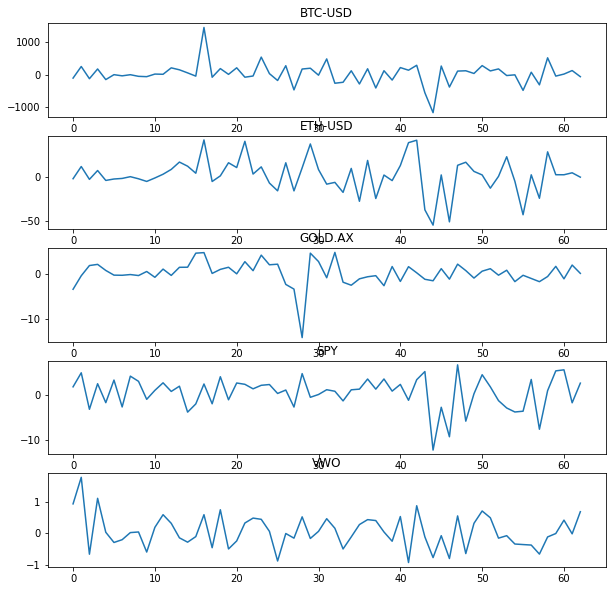

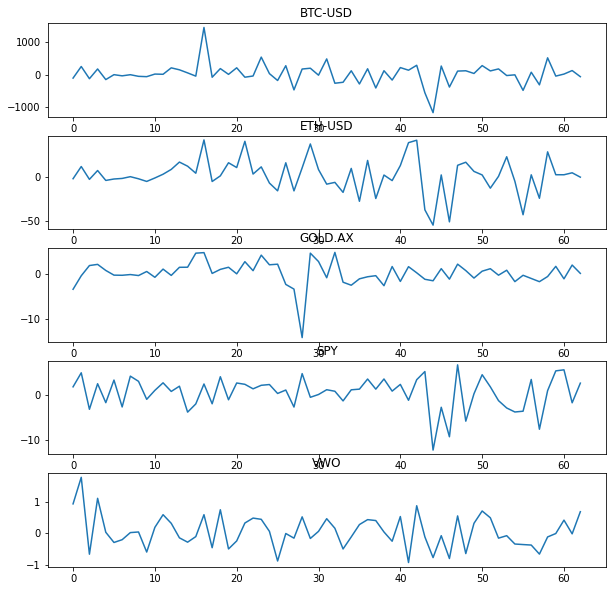

In [ ]:
 model_fitted.plot()

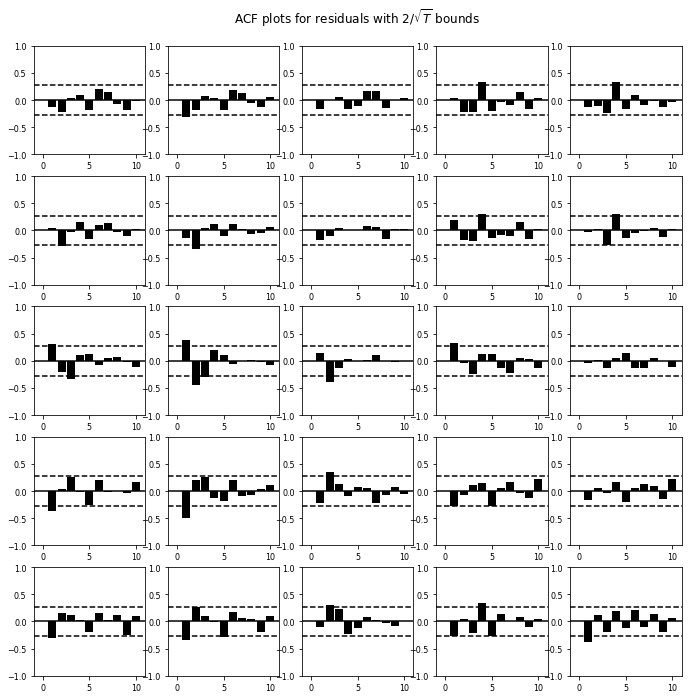

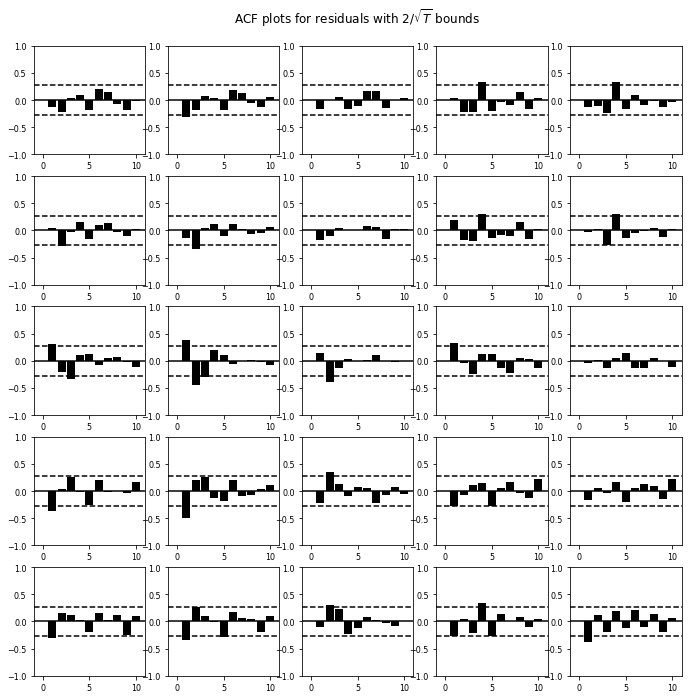

In [ ]:
model_fitted.plot_acorr()

### Durban Watson test for Q3 train, Q4 test.

In [ ]:
 from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)
out

array([2.19955556, 2.24303916, 1.66749533, 2.4859377 , 2.64609951])

Our output is close to 2

### Forecast VAR model for Q3 train, Q4 test

In [ ]:
 # Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)
 
# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

9


array([[-4.40429688e+00, -4.65469360e+00, -1.77999878e+00,
        -3.82214355e+00, -3.44093323e-01],
       [-4.82326172e+02, -4.25784607e+01, -3.70010376e-01,
        -3.65240479e+00, -3.61343384e-01],
       [ 7.62001953e+01,  2.71710205e+00, -1.08000183e+00,
         3.30502319e+00, -3.77227783e-01],
       [-3.12595703e+02, -2.39176331e+01, -1.78999329e+00,
        -7.60256958e+00, -6.65115356e-01],
       [ 5.19684570e+02,  2.87711182e+01, -6.49993896e-01,
         8.53546143e-01, -1.19121552e-01],
       [-4.32587891e+01,  2.80520630e+00,  1.60998535e+00,
         5.19079590e+00, -9.92584229e-03],
       [ 1.90371094e+01,  2.78863525e+00, -1.15998840e+00,
         5.41909790e+00,  4.16931152e-01],
       [ 1.27502930e+02,  5.01290894e+00,  1.89999390e+00,
        -1.80639648e+00, -1.98516846e-02],
       [-6.12119141e+01,  5.89599609e-02,  5.00030518e-02,
         2.50115967e+00,  6.84967041e-01]])

In [ ]:
 
# Let’s forecast.
# Forecast
fc = model_fitted.forecast(y=forecast_input[-lag_order:], steps=183)
df_forecast = pd.DataFrame(fc, index=df.index, columns=df.columns + '_2d')
df_forecast

BTC-USD_2d  ETH-USD_2d  GOLD.AX_2d    SPY_2d    VWO_2d
Date                                                              
2020-04-01 -453.983453  -38.147891   -2.255776 -0.405862 -0.298030
2020-04-02  282.805736   24.083497    2.749339 -1.224231  0.217603
2020-04-03  344.283314   15.236712    1.835748  1.847199 -0.214521
2020-04-06 -370.972182  -13.358471   -5.164471 -6.299990 -0.264315
2020-04-07  398.818558   32.474171    3.097322  4.614762  0.206727
...                ...         ...         ...       ...       ...
2020-12-22   16.168222    2.898770    1.136214  1.251051  0.056042
2020-12-23   87.038348    1.770362   -0.651950  0.580662  0.130399
2020-12-24  -19.548126    0.661789    0.708117  0.836575  0.032706
2020-12-29  144.551905    9.197386   -0.350950  1.011632  0.142209
2020-12-30  -12.908239   -0.665270   -0.029799  0.321615 -0.065103

[183 rows x 5 columns]

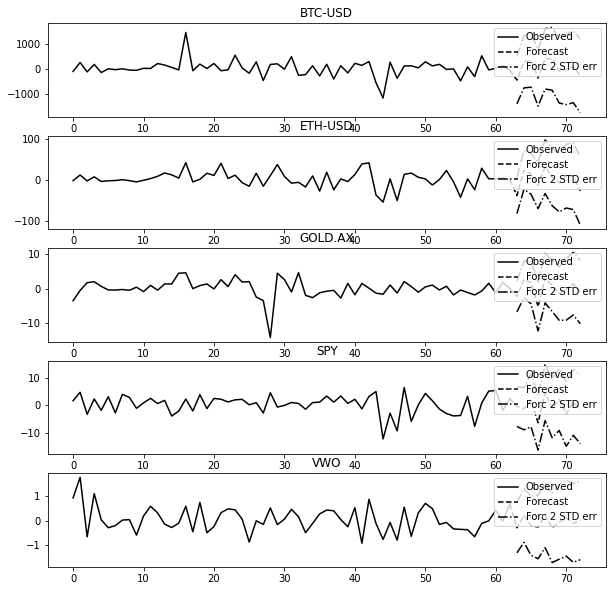

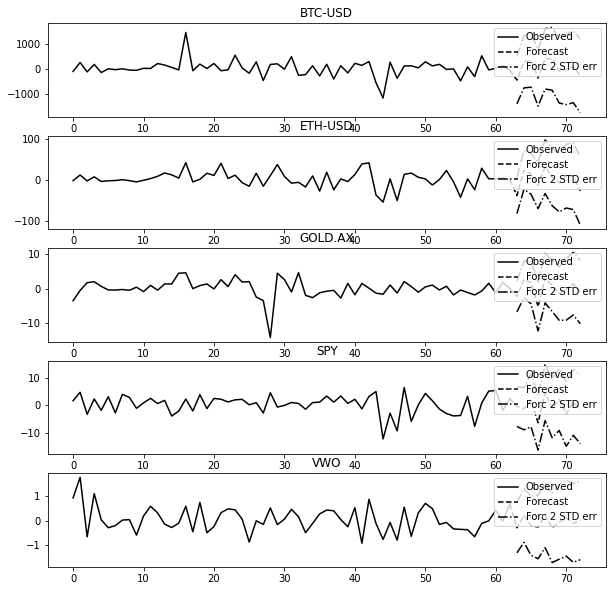

In [ ]:
  model_fitted.plot_forecast(10)

In [ ]:
 model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 26, Apr, 2021
Time:                     10:50:33
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    25.0298
Nobs:                     54.0000    HQIC:                   19.8253
Log likelihood:          -600.184    FPE:                9.46516e+08
AIC:                      16.5582    Det(Omega_mle):     4.34607e+07
--------------------------------------------------------------------
Results for equation BTC-USD
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             20.698922        77.699183            0.266           0.790
L1.BTC-USD        -0.009144         0.591010           -0.015           0.988
L1.ETH-USD         4.965100        11.891606            0.418         

### 7.6 Model 3: Cointegration Strategy

In [ ]:
 
import yfinance as yf
 # download, create returns and 
ticker = ['VWO','SPY','GOLD.AX','BTC-USD','ETH-USD']
df = yf.download(ticker,                    
                     start='2020-04-01',
                     end='2020-12-31',
                     progress=False)['Adj Close']
 
df.dropna(inplace = True)
 
df2 = df.loc['2020-04-01':'2020-09-30']
df3 = df.loc['2020-07-01':'2020-12-31']
 
 
Q2_df = df.loc['2020-04-01':'2020-06-30']
Q3_df = df.loc['2020-07-01':'2020-09-30']
Q4_df = df.loc['2020-10-01':'2020-12-31']

In [ ]:
# Cointegration Strategy:
df2.head()

BTC-USD     ETH-USD     GOLD.AX         SPY        VWO
Date                                                                  
2020-04-01  6606.776367  135.634552  242.830002  242.264893  31.677870
2020-04-02  6793.624512  142.029144  245.309998  247.855255  32.607845
2020-04-03  6733.387207  142.091309  249.399994  244.272705  31.981331
2020-04-06  7271.781250  169.135880  251.440002  260.679565  33.557396
2020-04-07  7176.414551  165.101944  254.100006  260.945343  33.753181

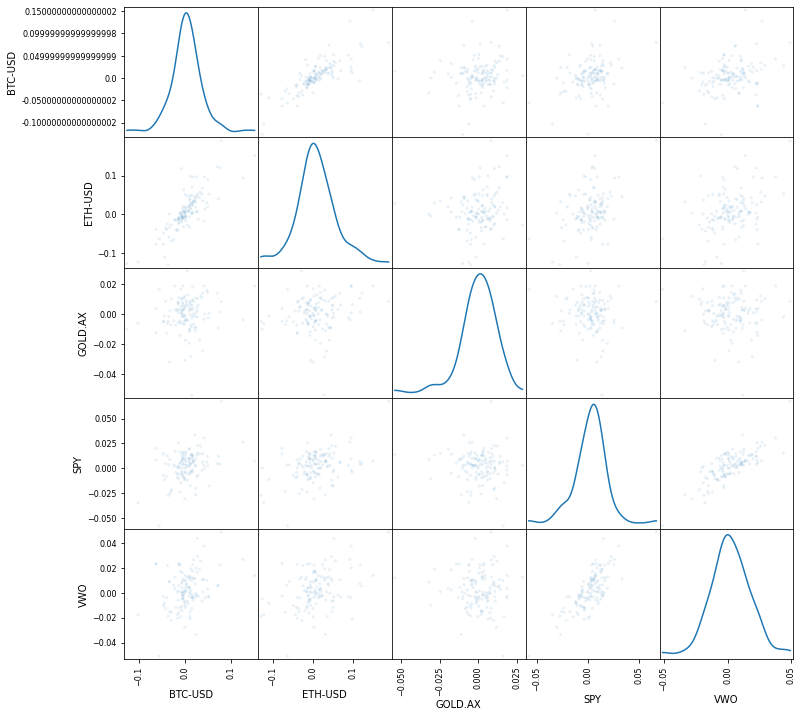

In [ ]:
 
 
daily_pct_change = df2.pct_change()
 
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))
 
# Show the plot
plt.show()

#### Install Dependencies

In [ ]:
!pip install johansen
!pip install statsmodels --user  
!pip install tensorboardX --user
!pip install pandas==0.24.2 --user
!pip install plotly
!pip install bs4 --user
!pip install plotly --user
!pip install -U auquan_toolbox --user

  Created wheel for johansen: filename=johansen-0.0.4-cp37-none-any.whl size=5628 sha256=379ef61a92bc5d415db776885814b001c583b858737279f23eb8d92100e6fcca
  Stored in directory: /root/.cache/pip/wheels/29/4a/ea/9a38d9ff2246e7a710488e8eaa22da457614a6f639979a59b4
Successfully built johansen
     |████████████████████████████████| 122kB 21.6MB/s 
     |████████████████████████████████| 10.1MB 17.1MB/s 
ERROR: xarray 0.15.1 has requirement pandas>=0.25, but you'll have pandas 0.24.2 which is incompatible.
ERROR: plotnine 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.24.2 which is incompatible.
ERROR: mizani 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.24.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.24.2 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 0.24.2 which is incompatible.


     |████████████████████████████████| 112kB 20.1MB/s 


#### Cointegration Strategy:

Note: We include the market benchmark (SPY) in our data — the market drives the movement of so many securities that often you might find two seemingly cointegrated securities; but in reality they are not cointegrated with each other but both cointegrated with the market. This is known as a confounding variable and it is important to check for market involvement in any relationship you find.

In [ ]:
data1 = df2.dropna() # Q2&Q3 data
data1.head()

BTC-USD     ETH-USD     GOLD.AX         SPY        VWO
Date                                                                  
2020-04-01  6606.776367  135.634552  242.830002  242.264893  31.677870
2020-04-02  6793.624512  142.029144  245.309998  247.855255  32.607845
2020-04-03  6733.387207  142.091309  249.399994  244.272705  31.981331
2020-04-06  7271.781250  169.135880  251.440002  260.679565  33.557396
2020-04-07  7176.414551  165.101944  254.100006  260.945343  33.753181

In [ ]:
data = df.dropna() # Q2 to Q4 end data
data.tail()

BTC-USD     ETH-USD     GOLD.AX         SPY        VWO
Date                                                                   
2020-12-22  23783.029297  634.854187  232.750000  366.041107  48.637291
2020-12-23  23241.345703  583.714600  231.149994  366.370056  49.136650
2020-12-24  23735.949219  611.607178  231.350006  367.795380  48.857006
2020-12-29  27362.437500  731.520142  231.360001  370.247345  49.486198
2020-12-30  28840.953125  751.618958  230.309998  370.775604  50.175312

In [ ]:
 
# HELPER FUNCTION: Find cointegrated pairs
def find_cointegrated_pairs(all_data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [ ]:
 #cachedFolderName = 'yahooData/'
dataSetId = 'testPairsTrading'
instrumentIds = ['SPY','VWO','GOLD.AX','BTC-USD']

In [ ]:
 import seaborn
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
 
from statsmodels.tsa.stattools import coint

First we run our cointegration function with only Q2 and Q3 data and discover that SPY and VWO are likely most cointegrated.

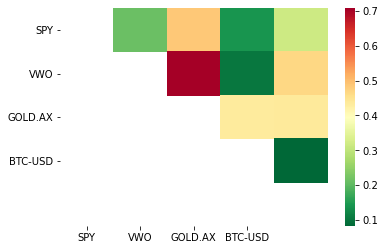

[]


In [ ]:
 # Heatmap to show the p-values of the cointegration test
# between each pair of stocks
 
scores, pvalues, pairs = find_cointegrated_pairs(data1)
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=instrumentIds, 
                yticklabels=instrumentIds, cmap='RdYlGn_r'
                , mask = (pvalues >= 0.98)
                )
plt.show()
print(pairs)

Next we investigate the entire data set available to us from Q2 to Q4.

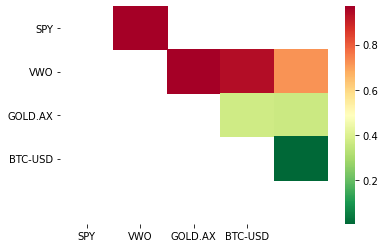

[('SPY', 'VWO')]


In [ ]:
 # Heatmap to show the p-values of the cointegration test
# between each pair of stocks
 
scores, pvalues, pairs = find_cointegrated_pairs(data)
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=instrumentIds, 
                yticklabels=instrumentIds, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.98)
                )
plt.show()
print(pairs)

It looks like the S&P 500 (Benchmark) ETF 'SPY' and our non-US equity stock ETF 'VWO' are likely cointegrated. We firstly further investigate Q2 and Q3 and then Q3 and Q4 below.

#### Q2 and Q3 data: Cointegration - Pairs Trading

0.17156849437980837


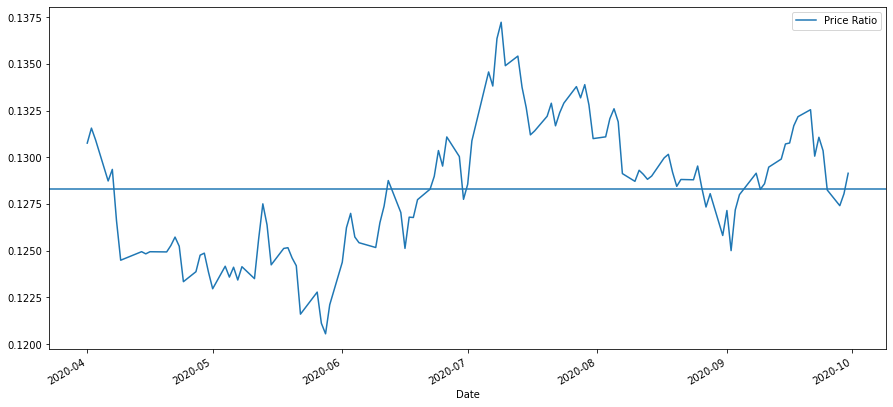

In [ ]:
 
# Let's take a look at the prices of ___ to make sure there's nothing weird going on.
S1 = data1['VWO']
S2 = data1['SPY']
score, pvalue, _ = coint(S1, S2)
print(pvalue)
ratios = S1 / S2
ratios.plot(figsize=(15,7))
plt.axhline(ratios.mean(),color="red")
plt.legend(['Price Ratio','Mean Price Ratio'])
plt.show()

The ratio does look like it moved around a stable mean.The absolute ratio isn’t very useful in statistical terms. It is more helpful to normalize our signal by treating it as a z-score. Z score is defined as:
 
Z Score (Value) = (Value — Mean) / Standard Deviation
 
WARNING In practice this is usually done to try to give some scale to the data, but this assumes an underlying distribution. Usually normal. However, much financial data is not normally distributed, and we must be very careful not to simply assume normality, or any specific distribution when generating statistics. The true distribution of ratios could be very fat-tailed and prone to extreme values messing up our model and resulting in large losses.

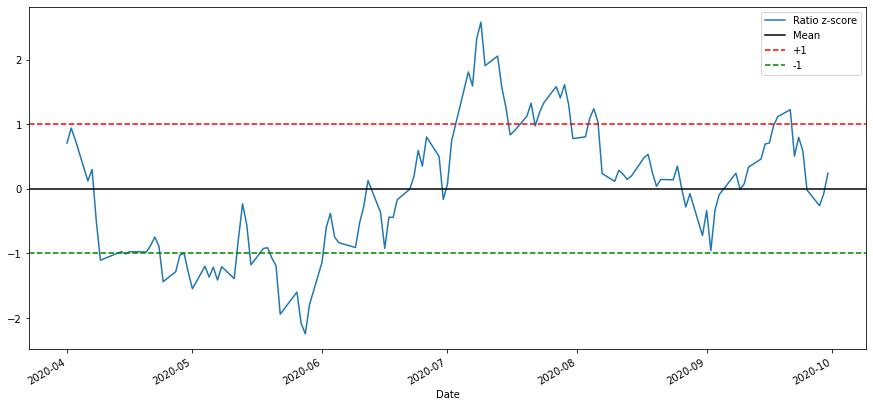

In [ ]:
 
# Zscore
def zscore(series):
    return (series - series.mean()) / np.std(series)
 
 
# Let's run the Zscore code:
zscore(ratios).plot(figsize=(15,7))
plt.axhline(zscore(ratios).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.show()

Simple Strategy:
 
Go "Long" the ratio whenever the z-score is below -1.0
 
Go "Short" the ratio when the z-score is above 1.0
 
Exit positions when the z-score approaches zero.
 
This is just the tip of the iceberg, and only a very simplistic example to illustrate the concepts.
In practice you would want to compute a more optimal weighting for how many shares to hold for S1 and S2 
 
You would also want to trade using constantly updating statistics.
In general taking a statistic over your whole sample size can be bad. For example, if the market is moving up, and both securities with it, then your average price over the last 3 years may not be representative of today. For this reason traders often use statistics that rely on rolling windows of the most recent data.
 
Instead of using ratio values, let's use 5d Moving Average to compute to z score, and the 60d Moving Average and 60d Standard Deviation as the mean and standard deviation.
 
First break the data into training set of Q2 and test set of Q3 and again for training set Q3 and test set Q4.

124


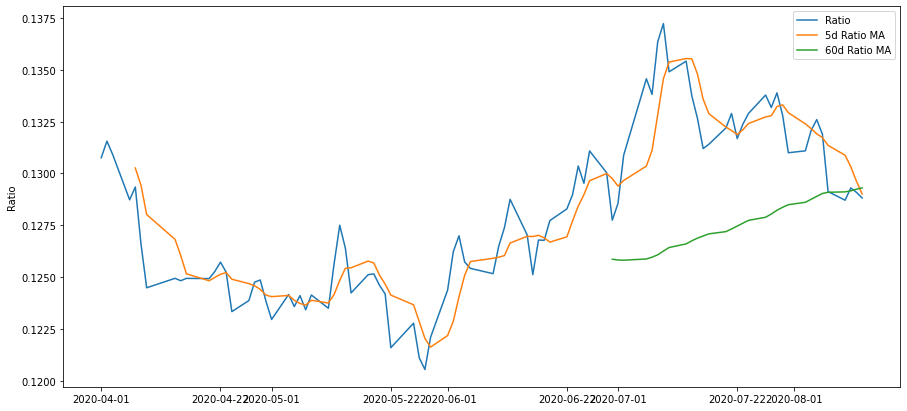

In [ ]:
 
ratios = data1['VWO'] / data1['SPY']
print(len(ratios))
train = ratios[:91] #Q2 has 91 days
test = ratios[92:] # Q3 has 92 days
 
# Run the ratios:
ratios_mavg5 = train.rolling(window=5,
                               center=False).mean()
 
ratios_mavg60 = train.rolling(window=60,
                               center=False).mean()
 
std_60 = train.rolling(window=60,
                        center=False).std()
 
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(15,7))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
 
plt.legend(['Ratio','5d Ratio MA', '60d Ratio MA'])
 
plt.ylabel('Ratio')
plt.show()

We can use the moving averages to compute the z-score of the ratio at each given time. This will tell us how extreme the ratio is and whether it's a good idea to enter a position at this time. Let's take a look at the z-score now.

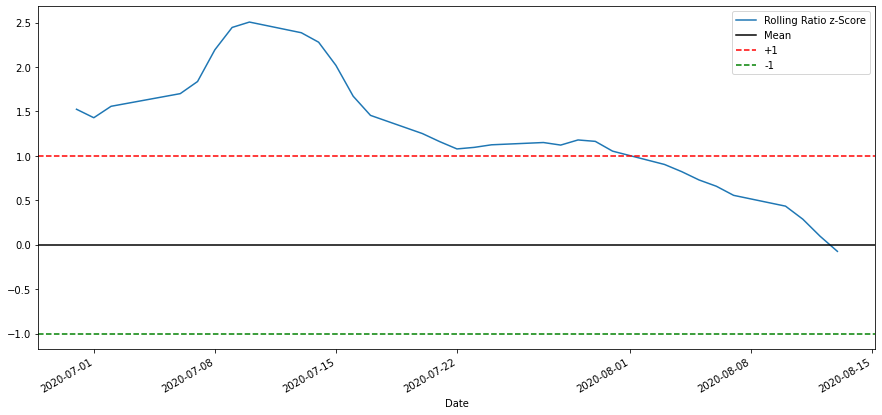

In [ ]:
 
# Take a rolling 60 day standard deviation
std_60 = train.rolling(window=60,center=False).std()
std_60.name = 'std 60d'
 
# Compute the z score for each day
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
zscore_60_5.name = 'z-score'
 
plt.figure(figsize=(15,7))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

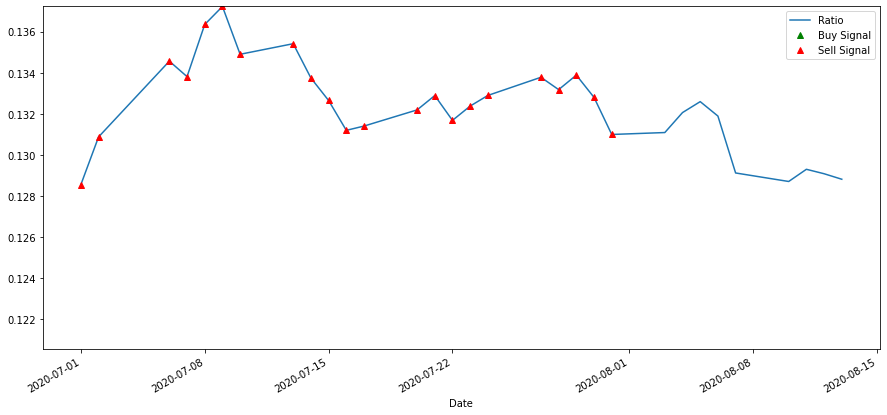

In [ ]:
 # Plot the ratios and buy and sell signals from z score
plt.figure(figsize=(15,7))
 
train[60:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

In [ ]:
 # Plot the prices and buy and sell signals from z score
plt.figure(figsize=(18,9))
S1 = data1['VWO'].iloc[:92]
S2 = data1['SPY'].iloc[:92]
 
S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()
 
# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]
 
buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))
 
plt.legend(['VWO','SPY', 'Buy Signal', 'Sell Signal'])
plt.show()

Let’s see what kind of profits this signal can generate. We write a simple backtester which buys 1 ratio (buy 1 VWO stock and sell ratio x SPY stock) when ratio is low, sell 1 ratio (sell 1 VWO stock and buy ratio x SPY stock) when it’s high and calculate PnL of these trades

In [ ]:
 
# Let's see the profits with a simple backtester
def trade(S1, S2, window1, window2):
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
        # Buy long if the z-score is < 1
        elif zscore[i] < -1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.5:
            money += countS1*S1[i] + S2[i] * countS2
            countS1 = 0
            countS2 = 0
#         print('Z-score: '+ str(zscore[i]), countS1, countS2, S1[i] , S2[i])
    return money
 
 
trade(data1['VWO'].iloc[:92], data1['SPY'].iloc[:92], 5, 60)

31.456213835186745

 The strategy seems profitable! Now we can optimize further by changing our moving average windows, by changing the thresholds for buy/sell and exit positions etc and check for performance improvements on validation data. We could also try more sophisticated models like Logistic Regression, SVM etc to make our 1/-1 predictions.
 
Let's see how it does on test data

In [ ]:
 
 
trade(data1['VWO'].iloc[92:], data1['SPY'].iloc[92:], 5, 90)

0

 
Profits again! Well not quite however no loss during Q3 on Q2 data.
 
Avoid Overfitting:
 
Overfitting is the most dangerous pitfall of a trading strategy. In our model, we used rolling parameter estimates and may wish to optimize window length. We can simply iterate over all possible, reasonable window lengths and pick the length based on which our model performs the best . Below we write a simple loop to score window lengths based on pnl of training data and find the best one.

In [ ]:
 # Find the window length 0-254 
# that gives the highest returns using this strategy
length_scores = [trade(data1['VWO'].iloc[:92], 
                data1['SPY'].iloc[:92], 5, l) 
                for l in range(255)]
best_length = np.argmax(length_scores)
print ('Best window length:', best_length)

Best window length: 57


 Now we check the performance of our model on test data and we find that this window length is far from optimal! This is because our original choice was clearly overfitted to the sample data.

In [ ]:
 
# Find the returns for test data
# using what we think is the best window length
length_scores2 = [trade(data1['VWO'].iloc[92:], 
                  data1['SPY'].iloc[92:],5, l) 
                  for l in range(255)]
print (best_length, 'day window:', length_scores2[best_length])
 
# Find the best window length based on this dataset, 
# and the returns using this window length
best_length2 = np.argmax(length_scores2)
print (best_length2, 'day window:', length_scores2[best_length2])

57 day window: 0
19 day window: 7.91068766632349


 
 
We can see this if we also plot Pnl by window length separately for traning and test data.

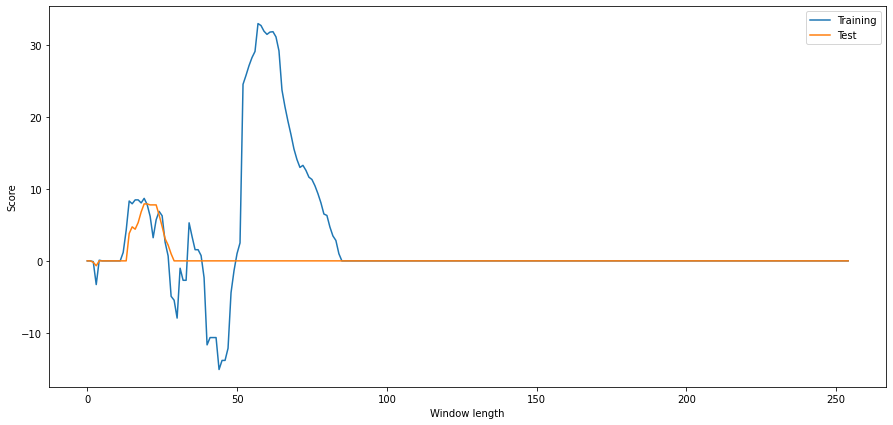

In [ ]:
 
plt.figure(figsize=(15,7))
plt.plot(length_scores)
plt.plot(length_scores2)
plt.xlabel('Window length')
plt.ylabel('Score')
plt.legend(['Training', 'Test'])
plt.show()

#### Q3 and Q4 data: Cointegration - Pairs Trading

0.3955125370664432


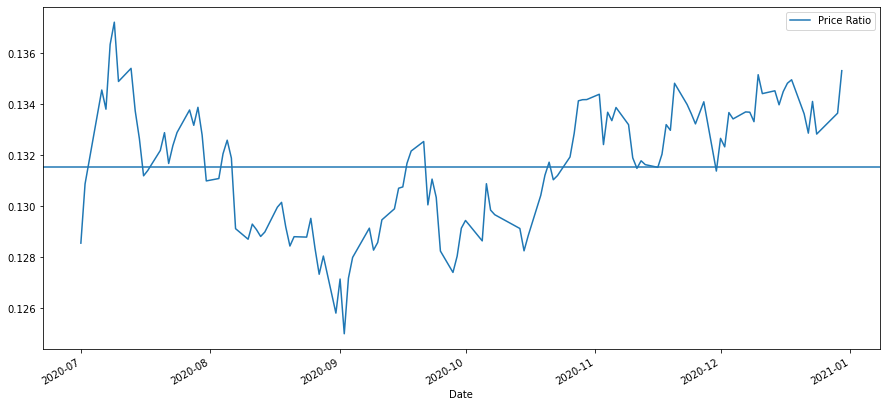

In [ ]:
data2 = df3
# Let's take a look at the prices of ___ to make sure there's nothing weird going on.
S1 = data2['VWO']
S2 = data2['SPY']
score, pvalue, _ = coint(S1, S2)
print(pvalue)
ratios = S1 / S2
ratios.plot(figsize=(15,7))
plt.axhline(ratios.mean(),color="red")
plt.legend(['Price Ratio','Mean Price Ratio'])
plt.show()

The ratio does look like it moved around a stable mean.The absolute ratio isn’t very useful in statistical terms. It is more helpful to normalize our signal by treating it as a z-score. Z score is defined as:
Z Score (Value) = (Value — Mean) / Standard Deviation

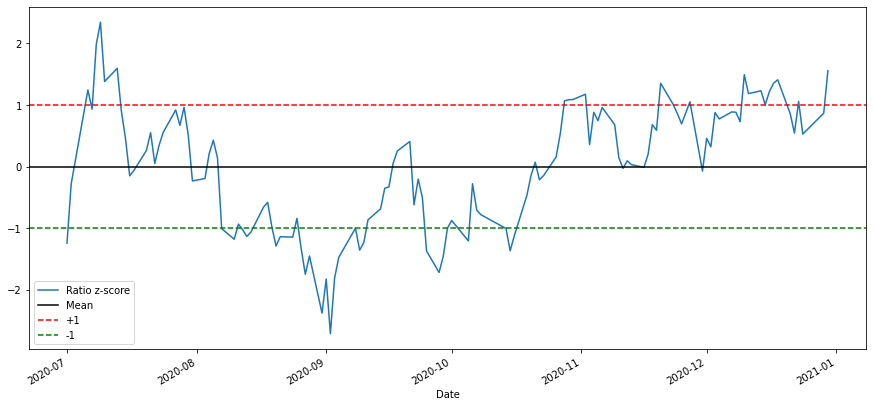

In [ ]:
 
# Zscore
def zscore(series):
    return (series - series.mean()) / np.std(series)
 
 
# Let's run the Zscore code:
zscore(ratios).plot(figsize=(15,7))
plt.axhline(zscore(ratios).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.show()

123


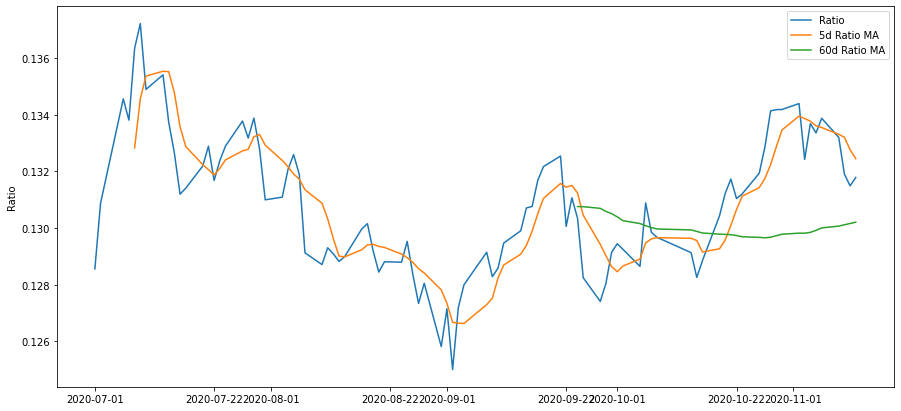

In [ ]:
 
ratios = data2['VWO'] / data2['SPY']
print(len(ratios))
train = ratios[:92] #Q3 has 92 days
test = ratios[92:] # Q4 has 92 days
 
# Run the ratios:
ratios_mavg5 = train.rolling(window=5,
                               center=False).mean()
 
ratios_mavg60 = train.rolling(window=60,
                               center=False).mean()
 
std_60 = train.rolling(window=60,
                        center=False).std()
 
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(15,7))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
 
plt.legend(['Ratio','5d Ratio MA', '60d Ratio MA'])
 
plt.ylabel('Ratio')
plt.show()

Let's take a look at the z scores to see if it's a good idea to trade.

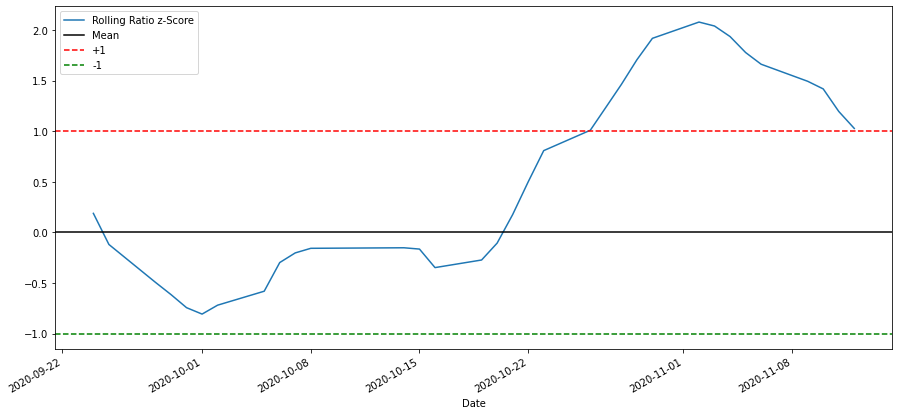

In [ ]:
 
# Take a rolling 60 day standard deviation
std_60 = train.rolling(window=60,center=False).std()
std_60.name = 'std 60d'
 
# Compute the z score for each day
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
zscore_60_5.name = 'z-score'
 
plt.figure(figsize=(15,7))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

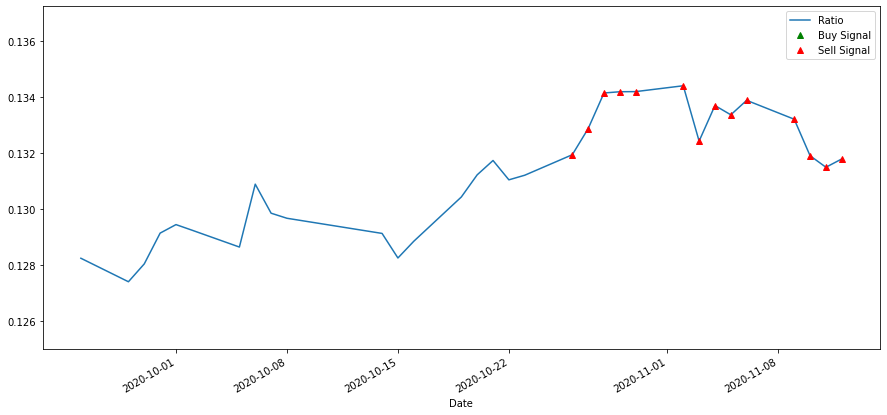

In [ ]:
 # Plot the ratios and buy and sell signals from z score
plt.figure(figsize=(15,7))
 
train[60:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

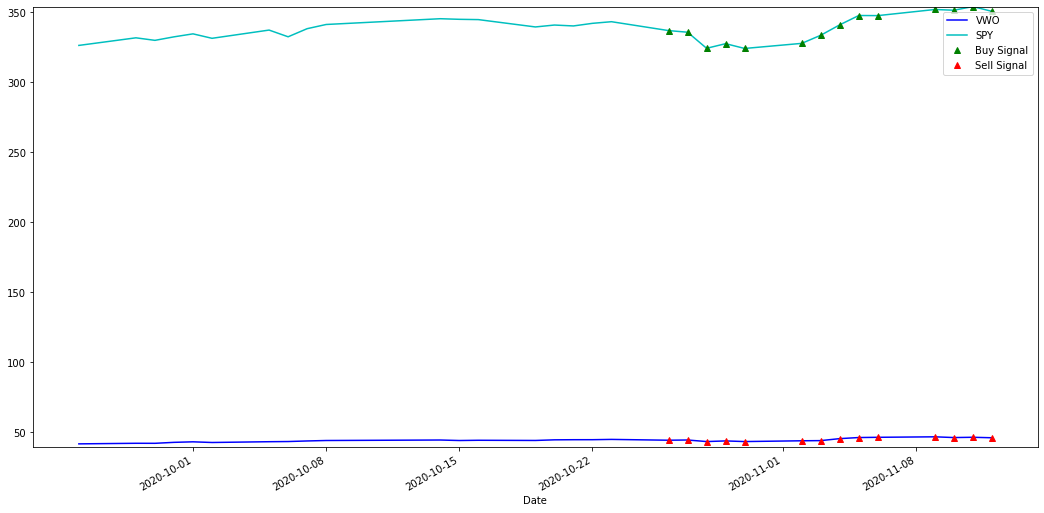

In [ ]:
 # Plot the prices and buy and sell signals from z score
plt.figure(figsize=(18,9))
S1 = data2['VWO'].iloc[:92]
S2 = data2['SPY'].iloc[:92]
 
S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()
 
# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]
 
buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))
 
plt.legend(['VWO','SPY', 'Buy Signal', 'Sell Signal'])
plt.show()

In [ ]:
 
# Let's see the profits with a simple backtester
def trade(S1, S2, window1, window2):
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
        # Buy long if the z-score is < 1
        elif zscore[i] < -1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.5:
            money += countS1*S1[i] + S2[i] * countS2
            countS1 = 0
            countS2 = 0
#         print('Z-score: '+ str(zscore[i]), countS1, countS2, S1[i] , S2[i])
    return money
 
 
trade(data['VWO'].iloc[:92], data['SPY'].iloc[:92], 5, 60)

31.456213835186745

The strategy also seems profitable! Now we can optimize further by changing our moving average windows, by changing the thresholds for buy/sell and exit positions etc and check for performance improvements on validation data. We could also try more sophisticated models like Logistic Regression, SVM etc to make our 1/-1 predictions.
Let's see how it does on test data

In [ ]:
 trade(data2['VWO'].iloc[92:], data2['SPY'].iloc[92:], 5, 90)

0

In [ ]:
# Next let's check for over fitting and best window.
# Find the window length 0-254 
# that gives the highest returns using this strategy
length_scores = [trade(data2['VWO'].iloc[:92], 
                data2['SPY'].iloc[:92], 5, l) 
                for l in range(255)]
best_length = np.argmax(length_scores)
print ('Best window length:', best_length)

Best window length: 22


In [ ]:
 
# Find the returns for test data
# using what we think is the best window length
length_scores2 = [trade(data2['VWO'].iloc[92:], 
                  data2['SPY'].iloc[92:],5, l) 
                  for l in range(255)]
print (best_length, 'day window:', length_scores2[best_length])
 
# Find the best window length based on this dataset, 
# and the returns using this window length
best_length2 = np.argmax(length_scores2)
print (best_length2, 'day window:', length_scores2[best_length2])

22 day window: 0.5973244482987354
21 day window: 0.5973244482987354


And finally let's plot to see the PnL by window.

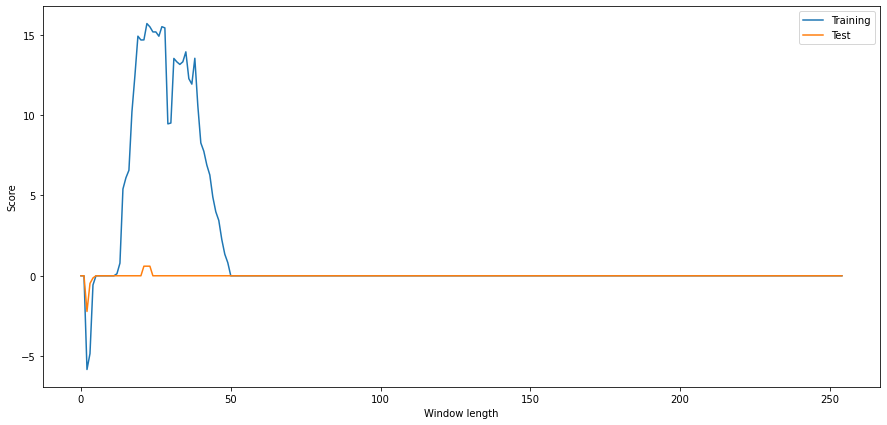

In [ ]:
 
plt.figure(figsize=(15,7))
plt.plot(length_scores)
plt.plot(length_scores2)
plt.xlabel('Window length')
plt.ylabel('Score')
plt.legend(['Training', 'Test'])
plt.show()

7.7. The 3rd strategy should attempt to include an error-correction model (ECM).  This will only work if there is cointegration in the previous part.
 
7.8. Now you have a total of 8 models (including 5 from the previous 2 questions).  Which of the 8 models do you prefer? Explain in quantitative terms

###7.7 Category 3 Models: 3rd strategy error-correction model (ECM)

In [ ]:
#Install dependedependencies 
!pip install statsmodels  


In [ ]:
import os
import pandas as pd
from pandas.plotting import lag_plot
from pandas import datetime
import numpy as np
import random
import itertools
import yfinance as yf
from arch import arch_model
import pmdarima as pm
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,cross_val_score, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score,precision_recall_curve, average_precision_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,matthews_corrcoef
from scipy.stats import shapiro
from scipy.stats import probplot
import scipy.stats as stats
from statsmodels.tsa import stattools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.stats.diagnostic import het_arch, acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [ ]:
import yfinance as yf
 # download, create returns and 
ticker = ['VWO','GOLD.AX']
df = yf.download(ticker,                    
                     start='2020-04-01',
                     end='2020-12-31',
                     progress=False)['Adj Close']
 
df.dropna(inplace = True)
  
Q2_df = df.loc['2020-04-01':'2020-06-30']
Q3_df = df.loc['2020-07-01':'2020-09-30']
Q4_df = df.loc['2020-10-01':'2020-12-31']

# Q2 adds 3 month lags for the assets
for i in range(1, 2):
    new_col = 'VWO_l' + str(i)
    Q2_df[new_col] = Q2_df['VWO'].shift(i)
    new_col = 'GOLD.AX_l' + str(i)
    Q2_df[new_col] = Q2_df['GOLD.AX'].shift(i)

# Q3 adds 3 month lags for the assets
for i in range(1, 2):
    new_col = 'VWO_l' + str(i)
    Q3_df[new_col] = Q3_df['VWO'].shift(i)
    new_col = 'GOLD.AX_l' + str(i)
    Q3_df[new_col] = Q3_df['GOLD.AX'].shift(i)

# Q4 adds 3 month lags for the assets
for i in range(1, 2):
    new_col = 'VWO_l' + str(i)
    Q4_df[new_col] = Q4_df['VWO'].shift(i)
    new_col = 'GOLD.AX_l' + str(i)
    Q4_df[new_col] = Q4_df['GOLD.AX'].shift(i)

# creates testing and training data sets after dropping missing values
Q2_df = Q2_df.dropna()
Q3_df = Q3_df.dropna()
Q4_df = Q4_df.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
#Stationarity test Q2
print("Stationarity test Q2:")
a = sm.tsa.adfuller(Q2_df['VWO'])
b = sm.tsa.adfuller(Q2_df['GOLD.AX'])
print("VWO stationarity",a)
print("GOLD.AX stationarity",b)
#First-order differential stationarity
a = sm.tsa.adfuller(Q2_df['VWO'].diff().dropna())
b = sm.tsa.adfuller(Q2_df['GOLD.AX'].diff().dropna())
print("VWO First Order Differential Stationarity",a)
print("GOLD.AX First Order Differential Stationarity",b)
print("")

#Stationarity test Q3
print("Stationarity test Q3:")
a = sm.tsa.adfuller(Q3_df['VWO'])
b = sm.tsa.adfuller(Q3_df['GOLD.AX'])
print("VWO stationarity",a)
print("GOLD.AX stationarity",b)
#First-order differential stationarity
a = sm.tsa.adfuller(Q3_df['VWO'].diff().dropna())
b = sm.tsa.adfuller(Q3_df['GOLD.AX'].diff().dropna())
print("VWO First Order Differential Stationarity",a)
print("GOLD.AX First Order Differential Stationarity",b)
print("")

#Stationarity test Q4
print("Stationarity test Q4:")
a = sm.tsa.adfuller(Q4_df['VWO'])
b = sm.tsa.adfuller(Q4_df['GOLD.AX'])
print("VWO stationarity",a)
print("GOLD.AX stationarity",b)
#First-order differential stationarity
a = sm.tsa.adfuller(Q4_df['VWO'].diff().dropna())
b = sm.tsa.adfuller(Q4_df['GOLD.AX'].diff().dropna())
print("VWO First Order Differential Stationarity",a)
print("GOLD.AX First Order Differential Stationarity",b)

Stationarity test Q2:
VWO stationarity (-1.6574946461864626, 0.4531347359427966, 1, 58, {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}, 88.18811786171767)
GOLD.AX stationarity (-1.5687865006114972, 0.4992514381589398, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 242.60291296663286)
VWO First Order Differential Stationarity (-10.097200493712919, 1.0829761369326724e-17, 0, 58, {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}, 86.20844367720412)
GOLD.AX First Order Differential Stationarity (-8.005293535468269, 2.276290416546309e-12, 0, 58, {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}, 239.71762838973376)

Stationarity test Q3:
VWO stationarity (-4.0009436360877615, 0.001405578150019799, 0, 62, {'1%': -3.540522678829176, '5%': -2.9094272025108254, '10%': -2.5923136524453696}, 61.36016728654198)
GOLD.AX stationarity (-2.0264931727409334, 0.27507891

In [ ]:
#Cointegration test
from statsmodels.tsa.stattools import coint

#Q2
print(coint(Q2_df['VWO'],Q2_df['GOLD.AX']))

#Q3
print(coint(Q3_df['VWO'],Q3_df['GOLD.AX']))

#Q4
print(coint(Q4_df['VWO'],Q4_df['GOLD.AX']))

(-3.2959239191245433, 0.05529660599576618, array([-4.09169685, -3.44165109, -3.11711613]))
(-4.05954856960929, 0.005895156727380597, array([-4.08180545, -3.43645497, -3.11356405]))
(-3.972943303536774, 0.007845355373121643, array([-4.08828472, -3.43986028, -3.11589222]))


It is clear that we reject the null hypohypothesis for Q2, Q3 and Q4 against the alternative for cointegration.

“nc” : no constant, no trend.

“c” : constant only (default).

“ct” : constant and trend.

**ECM**

In the ECM, the error-correction expression must be negative. The linear regression's lagged residuals reflect the previous period's divergence from the long-run relationship. If our stock price rises past its long-run equilibrium with the other asset, the negative coefficient forces it back down, according to the theory. If it falls below the long-run equilibrium, the negatives will balance out, causing the stock price to rise again.

####Q2 to evaluate performance in Q3

In [ ]:
my_data_test = Q3_df
my_data_train = Q2_df #Q2_df[~Q2_df.isin(my_data_test).all(1)]

                            OLS Regression Results                            
Dep. Variable:                    VWO   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           1.11e-18
Time:                        21:05:23   Log-Likelihood:                -95.659
No. Observations:                  60   AIC:                             195.3
Df Residuals:                      58   BIC:                             199.5
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.3562      4.410     21.169      0.0

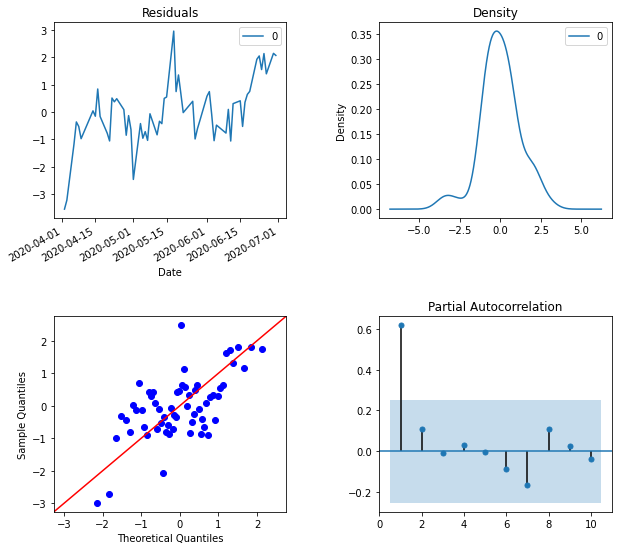

In [ ]:
#Testing for Cointegration Using Engel-Granger Approach

# adds a constant term
my_data_train = sm.add_constant(my_data_train)
# estimates a linear regression of the closing share price on the lagged closing market level
lr_model = sm.OLS(my_data_train.VWO, my_data_train[['const', 'GOLD.AX']])
lr_model_fit = lr_model.fit(cov_type='HC0')
# prints a summary
print(lr_model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(lr_model_fit.resid)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.4, hspace=.5)
residuals.plot(title="Residuals", ax=ax1)
residuals.plot(kind='kde', title='Density', ax=ax2)
sm.qqplot(residuals,fit=True, line="45",ax=ax3)
plot_pacf(residuals,lags=10, zero=False, ax=ax4)
plt.show()

In [ ]:
#ADF test on the residuals
for i in ['nc', 'c', 'ct']:
    result = adfuller(lr_model_fit.resid, regression = i)
    print('ADF Statistic with %s for Closing my_stock_train price: %f' % (i, result[0]))
    print('p-value: %f' % result[1])
    print('')

ADF Statistic with nc for Closing my_stock_train price: -3.295924
p-value: 0.000993

ADF Statistic with c for Closing my_stock_train price: -3.287268
p-value: 0.015457

ADF Statistic with ct for Closing my_stock_train price: -3.700127
p-value: 0.022349



In [ ]:
# attaches the residuals to the training data set and shifts them down be one to get them alligned properly to be the
# lagged residuals of the linear model in the ECM

my_data_train['disequilibrium'] = lr_model_fit.resid
my_data_train.disequilibrium = my_data_train.disequilibrium.shift(1)

In [ ]:
# creates a copy of the training data

diff_train = my_data_train.copy()
# for i in the list of columns I want to difference...
for i in ['VWO', 'VWO_l1','GOLD.AX_l1']:
    # difference column i
    diff_train[i] = diff_train[i].diff()
# drop the first row because you lose a row when differencing; you can't difference a row without a prior observation
diff_train = diff_train.dropna()

# creates a list of predictors for easy referencing
predictors = ['VWO_l1', 'GOLD.AX_l1','disequilibrium', 'const']


# estimates a linear regression of the closing share price on the lagged closing market level
ecm_train = sm.OLS(diff_train.VWO, diff_train[predictors])
ecm_train_fit = ecm_train.fit(cov_type='HC0')

# prints a summary
print(ecm_train_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    VWO   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     3.272
Date:                Sat, 24 Apr 2021   Prob (F-statistic):             0.0278
Time:                        21:05:52   Log-Likelihood:                -52.348
No. Observations:                  59   AIC:                             112.7
Df Residuals:                      55   BIC:                             121.0
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
VWO_l1            -0.2643      0.106     -2.

In [ ]:
# looks at the performance of the 3 lag autoregressive model

# creates a list of autoregressive predictors
ar_predictors = ['VWO_l1', 'const']

# estimates a linear regression of the closing share price on the lagged closing market level
ar_train = sm.OLS(diff_train.VWO, diff_train[ar_predictors])
ar_train_fit = ar_train.fit()

# prints a summary
print(ar_train_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    VWO   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     5.730
Date:                Sat, 24 Apr 2021   Prob (F-statistic):             0.0200
Time:                        21:06:04   Log-Likelihood:                -53.020
No. Observations:                  59   AIC:                             110.0
Df Residuals:                      57   BIC:                             114.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
VWO_l1        -0.2986      0.125     -2.394      0.0

In [ ]:
#Out of sample, validation for Q3
diff_data = Q2_df.copy()
diff_data = diff_data.diff().dropna() 
diff_data = sm.add_constant(diff_data)
diff_train = diff_data

diff_data = Q3_df.copy()
diff_data = diff_data.diff().dropna() 
diff_data = sm.add_constant(diff_data)
diff_test = diff_data

my_data_train = sm.add_constant(Q2_df)
my_data_test = sm.add_constant(Q3_df)

predictors = ['VWO_l1', 'GOLD.AX_l1','disequilibrium', 'const']

In [ ]:
# defines a function to perform rolling forecasts with a ECM and intakes a y_var as a string
# X_vars as a list, lr_X_vars as a list, and the rest of the inputs are dataframes, with lr_
# indicating level variables used to estimate the long-run relationship, and diff_ representing
# differenced data
def roll_forecast_ecm(y_var, X_vars, lr_X_vars, lr_train, lr_test, diff_train, diff_test):

    # creates two new dataframes that will be added to as the forecast rolls 
    history = lr_train
    diff_history = diff_train
    
    # estimates a linear model to predict the longrun relationship
    lr_model_train = sm.OLS(history[[y_var]], history[lr_X_vars])
    # fits the lr model
    lr_model_train_fit = lr_model_train.fit(cov_type='HC0')
    # adds a disequilibrium column for the training period
    diff_train['disequilibrium'] = lr_model_train_fit.resid.shift(1)
    
    # this chunk of data does one-step ahead predictions of the disequilibrium    
    
    # creates an empty list that will hold the residuals for the next period
    disequilibrium = []

    # loops through the indexes of the set being forecasted
    for i in range(1,len(lr_test)):
        
        # estimates a linear model to predict the longrun relationship
        lr_model = sm.OLS(history[[y_var]], history[lr_X_vars])
        # fits the lr model
        lr_model_fit = lr_model.fit(cov_type='HC0')
        # forecasts the disequilibrium in the next period and appends it to the list by predicting 
        # the closing price using the 1st lagged value of the independent variable at t+1, which makes it
        # at time t, and subtracting the closing price at time t, giving the residual for time t, which is 
        # t - 1 for the future value we want to predict
        disequilibrium_hat = (float(lr_model_fit.predict(history[-1:][lr_X_vars]))
                             - float(history[-1:].VWO.values))
        disequilibrium.append(disequilibrium_hat)
        # grabs the observation at the ith index
        obs = lr_test[i : i + 1]
        # appends the observation to the estimation data set
        history = history.append(obs)
        
    # creates a column of the lagged disequilibrium values
    diff_test['disequilibrium'] = disequilibrium
    
    # this chunk of code does the 1-step ahead ECM estimation and prediction
    predictions = []
    
    # this list will store the error_correction coefficients  
    error_correction_coefficients = []
    # this list stores the standard error of the EC coefficients
    error_correction_coef_stderr = []

    # loops through the indexes of the set being forecasted
    for i in range(len(diff_test)):
        
        # estimates an ECM to predict future values
        ecm_model = sm.OLS(diff_history[[y_var]], diff_history[X_vars])
        # fits the ECM
        ecm_model_fit = ecm_model.fit(cov_type='HC0')
        # predicts the future closing price change and appends it to the list of predictions
        delta_y_hat = float(ecm_model_fit.predict(diff_test[i : i + 1][X_vars]))
        predictions.append(delta_y_hat)
        # grabs the observation at the ith index
        obs = diff_test[i : i + 1]
        # appends the observation to the estimation data set
        diff_history = diff_history.append(obs)
        
        # appends the error_correction coefficient to the list  
        error_correction_coefficients.append(ecm_model_fit.params.disequilibrium)
        error_correction_coef_stderr.append(ecm_model_fit.HC0_se.disequilibrium)
    
    # adds columns for our lists
    diff_test['delta_y_hat'] = predictions     
    diff_test['ec_coef'] = error_correction_coefficients
    diff_test['ec_stderr'] = error_correction_coef_stderr
    
    # returns predictions
    return(diff_test, ecm_model_fit)

In [ ]:
# defines a function to perform rolling forecasts with a auto-regressive model and intakes a y_var as a string
# X_vars as a list, lr_X_vars as a list, and the rest of the inputs are dataframes of differenced values
def roll_forecast_ar(y_var, X_vars, diff_train, diff_test):
    
    # creates two new dataframes that will be added to as the forecast rolls 
    diff_history = diff_train
    
    # this chunk of code does the 1-step ahead AR estimation and prediction
    
    predictions = []
  
    # loops through the indexes of the set being forecasted
    for i in range(len(diff_test)):
        
        # estimates an AR to predict future values
        ar_model = sm.OLS(diff_history[[y_var]], diff_history[X_vars])
        # fits the AR
        ar_model_fit = ar_model.fit(cov_type='HC0')
        # predicts the future closing price change and appends it to the list of predictions
        delta_y_hat = float(ar_model_fit.predict(diff_test[i : i + 1][X_vars]))
        predictions.append(delta_y_hat)
        # grabs the observation at the ith index
        obs = diff_test[i : i + 1]
        # appends the observation to the estimation data set
        diff_history = diff_history.append(obs)
    
    diff_test['delta_y_hat'] = predictions     
    
    # returns predictions
    return(diff_test, ar_model_fit)

In [ ]:
(y_var, X_vars, lr_X_vars, lr_train, lr_test, diff_train, diff_test) = ('VWO', 
                                                                        predictors, 
                                                                        ['GOLD.AX', 'const'], 
                                                                        my_data_train.dropna(), 
                                                                        my_data_test.dropna() , 
                                                                        diff_train, 
                                                                        diff_test)      

ecm_results = roll_forecast_ecm(y_var, X_vars, lr_X_vars, lr_train, lr_test, diff_train, diff_test)

print('Mean Absolute Error over Test Data Set: ' + 
      str(sum(abs(ecm_results[0].VWO - ecm_results[0].delta_y_hat)) / len(ecm_results[0])))
print('')
print(ecm_results[1].summary())

Mean Absolute Error over Test Data Set: 0.4496769998679359

                            OLS Regression Results                            
Dep. Variable:                    VWO   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     2.798
Date:                Sat, 24 Apr 2021   Prob (F-statistic):             0.0432
Time:                        21:07:51   Log-Likelihood:                -99.396
No. Observations:                 120   AIC:                             206.8
Df Residuals:                     116   BIC:                             217.9
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------

In [ ]:
ar_results = roll_forecast_ar(y_var, ['VWO_l1'], diff_train, diff_test)

print('Mean Absolute Error over Test Data Set: ' + 
      str(sum(abs(ar_results[0].VWO - ar_results[0].delta_y_hat)) / len(ar_results[0])))
print('')
print(ar_results[1].summary())

Mean Absolute Error over Test Data Set: 0.4059305003362771

                                 OLS Regression Results                                
Dep. Variable:                    VWO   R-squared (uncentered):                   0.039
Model:                            OLS   Adj. R-squared (uncentered):              0.031
Method:                 Least Squares   F-statistic:                              4.747
Date:                Sat, 24 Apr 2021   Prob (F-statistic):                      0.0313
Time:                        21:07:57   Log-Likelihood:                         -101.13
No. Observations:                 120   AIC:                                      204.3
Df Residuals:                     119   BIC:                                      207.1
Df Model:                           1                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      

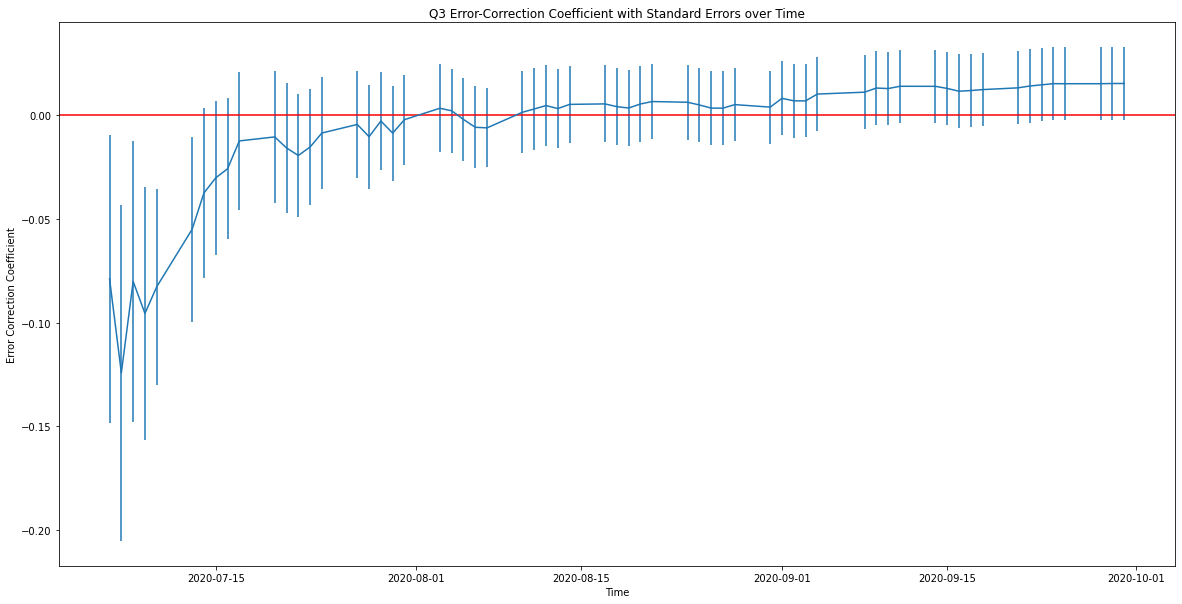

In [ ]:
plt.figure(figsize=(20,10))
plt.errorbar(ecm_results[0].index, ecm_results[0].ec_coef, yerr = ecm_results[0].ec_stderr)
plt.axhline(color = 'r')
plt.title('Q3 Error-Correction Coefficient with Standard Errors over Time')
plt.xlabel('Time')
plt.ylabel('Error Correction Coefficient')
plt.show()

####Q3 to evaluate performance in Q4

In [ ]:
my_data_test = Q4_df
my_data_train = Q3_df

                            OLS Regression Results                            
Dep. Variable:                    VWO   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           1.11e-18
Time:                        21:08:43   Log-Likelihood:                -95.659
No. Observations:                  60   AIC:                             195.3
Df Residuals:                      58   BIC:                             199.5
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.3562      4.410     21.169      0.0

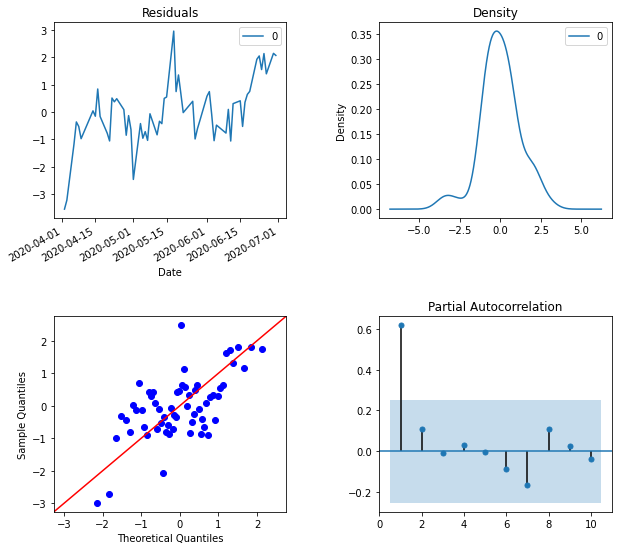

In [ ]:
#Testing for Cointegration Using Engel-Granger Approach

# adds a constant term
my_data_train = sm.add_constant(my_data_train)
# estimates a linear regression of the closing share price on the lagged closing market level
lr_model = sm.OLS(my_data_train.VWO, my_data_train[['const', 'GOLD.AX']])
lr_model_fit = lr_model.fit(cov_type='HC0')
# prints a summary
print(lr_model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(lr_model_fit.resid)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.4, hspace=.5)
residuals.plot(title="Residuals", ax=ax1)
residuals.plot(kind='kde', title='Density', ax=ax2)
sm.qqplot(residuals,fit=True, line="45",ax=ax3)
plot_pacf(residuals,lags=10, zero=False, ax=ax4)
plt.show()

In [ ]:
#ADF test on the residuals
for i in ['nc', 'c', 'ct']:
    result = adfuller(lr_model_fit.resid, regression = i)
    print('ADF Statistic with %s for Closing my_stock_train price: %f' % (i, result[0]))
    print('p-value: %f' % result[1])
    print('')

ADF Statistic with nc for Closing my_stock_train price: -3.295924
p-value: 0.000993

ADF Statistic with c for Closing my_stock_train price: -3.287268
p-value: 0.015457

ADF Statistic with ct for Closing my_stock_train price: -3.700127
p-value: 0.022349



In [ ]:
# attaches the residuals to the training data set and shifts them down be one to get them alligned properly to be the
# lagged residuals of the linear model in the ECM

my_data_train['disequilibrium'] = lr_model_fit.resid
my_data_train.disequilibrium = my_data_train.disequilibrium.shift(1)

In [ ]:
# creates a copy of the training data

diff_train = my_data_train.copy()
# for i in the list of columns I want to difference...
for i in ['VWO', 'VWO_l1','GOLD.AX_l1']:
    # difference column i
    diff_train[i] = diff_train[i].diff()
# drop the first row because you lose a row when differencing; you can't difference a row without a prior observation
diff_train = diff_train.dropna()

# creates a list of predictors for easy referencing
predictors = ['VWO_l1', 'GOLD.AX_l1','disequilibrium', 'const']


# estimates a linear regression of the closing share price on the lagged closing market level
ecm_train = sm.OLS(diff_train.VWO, diff_train[predictors])
ecm_train_fit = ecm_train.fit(cov_type='HC0')

# prints a summary
print(ecm_train_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    VWO   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     3.272
Date:                Sat, 24 Apr 2021   Prob (F-statistic):             0.0278
Time:                        21:09:11   Log-Likelihood:                -52.348
No. Observations:                  59   AIC:                             112.7
Df Residuals:                      55   BIC:                             121.0
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
VWO_l1            -0.2643      0.106     -2.

In [ ]:
# looks at the performance of the 3 lag autoregressive model

# creates a list of autoregressive predictors
ar_predictors = ['VWO_l1', 'const']

# estimates a linear regression of the closing share price on the lagged closing market level
ar_train = sm.OLS(diff_train.VWO, diff_train[ar_predictors])
ar_train_fit = ar_train.fit()

# prints a summary
print(ar_train_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    VWO   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     5.730
Date:                Sat, 24 Apr 2021   Prob (F-statistic):             0.0200
Time:                        21:09:22   Log-Likelihood:                -53.020
No. Observations:                  59   AIC:                             110.0
Df Residuals:                      57   BIC:                             114.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
VWO_l1        -0.2986      0.125     -2.394      0.0

In [ ]:
#Out of sample, validation for Q3
diff_data = Q3_df.copy()
diff_data = diff_data.diff().dropna() 
diff_data = sm.add_constant(diff_data)
diff_train = diff_data

diff_data = Q4_df.copy()
diff_data = diff_data.diff().dropna() 
diff_data = sm.add_constant(diff_data)
diff_test = diff_data

my_data_train = sm.add_constant(Q3_df)
my_data_test = sm.add_constant(Q4_df)

predictors = ['VWO_l1', 'GOLD.AX_l1','disequilibrium', 'const']

In [ ]:
# defines a function to perform rolling forecasts with a ECM and intakes a y_var as a string
# X_vars as a list, lr_X_vars as a list, and the rest of the inputs are dataframes, with lr_
# indicating level variables used to estimate the long-run relationship, and diff_ representing
# differenced data
def roll_forecast_ecm(y_var, X_vars, lr_X_vars, lr_train, lr_test, diff_train, diff_test):

    # creates two new dataframes that will be added to as the forecast rolls 
    history = lr_train
    diff_history = diff_train
    
    # estimates a linear model to predict the longrun relationship
    lr_model_train = sm.OLS(history[[y_var]], history[lr_X_vars])
    # fits the lr model
    lr_model_train_fit = lr_model_train.fit(cov_type='HC0')
    # adds a disequilibrium column for the training period
    diff_train['disequilibrium'] = lr_model_train_fit.resid.shift(1)
    
    # this chunk of data does one-step ahead predictions of the disequilibrium    
    
    # creates an empty list that will hold the residuals for the next period
    disequilibrium = []

    # loops through the indexes of the set being forecasted
    for i in range(1,len(lr_test)):
        
        # estimates a linear model to predict the longrun relationship
        lr_model = sm.OLS(history[[y_var]], history[lr_X_vars])
        # fits the lr model
        lr_model_fit = lr_model.fit(cov_type='HC0')
        # forecasts the disequilibrium in the next period and appends it to the list by predicting 
        # the closing price using the 1st lagged value of the independent variable at t+1, which makes it
        # at time t, and subtracting the closing price at time t, giving the residual for time t, which is 
        # t - 1 for the future value we want to predict
        disequilibrium_hat = (float(lr_model_fit.predict(history[-1:][lr_X_vars]))
                             - float(history[-1:].VWO.values))
        disequilibrium.append(disequilibrium_hat)
        # grabs the observation at the ith index
        obs = lr_test[i : i + 1]
        # appends the observation to the estimation data set
        history = history.append(obs)
        
    # creates a column of the lagged disequilibrium values
    diff_test['disequilibrium'] = disequilibrium
    
    # this chunk of code does the 1-step ahead ECM estimation and prediction
    predictions = []
    
    # this list will store the error_correction coefficients  
    error_correction_coefficients = []
    # this list stores the standard error of the EC coefficients
    error_correction_coef_stderr = []

    # loops through the indexes of the set being forecasted
    for i in range(len(diff_test)):
        
        # estimates an ECM to predict future values
        ecm_model = sm.OLS(diff_history[[y_var]], diff_history[X_vars])
        # fits the ECM
        ecm_model_fit = ecm_model.fit(cov_type='HC0')
        # predicts the future closing price change and appends it to the list of predictions
        delta_y_hat = float(ecm_model_fit.predict(diff_test[i : i + 1][X_vars]))
        predictions.append(delta_y_hat)
        # grabs the observation at the ith index
        obs = diff_test[i : i + 1]
        # appends the observation to the estimation data set
        diff_history = diff_history.append(obs)
        
        # appends the error_correction coefficient to the list  
        error_correction_coefficients.append(ecm_model_fit.params.disequilibrium)
        error_correction_coef_stderr.append(ecm_model_fit.HC0_se.disequilibrium)
    
    # adds columns for our lists
    diff_test['delta_y_hat'] = predictions     
    diff_test['ec_coef'] = error_correction_coefficients
    diff_test['ec_stderr'] = error_correction_coef_stderr
    
    # returns predictions
    return(diff_test, ecm_model_fit)

In [ ]:
# defines a function to perform rolling forecasts with a auto-regressive model and intakes a y_var as a string
# X_vars as a list, lr_X_vars as a list, and the rest of the inputs are dataframes of differenced values
def roll_forecast_ar(y_var, X_vars, diff_train, diff_test):
    
    # creates two new dataframes that will be added to as the forecast rolls 
    diff_history = diff_train
    
    # this chunk of code does the 1-step ahead AR estimation and prediction
    
    predictions = []
  
    # loops through the indexes of the set being forecasted
    for i in range(len(diff_test)):
        
        # estimates an AR to predict future values
        ar_model = sm.OLS(diff_history[[y_var]], diff_history[X_vars])
        # fits the AR
        ar_model_fit = ar_model.fit(cov_type='HC0')
        # predicts the future closing price change and appends it to the list of predictions
        delta_y_hat = float(ar_model_fit.predict(diff_test[i : i + 1][X_vars]))
        predictions.append(delta_y_hat)
        # grabs the observation at the ith index
        obs = diff_test[i : i + 1]
        # appends the observation to the estimation data set
        diff_history = diff_history.append(obs)
    
    diff_test['delta_y_hat'] = predictions     
    
    # returns predictions
    return(diff_test, ar_model_fit)

In [ ]:
(y_var, X_vars, lr_X_vars, lr_train, lr_test, diff_train, diff_test) = ('VWO', 
                                                                        predictors, 
                                                                        ['GOLD.AX', 'const'], 
                                                                        my_data_train.dropna(), 
                                                                        my_data_test.dropna() , 
                                                                        diff_train, 
                                                                        diff_test)      

ecm_results = roll_forecast_ecm(y_var, X_vars, lr_X_vars, lr_train, lr_test, diff_train, diff_test)

print('Mean Absolute Error over Test Data Set: ' + 
      str(sum(abs(ecm_results[0].VWO - ecm_results[0].delta_y_hat)) / len(ecm_results[0])))
print('')
print(ecm_results[1].summary())

Mean Absolute Error over Test Data Set: 0.4263140126138222

                            OLS Regression Results                            
Dep. Variable:                    VWO   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.045
Date:                Sat, 24 Apr 2021   Prob (F-statistic):              0.111
Time:                        21:11:09   Log-Likelihood:                -83.693
No. Observations:                 121   AIC:                             175.4
Df Residuals:                     117   BIC:                             186.6
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------

In [ ]:
ar_results = roll_forecast_ar(y_var, ['VWO_l1'], diff_train, diff_test)

print('Mean Absolute Error over Test Data Set: ' + 
      str(sum(abs(ar_results[0].VWO - ar_results[0].delta_y_hat)) / len(ar_results[0])))
print('')
print(ar_results[1].summary())

Mean Absolute Error over Test Data Set: 0.3933208003980308

                                 OLS Regression Results                                
Dep. Variable:                    VWO   R-squared (uncentered):                   0.019
Model:                            OLS   Adj. R-squared (uncentered):              0.011
Method:                 Least Squares   F-statistic:                              1.682
Date:                Sat, 24 Apr 2021   Prob (F-statistic):                       0.197
Time:                        21:11:17   Log-Likelihood:                         -86.294
No. Observations:                 121   AIC:                                      174.6
Df Residuals:                     120   BIC:                                      177.4
Df Model:                           1                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      

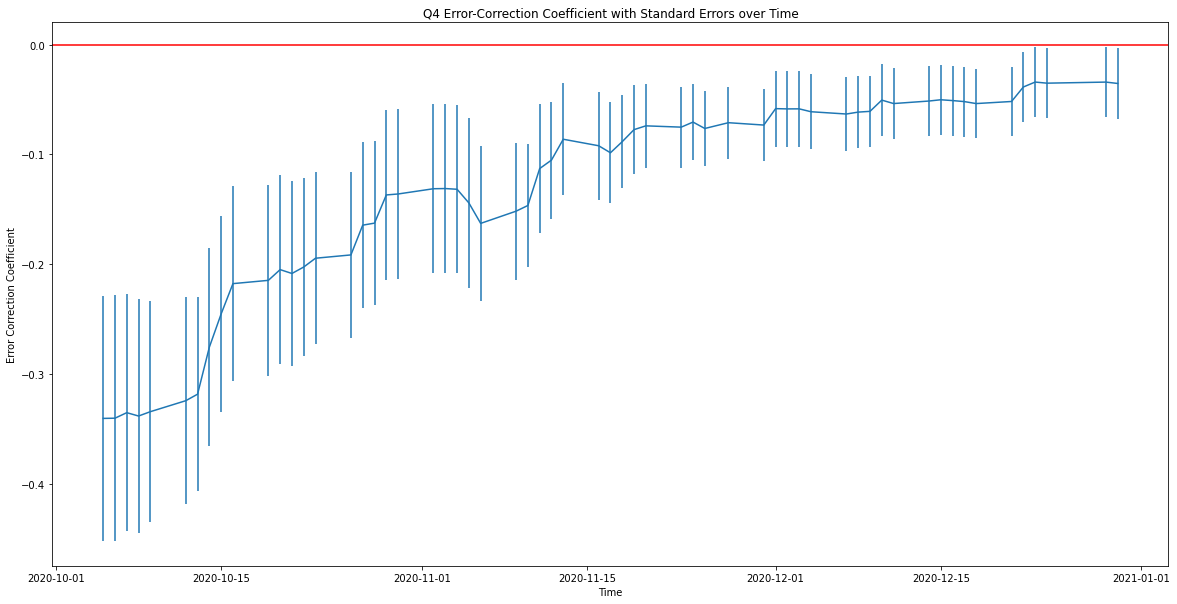

In [ ]:
plt.figure(figsize=(20,10))
plt.errorbar(ecm_results[0].index, ecm_results[0].ec_coef, yerr = ecm_results[0].ec_stderr)
plt.axhline(color = 'r')
plt.title('Q4 Error-Correction Coefficient with Standard Errors over Time')
plt.xlabel('Time')
plt.ylabel('Error Correction Coefficient')
plt.show()

The bigger $\gamma$, the faster adjustment to the long-run equilibrium (so-called speed of adjustment). From here, the long-run co-integration exists when $\gamma$ is less that 1 and has negative sign.
When the value of $\gamma > 1$, there will be no equilibrium.

From the plot we can conclude that we are losing co-integration in the long-run. Comparing the ECM with the AR(1), the ECM is not more informative than the AR(1) model.

As mentioned before, the amount of data is not sufficient to properly conclude or get some insights from the analysis.

###7.8 Now you have a total of 8 models (including 5 from the previous 2 questions) Which of the 8 models do you prefer? Explain in quantitative terms

From Category 1, we prefer the GARCH model. From a theoretical point of view, it makes more sense to model the volatility of a stock than the price of the stock. Similarly, with Category 2, we picked the MGARCH, which provides more information than a univariate GARCH model. Finally, for Category 3, we did not get a quantitative improvement from the results obtained in the VAR and ECM compared with an AR(1). Since we have mentioned that GARCH models are more suitable for predicting stock prices, we reiterate that the MGARCH will be part of our strategy.

On the other hand, we also obtained good results for the backtest in the paring strategy. Although, we consider that using alone the strategy is insufficient. Consequently, we propose a combination of the pair strategy and the MGARCH model from all eight models.



```
# This is formatted as code
```

##8. Combining the Models. 
 
8.1 Choosing the models you think worked well, assign relative weights to those.  
 
 
8.2 Derive an overall model that uses each selected model times its relative weight.
 
 
8.3 How does this combined model compare to the individual models?

##9. Discussion.
 
9.1 Write a 1-page report to the Trading Manager as to how your strategy works.  It must be non-technical
 
9.2 Write a 1-page report to the Quant Team Manager as to how your strategy works.  It must be technical.
 
9.3 Write a 1-page report that specifically explains how your group divided the work with details.
 
**2 Note: The PDF file with your answers to Questions 8 and 9 must be uploaded separately from the zipped folder that includes the source code and other files. This allows Turnitin to generate the similarity report.**